# Sommaire
<br>1 - Une première sélection pour modélisation avec le 'DummyRegressor'
<br>2 - <a href="#E2">Quelques modélisations 'à visées éducatives'</a>
<br>3 - <a href="#E3">Modélisations plus élaborées</a>
<br>4 - <a href="#E4">Poursuite de l'amélioration des données d'entrainement</a>
<br>5 - <a href="#E5">Reprise avec inclusion du score Energy Star</a>

In [1]:
import pandas as pd  #<a name='E2'>
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data.shape

(1512, 47)

In [2]:
data = data.drop('Unnamed: 0', axis=1)
data.columns[0:3]

Index(['OSEBuildingID', 'DataYear', 'BuildingType'], dtype='object')

In [3]:
# pour cette première modélisation très basique 'pour jouer', nous allons n'utiliser que quelques colonnes :
DF = data[['OSEBuildingID','YearBuilt','PropertyGFABuilding(s)','LargestPropertyUseType','SiteEnergyUseWN(kBtu)']]

In [4]:
DF['YearBuilt'].value_counts().sort_values(ascending=False)[0:20]

1900    44
2000    31
1960    29
1970    29
1979    28
1962    27
1910    27
1999    25
1988    24
2008    23
1980    22
1926    22
2001    22
1969    22
1961    22
1928    21
2009    21
1925    21
1966    21
1989    20
Name: YearBuilt, dtype: int64

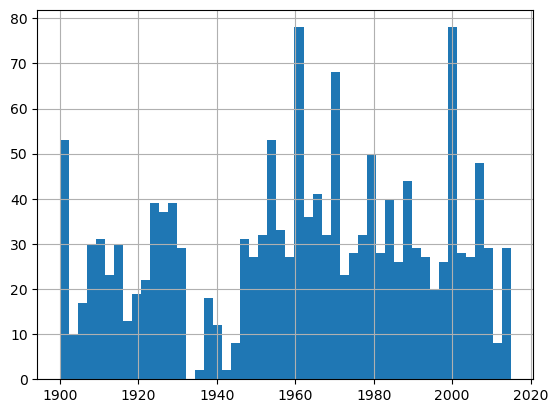

In [5]:
# la répartition des individus par année de construction sera plus visible avec un histo. :
import matplotlib.pyplot as plt
plt.hist(DF['YearBuilt'], bins=50)
plt.grid()

Mon but est de diviser cette donnée en **quelques paquets représentatifs des phases de developpement**. Elle est catégorielle donc doit être 'codée'. Je vais prendre les bornes suivantes : 1900-1903-1917-1933-1943-1958-1973-1986-1996-2004-2015, soit les 10 intervales : 1900-1903, 1904-1917, 1918-1933, 1934-1942, 1943-1958, 1959-1972, 1973-1986, 1987-1996, 1997-2004, 2005-2015. Je vais nommer les colonnes associées per1, per2, ...

In [6]:
DF.index

RangeIndex(start=0, stop=1512, step=1)

In [7]:
for id in DF.index :
    DF.loc[id,'per1'] = (DF.loc[id,'YearBuilt'] < 1904)


C:\Users\jlper\AppData\Local\Temp\ipykernel_808\2929297666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc[id,'per1'] = (DF.loc[id,'YearBuilt'] < 1904)


In [8]:
DF.head(5)

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
0              9       1999                   60090   
1             11       1926                  102761   
2             21       2004                  355000   
3             22       1930                  103911   
4             24       1907                   57452   

                  LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1  
0                         Police Station             12581712.0  False  
1  Other - Entertainment/Public Assembly              7067881.5  False  
2                                Library             18706912.0  False  
3         Fitness Center/Health Club/Gym             10192124.0  False  
4                    Social/Meeting Hall              7877219.0  False

In [13]:
DF['per2'] = False
for id in DF.index :
    DF.iloc[id,6] = (DF.iloc[id, 1] > 1903) & (DF.iloc[id, 1] < 1918)


C:\Users\jlper\AppData\Local\Temp\ipykernel_808\1728818553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['per2'] = False


In [15]:
DF['per2'].value_counts()

False    1365
True      147
Name: per2, dtype: int64

In [16]:
DF.loc['per3'] = False

C:\Users\jlper\AppData\Local\Temp\ipykernel_808\145827074.py:1: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  DF.loc['per3'] = False
C:\Users\jlper\AppData\Local\Temp\ipykernel_808\145827074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF.loc['per3'] = False


In [17]:
DF.head(5)

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
0              9       1999                   60090   
1             11       1926                  102761   
2             21       2004                  355000   
3             22       1930                  103911   
4             24       1907                   57452   

                  LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1   per2  \
0                         Police Station             12581712.0  False  False   
1  Other - Entertainment/Public Assembly              7067881.5  False  False   
2                                Library             18706912.0  False  False   
3         Fitness Center/Health Club/Gym             10192124.0  False  False   
4                    Social/Meeting Hall              7877219.0  False   True   

       6  
0  False  
1  False  
2  False  
3  False  
4   True

In [20]:
DF = DF.drop(6, axis = 1)

In [22]:
DF.head(5)

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
0              9       1999                   60090   
1             11       1926                  102761   
2             21       2004                  355000   
3             22       1930                  103911   
4             24       1907                   57452   

                  LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1   per2  
0                         Police Station             12581712.0  False  False  
1  Other - Entertainment/Public Assembly              7067881.5  False  False  
2                                Library             18706912.0  False  False  
3         Fitness Center/Health Club/Gym             10192124.0  False  False  
4                    Social/Meeting Hall              7877219.0  False   True

In [26]:
DF['per3'] = DF['per2']

In [27]:
DF.head(5)

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
0            9.0     1999.0                 60090.0   
1           11.0     1926.0                102761.0   
2           21.0     2004.0                355000.0   
3           22.0     1930.0                103911.0   
4           24.0     1907.0                 57452.0   

                  LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1   per2  \
0                         Police Station             12581712.0  False  False   
1  Other - Entertainment/Public Assembly              7067881.5  False  False   
2                                Library             18706912.0  False  False   
3         Fitness Center/Health Club/Gym             10192124.0  False  False   
4                    Social/Meeting Hall              7877219.0  False   True   

    per3  
0  False  
1  False  
2  False  
3  False  
4   True

In [ ]:
for id in DF.index :
    DF.iloc[id,7] = (DF.iloc[id, 1] > 1917) & (DF.iloc[id, 1] < 1934)


In [88]:
# ci-dessus : a fonctionné malgré un message d'érreur du à un problème Jupyter
DF.to_csv('DFmodel1.csv')

In [7]:
DF['per4'] = DF['per3']

In [8]:
for id in DF.index :
    DF.iloc[id,8] = (DF.iloc[id, 1] > 1933) & (DF.iloc[id, 1] < 1943) 


In [15]:
# maintenant que j'ai une formulation qui n'engendre pas d'erreur, je vais utiliser une autre methode plus générale :
def categorise5(row) :
    if row['YearBuilt'] > 1942 and row['YearBuilt'] < 1959 :
        return True
    else :
        return False

DF['per5'] = DF.apply(lambda row: categorise5(row), axis=1)

In [16]:
DF.iloc[40:60,:]

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
40          113.0     1986.0                 63888.0   
41          114.0     2010.0                616891.0   
42          115.0     1970.0                 50283.0   
43          118.0     1999.0                 74468.0   
44          119.0     1923.0                 67743.0   
45          120.0     1908.0                194104.0   
46          121.0     2003.0                 63681.0   
47          122.0     1991.0                 58933.0   
48          125.0     1957.0                130862.0   
49          127.0     1989.0                 59955.0   
50          130.0     1964.0                 93218.0   
51          131.0     1941.0                 56521.0   
52          132.0     1929.0                206934.0   
53          137.0     1963.0                131013.0   
54          138.0     1959.0                245587.0   
55          140.0     1991.0                 66588.0   
56          145.0     1998.0                284100.0   
57          148.0     1991.0                 55513.0   
58          163.0     2006.0                 61156.0   
59          167.0     1910.0                 59000.0   

                   LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1  \
40                                 Office           4.192108e+06  False   
41                                 Office           3.810511e+07  False   
42                                 Office           3.647346e+06  False   
43                            K-12 School           0.000000e+00  False   
44                            K-12 School           3.036464e+06  False   
45                            K-12 School           7.204080e+06  False   
46                                 Office           4.980738e+06  False   
47                            K-12 School           0.000000e+00  False   
48                            K-12 School           7.300978e+06  False   
49                            K-12 School           1.749171e+06  False   
50                            K-12 School           3.216155e+06  False   
51                                  Other           6.367210e+06  False   
52                                  Other           4.384626e+06  False   
53                            K-12 School           4.290832e+06  False   
54                            K-12 School           1.287092e+07  False   
55                            K-12 School           0.000000e+00  False   
56  Other - Entertainment/Public Assembly           1.488195e+07  False   
57                            K-12 School           1.598853e+06  False   
58                                  Other           9.550716e+06  False   
59                                 Museum           2.095175e+06  False   

     per2   per3   per4   per5  
40  False  False  False  False  
41  False  False  False  False  
42  False  False  False  False  
43  False  False  False  False  
44  False   True  False  False  
45   True  False  False  False  
46  False  False  False  False  
47  False  False  False  False  
48  False  False  False   True  
49  False  False  False  False  
50  False  False  False  False  
51  False  False   True  False  
52  False   True  False  False  
53  False  False  False  False  
54  False  False  False  False  
55  False  False  False  False  
56  False  False  False  False  
57  False  False  False  False  
58  False  False  False  False  
59   True  False  False  False

In [17]:
def categorise6(row) :
    if row['YearBuilt'] > 1959 and row['YearBuilt'] < 1973 :
        return True
    else :
        return False

DF['per6'] = DF.apply(lambda row: categorise6(row), axis=1)

In [20]:
# encore une autre méthode  (qu'on peut utiliser aussi avec plusieurs conditions sous forme de liste) :
import numpy as np
condition = [np.logical_and(DF['YearBuilt'].gt(1972), DF['YearBuilt'].lt(1987))]
DF['per7'] = pd.Series(np.select(condition, [True], False))
# ici situation binaire; Plus généralement np.select(conditions, outputs, default) avec outputs =
# une liste correspondante à celle des conditions

In [21]:
DF.iloc[40:60,:]

OSEBuildingID  YearBuilt  PropertyGFABuilding(s)  \
40          113.0     1986.0                 63888.0   
41          114.0     2010.0                616891.0   
42          115.0     1970.0                 50283.0   
43          118.0     1999.0                 74468.0   
44          119.0     1923.0                 67743.0   
45          120.0     1908.0                194104.0   
46          121.0     2003.0                 63681.0   
47          122.0     1991.0                 58933.0   
48          125.0     1957.0                130862.0   
49          127.0     1989.0                 59955.0   
50          130.0     1964.0                 93218.0   
51          131.0     1941.0                 56521.0   
52          132.0     1929.0                206934.0   
53          137.0     1963.0                131013.0   
54          138.0     1959.0                245587.0   
55          140.0     1991.0                 66588.0   
56          145.0     1998.0                284100.0   
57          148.0     1991.0                 55513.0   
58          163.0     2006.0                 61156.0   
59          167.0     1910.0                 59000.0   

                   LargestPropertyUseType  SiteEnergyUseWN(kBtu)   per1  \
40                                 Office           4.192108e+06  False   
41                                 Office           3.810511e+07  False   
42                                 Office           3.647346e+06  False   
43                            K-12 School           0.000000e+00  False   
44                            K-12 School           3.036464e+06  False   
45                            K-12 School           7.204080e+06  False   
46                                 Office           4.980738e+06  False   
47                            K-12 School           0.000000e+00  False   
48                            K-12 School           7.300978e+06  False   
49                            K-12 School           1.749171e+06  False   
50                            K-12 School           3.216155e+06  False   
51                                  Other           6.367210e+06  False   
52                                  Other           4.384626e+06  False   
53                            K-12 School           4.290832e+06  False   
54                            K-12 School           1.287092e+07  False   
55                            K-12 School           0.000000e+00  False   
56  Other - Entertainment/Public Assembly           1.488195e+07  False   
57                            K-12 School           1.598853e+06  False   
58                                  Other           9.550716e+06  False   
59                                 Museum           2.095175e+06  False   

     per2   per3   per4   per5   per6   per7  
40  False  False  False  False  False   True  
41  False  False  False  False  False  False  
42  False  False  False  False   True  False  
43  False  False  False  False  False  False  
44  False   True  False  False  False  False  
45   True  False  False  False  False  False  
46  False  False  False  False  False  False  
47  False  False  False  False  False  False  
48  False  False  False   True  False  False  
49  False  False  False  False  False  False  
50  False  False  False  False   True  False  
51  False  False   True  False  False  False  
52  False   True  False  False  False  False  
53  False  False  False  False   True  False  
54  False  False  False  False  False  False  
55  False  False  False  False  False  False  
56  False  False  False  False  False  False  
57  False  False  False  False  False  False  
58  False  False  False  False  False  False  
59   True  False  False  False  False  False

In [22]:
# encore une autre méthode, celle suggérée dans le message d'érreur au début (mais pas bien expliquée) :
DF.loc[np.logical_and(DF['YearBuilt'].gt(1986), DF['YearBuilt'].lt(1997)), 'per8'] = True
DF['per8'].fillna(False, inplace=True)

In [23]:
DF.iloc[40:60,5:]

per1   per2   per3   per4   per5   per6   per7   per8
40  False  False  False  False  False  False   True  False
41  False  False  False  False  False  False  False  False
42  False  False  False  False  False   True  False  False
43  False  False  False  False  False  False  False  False
44  False  False   True  False  False  False  False  False
45  False   True  False  False  False  False  False  False
46  False  False  False  False  False  False  False  False
47  False  False  False  False  False  False  False   True
48  False  False  False  False   True  False  False  False
49  False  False  False  False  False  False  False   True
50  False  False  False  False  False   True  False  False
51  False  False  False   True  False  False  False  False
52  False  False   True  False  False  False  False  False
53  False  False  False  False  False   True  False  False
54  False  False  False  False  False  False  False  False
55  False  False  False  False  False  False  False   True
56  False  False  False  False  False  False  False  False
57  False  False  False  False  False  False  False   True
58  False  False  False  False  False  False  False  False
59  False   True  False  False  False  False  False  False

In [24]:
DF.loc[np.logical_and(DF['YearBuilt'].gt(1996), DF['YearBuilt'].lt(2005)), 'per9'] = True
DF['per9'].fillna(False, inplace=True)

In [25]:
DF.loc[DF['YearBuilt'].gt(2004), 'per10'] = True
DF['per10'].fillna(False, inplace=True)

In [26]:
DF.iloc[40:60,5:]

per1   per2   per3   per4   per5   per6   per7   per8   per9  per10
40  False  False  False  False  False  False   True  False  False  False
41  False  False  False  False  False  False  False  False  False   True
42  False  False  False  False  False   True  False  False  False  False
43  False  False  False  False  False  False  False  False   True  False
44  False  False   True  False  False  False  False  False  False  False
45  False   True  False  False  False  False  False  False  False  False
46  False  False  False  False  False  False  False  False   True  False
47  False  False  False  False  False  False  False   True  False  False
48  False  False  False  False   True  False  False  False  False  False
49  False  False  False  False  False  False  False   True  False  False
50  False  False  False  False  False   True  False  False  False  False
51  False  False  False   True  False  False  False  False  False  False
52  False  False   True  False  False  False  False  False  False  False
53  False  False  False  False  False   True  False  False  False  False
54  False  False  False  False  False  False  False  False  False  False
55  False  False  False  False  False  False  False   True  False  False
56  False  False  False  False  False  False  False  False   True  False
57  False  False  False  False  False  False  False   True  False  False
58  False  False  False  False  False  False  False  False  False   True
59  False   True  False  False  False  False  False  False  False  False

In [33]:
# on transforme toutes ces colonnes en numérique, et on supprime 'YearBuilt' et en fait 'per10' aussi, en excès car déductible
DF = DF.drop('per10', axis = 1)
DF = DF.drop('YearBuilt', axis = 1)
DF['per1'] = DF['per1'].astype('int')
DF['per2'] = DF['per2'].astype('int')
DF['per3'] = DF['per3'].astype('int')
DF['per4'] = DF['per4'].astype('int')
DF['per5'] = DF['per5'].astype('int')
DF['per6'] = DF['per6'].astype('int')
DF['per7'] = DF['per7'].astype('int')
DF['per8'] = DF['per8'].astype('int')
DF['per9'] = DF['per9'].astype('int')

In [34]:
DF.tail(10)

OSEBuildingID  PropertyGFABuilding(s) LargestPropertyUseType  \
1502        50210.0                 13661.0                 Office   
1503        50212.0                 23445.0     Other - Recreation   
1504        50219.0                 20050.0     Other - Recreation   
1505        50220.0                 15398.0                 Office   
1506        50221.0                 18261.0     Other - Recreation   
1507        50222.0                 12294.0                 Office   
1508        50223.0                 16000.0     Other - Recreation   
1509        50224.0                 13157.0     Other - Recreation   
1510        50225.0                 14101.0     Other - Recreation   
1511        50226.0                 18258.0     Other - Recreation   

      SiteEnergyUseWN(kBtu)  per1  per2  per3  per4  per5  per6  per7  per8  \
1502           5.585251e+05     0     0     0     0     1     0     0     0   
1503           6.716330e+06     0     1     0     0     0     0     0     0   
1504           1.993137e+06     0     0     0     0     0     0     0     1   
1505           4.141724e+05     0     0     0     0     0     1     0     0   
1506           1.025432e+06     0     0     0     0     0     0     1     0   
1507           9.430032e+05     0     0     0     0     0     0     0     1   
1508           1.053706e+06     0     0     0     0     0     0     0     0   
1509           6.053764e+06     0     0     0     0     0     0     1     0   
1510           7.828413e+05     0     0     0     0     0     0     0     1   
1511           1.293722e+06     0     0     0     1     0     0     0     0   

      per9  
1502     0  
1503     0  
1504     0  
1505     0  
1506     0  
1507     0  
1508     1  
1509     0  
1510     0  
1511     0

In [35]:
DF.to_csv('DFmodel1.csv')

In [5]:
# travaillons maintenant au 'codage' (digitalisation) des 'Largest Property Use Type'
DF['LargestPropertyUseType'].unique()

array(['Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall', 'Medical Office',
       'Retail Store', 'Other', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Worship Facility', 'Restaurant',
       'Data Center', 'Laboratory', 'Supermarket/Grocery Store',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Industrial Plant',
       'Other - Recreation', 'Lifestyle Center',
       'Other - Public Services', 'Other - Education', 'Fire Station',
       'Performing Arts', 'Bank Branch', 'Other - Restaurant/Bar

In [8]:
len(DF['LargestPropertyUseType'].unique())

48

Je vais regrouper les types d'usages similaires, grosso-modo du point de vu de la consomation en énergie, pour avoir moins de catégories:
<br>1-'Police Station', 'Fire Station'
<br>2-'Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', 'Other - Services', 'Other - Utility',
<br>3-'Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other'
<br>4-'Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', 'Other - Recreation', 'Movie Theater', 'Performing Arts'
<br>5-'K-12 School', 'College/University', 'Other - Education', 'Adult Education' 
<br>6-'Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center'
<br>7-'Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch', 'Other - Lodging/Residential'
<br>8-'Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', 'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
<br>9-'Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory'
<br>10-'Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse'
<br>11-'Parking'
<br>Je vais nommer les colonnes associées use1, use2, ...

In [10]:
DF.loc[(DF['LargestPropertyUseType'].str[0,14] == 'Police Station') | \
       (DF['LargestPropertyUseType'].str[0,12] =='Fire Station'), 'use1'] = True
DF['use1'].fillna(False, inplace=True)

In [12]:
DF.iloc[40:50,10:]

per7  per8  per9   use1
40     1     0     0  False
41     0     0     0  False
42     0     0     0  False
43     0     0     1  False
44     0     0     0  False
45     0     0     0  False
46     0     0     1  False
47     0     1     0  False
48     0     0     0  False
49     0     1     0  False

In [13]:
DF.loc[DF['use1'],'per9'].count()

0

In [14]:
# il y a un petit problème, vérifions ('per9' pour faire court, c'est le count() que je veux)
DF.loc[DF['LargestPropertyUseType'].str[0,14] == 'Police Station', 'per9'].count()

0

In [19]:
DF.iloc[0,2]

'Police Station'

In [20]:
DF.head(1)

OSEBuildingID  PropertyGFABuilding(s) LargestPropertyUseType  \
0            9.0                 60090.0         Police Station   

   SiteEnergyUseWN(kBtu)  per1  per2  per3  per4  per5  per6  per7  per8  \
0             12581712.0     0     0     0     0     0     0     0     0   

   per9   use1  
0     1  False

In [21]:
# problème : comment identifier cette donnée dans un .loc ??
DF.iloc[0,2] == 'Police Station'

True

In [22]:
DF.loc[0]['LargestPropertyUseType'] == 'Police Station'

True

In [23]:
DF.loc[DF['LargestPropertyUseType'] == 'Police Station', 'OSEBuildingID']

0    9.0
Name: OSEBuildingID, dtype: float64

In [24]:
# j'avais eu des difficultés avec cette syntaxe simple, mais là elle fonctionne correctement (?)
DF.loc[DF['LargestPropertyUseType'] == 'Fire Station', 'OSEBuildingID']

622    19917.0
Name: OSEBuildingID, dtype: float64

In [27]:
DF.iloc[0,13] = True
DF.iloc[622,13] = True

In [28]:
DF.head(1)

OSEBuildingID  PropertyGFABuilding(s) LargestPropertyUseType  \
0            9.0                 60090.0         Police Station   

   SiteEnergyUseWN(kBtu)  per1  per2  per3  per4  per5  per6  per7  per8  \
0             12581712.0     0     0     0     0     0     0     0     0   

   per9  use1  
0     1  True

In [3]:
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', 'Other - Services', \
           'Other - Utility']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use2'] = True
DF['use2'].fillna(False, inplace=True)

In [4]:
DF['use2'].fillna(False, inplace=True)

In [5]:
DF.iloc[40:50,10:]

per7  per8  per9   use1   use2
40     1     0     0  False  False
41     0     0     0  False  False
42     0     0     0  False  False
43     0     0     1  False  False
44     0     0     0  False  False
45     0     0     0  False  False
46     0     0     1  False  False
47     0     1     0  False  False
48     0     0     0  False  False
49     0     1     0  False  False

In [6]:
DF.loc[DF['LargestPropertyUseType'] == 'Library', 'OSEBuildingID'].count()

4

In [7]:
DF.loc[DF['LargestPropertyUseType'] == 'Library', :]

OSEBuildingID  PropertyGFABuilding(s) LargestPropertyUseType  \
2              21.0                355000.0                Library   
902         22312.0                 15000.0                Library   
1384        27721.0                 12806.0                Library   
1422        33408.0                 24697.0                Library   

      SiteEnergyUseWN(kBtu)  per1  per2  per3  per4  per5  per6  per7  per8  \
2              1.870691e+07     0     0     0     0     0     0     0     0   
902            1.642174e+06     0     0     0     0     0     0     0     0   
1384           1.155795e+06     0     0     0     0     0     0     0     0   
1422           1.395016e+06     0     0     0     0     0     1     0     0   

      per9   use1  use2  
2        1  False  True  
902      1  False  True  
1384     1  False  True  
1422     0  False  True

In [8]:
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use3'] = True
DF['use3'].fillna(False, inplace=True)

In [9]:
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use4'] = True
DF['use4'].fillna(False, inplace=True)

In [10]:
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use5'] = True
DF['use5'].fillna(False, inplace=True)

In [11]:
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use6'] = True
DF['use6'].fillna(False, inplace=True)

In [12]:
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch', 'Other - Lodging/Residential']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use7'] = True
DF['use7'].fillna(False, inplace=True)

In [13]:
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', 'Personal Services (Health/Beauty, Dry Cleaning, etc)']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use8'] = True
DF['use8'].fillna(False, inplace=True)

In [14]:
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use9'] = True
DF['use9'].fillna(False, inplace=True)

In [15]:
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use10'] = True
DF['use10'].fillna(False, inplace=True)
# c'est la dernière que nous créons car 'la 11~ème' peut se déduire des 10 autres.

In [16]:
DF.iloc[40:60,12:]

per9   use1   use2   use3   use4   use5   use6   use7   use8   use9  use10
40     0  False  False  False  False  False  False   True  False  False  False
41     0  False  False  False  False  False  False   True  False  False  False
42     0  False  False  False  False  False  False   True  False  False  False
43     1  False  False  False  False   True  False  False  False  False  False
44     0  False  False  False  False   True  False  False  False  False  False
45     0  False  False  False  False   True  False  False  False  False  False
46     1  False  False  False  False  False  False   True  False  False  False
47     0  False  False  False  False   True  False  False  False  False  False
48     0  False  False  False  False   True  False  False  False  False  False
49     0  False  False  False  False   True  False  False  False  False  False
50     0  False  False  False  False   True  False  False  False  False  False
51     0  False  False   True  False  False  False  False  False  False  False
52     0  False  False   True  False  False  False  False  False  False  False
53     0  False  False  False  False   True  False  False  False  False  False
54     0  False  False  False  False   True  False  False  False  False  False
55     0  False  False  False  False   True  False  False  False  False  False
56     1  False  False  False   True  False  False  False  False  False  False
57     0  False  False  False  False   True  False  False  False  False  False
58     0  False  False   True  False  False  False  False  False  False  False
59     0  False  False  False   True  False  False  False  False  False  False

In [17]:
DF = DF.drop('LargestPropertyUseType', axis = 1)
for i in range(10):
    DF['use{}'.format(i+1)] = DF['use{}'.format(i+1)].astype('int')


In [18]:
DF.iloc[40:60,:]

OSEBuildingID  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  per1  per2  \
40          113.0                 63888.0           4.192108e+06     0     0   
41          114.0                616891.0           3.810511e+07     0     0   
42          115.0                 50283.0           3.647346e+06     0     0   
43          118.0                 74468.0           0.000000e+00     0     0   
44          119.0                 67743.0           3.036464e+06     0     0   
45          120.0                194104.0           7.204080e+06     0     1   
46          121.0                 63681.0           4.980738e+06     0     0   
47          122.0                 58933.0           0.000000e+00     0     0   
48          125.0                130862.0           7.300978e+06     0     0   
49          127.0                 59955.0           1.749171e+06     0     0   
50          130.0                 93218.0           3.216155e+06     0     0   
51          131.0                 56521.0           6.367210e+06     0     0   
52          132.0                206934.0           4.384626e+06     0     0   
53          137.0                131013.0           4.290832e+06     0     0   
54          138.0                245587.0           1.287092e+07     0     0   
55          140.0                 66588.0           0.000000e+00     0     0   
56          145.0                284100.0           1.488195e+07     0     0   
57          148.0                 55513.0           1.598853e+06     0     0   
58          163.0                 61156.0           9.550716e+06     0     0   
59          167.0                 59000.0           2.095175e+06     0     1   

    per3  per4  per5  per6  per7  ...  use1  use2  use3  use4  use5  use6  \
40     0     0     0     0     1  ...     0     0     0     0     0     0   
41     0     0     0     0     0  ...     0     0     0     0     0     0   
42     0     0     0     1     0  ...     0     0     0     0     0     0   
43     0     0     0     0     0  ...     0     0     0     0     1     0   
44     1     0     0     0     0  ...     0     0     0     0     1     0   
45     0     0     0     0     0  ...     0     0     0     0     1     0   
46     0     0     0     0     0  ...     0     0     0     0     0     0   
47     0     0     0     0     0  ...     0     0     0     0     1     0   
48     0     0     1     0     0  ...     0     0     0     0     1     0   
49     0     0     0     0     0  ...     0     0     0     0     1     0   
50     0     0     0     1     0  ...     0     0     0     0     1     0   
51     0     1     0     0     0  ...     0     0     1     0     0     0   
52     1     0     0     0     0  ...     0     0     1     0     0     0   
53     0     0     0     1     0  ...     0     0     0     0     1     0   
54     0     0     0     0     0  ...     0     0     0     0     1     0   
55     0     0     0     0     0  ...     0     0     0     0     1     0   
56     0     0     0     0     0  ...     0     0     0     1     0     0   
57     0     0     0     0     0  ...     0     0     0     0     1     0   
58     0     0     0     0     0  ...     0     0     1     0     0     0   
59     0     0     0     0     0  ...     0     0     0     1     0     0   

    use7  use8  use9  use10  
40     1     0     0      0  
41     1     0     0      0  
42     1     0     0      0  
43     0     0     0      0  
44     0     0     0      0  
45     0     0     0      0  
46     1     0     0      0  
47     0     0     0      0  
48     0     0     0      0  
49     0     0     0      0  
50     0     0     0      0  
51     0     0     0      0  
52     0     0     0      0  
53     0     0     0      0  
54     0     0     0      0  
55     0     0     0      0  
56     0     0     0      0  
57     0     0     0      0  
58     0     0     0      0  
59     0     0     0      0  

[20 rows x 22 columns]

Nous allons pouvoir maintenant séparer les données en un jeu d'entrainement et un jeu de test final. L'idéal serait de prendre des tranches continues dans l'ordre de l'index, mais il faut quand même s'assurer que les différentes catégories sont bien réparties parmis les index afin que les jeux se ressemblent. Pour cela nous allons utiliser la 'dataviz' :

Text(0.5, 0, 'Répartition des individus construits durant la période 1')

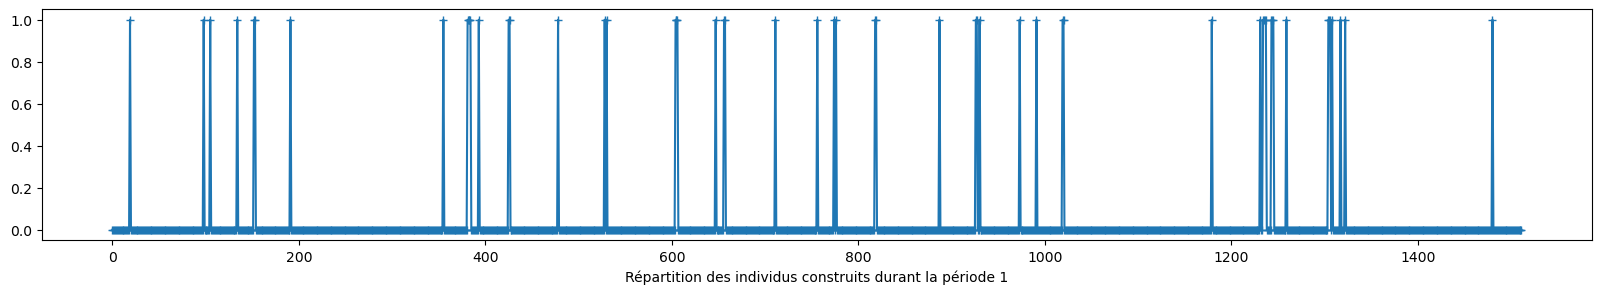

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,3] for i in range(1512)], marker='+')
plt.xlabel("Répartition des individus construits durant la période 1")

Text(0.5, 0, 'Répartition des individus construits durant la période 2')

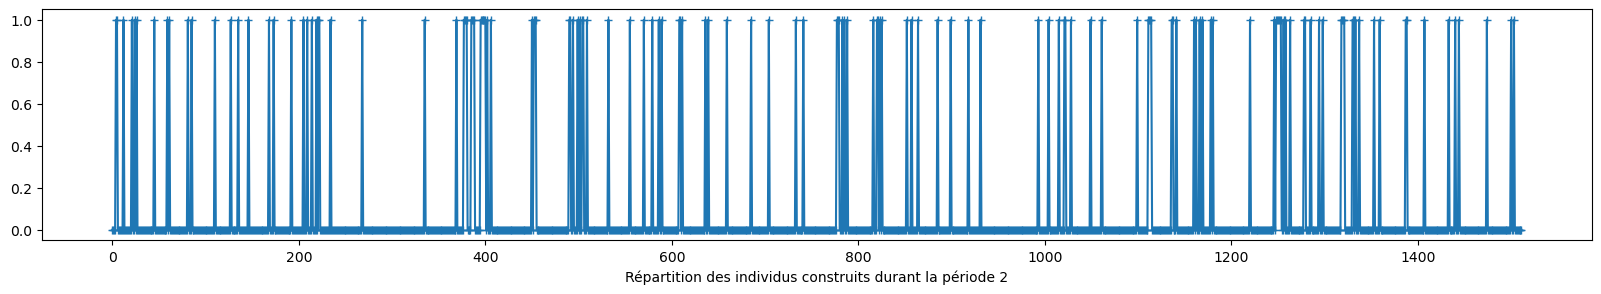

In [38]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,4] for i in range(1512)], marker='+')
plt.xlabel("Répartition des individus construits durant la période 2")

Text(0.5, 0, 'Répartition des individus construits durant la période 3')

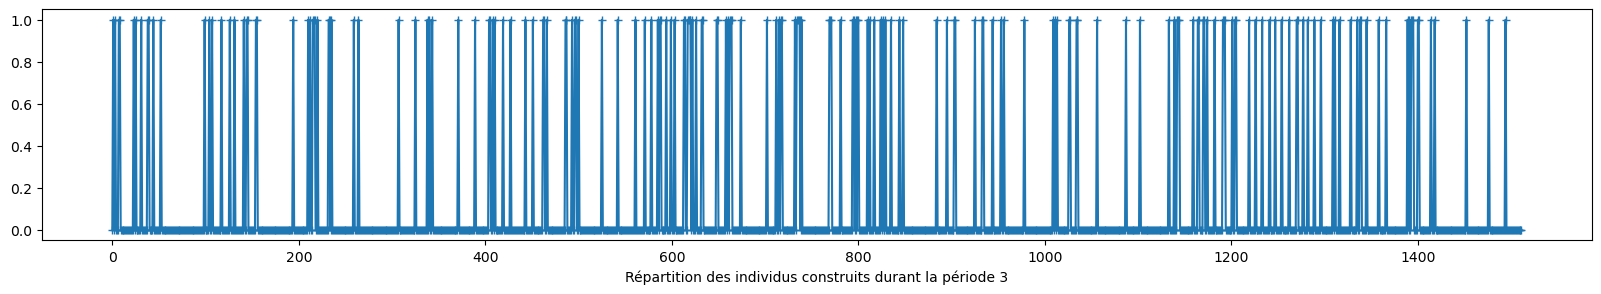

In [39]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,5] for i in range(1512)], marker='+')
plt.xlabel("Répartition des individus construits durant la période 3")

Text(0.5, 0, 'Répartition des individus construits durant la période 8')

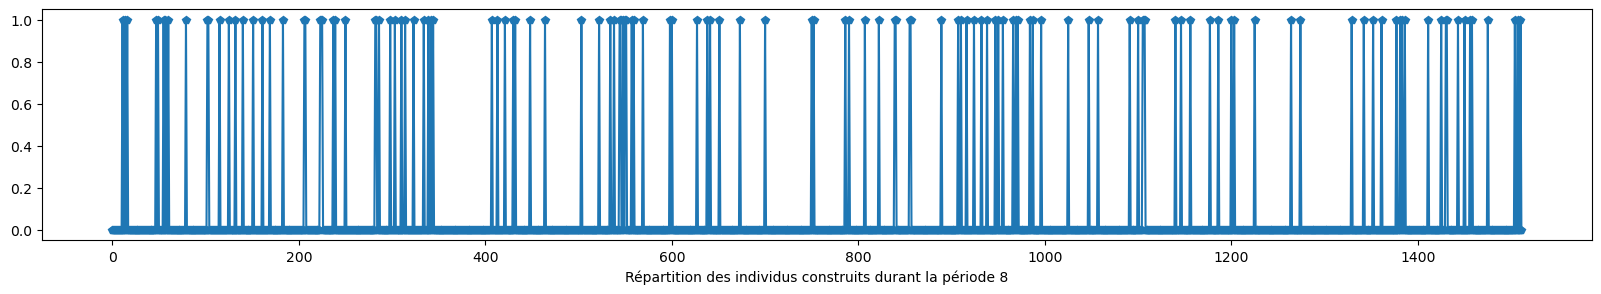

In [41]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,10] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus construits durant la période 8")

La date de construction est donc plutôt bien répartie parmis les index (j'ai vérifié aussi les périodes non présentées ci-dessus). Réalisons la même visu pour les types d'usages :

Text(0.5, 0, "Répartition des individus concernant le type d'usage 2")

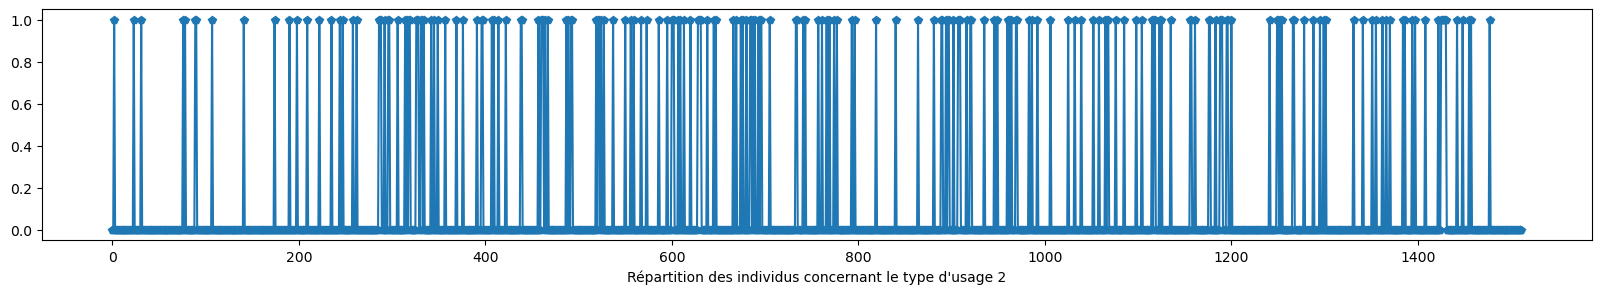

In [42]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,13] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 2")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 3")

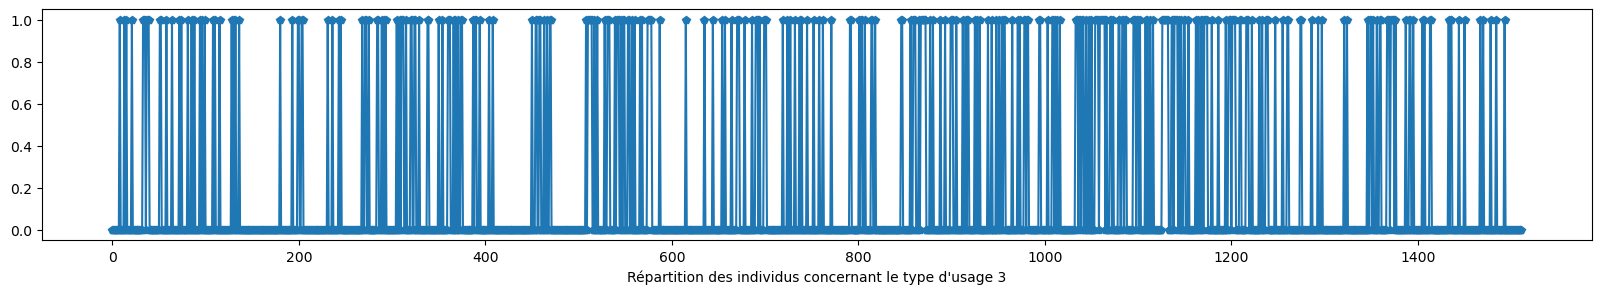

In [43]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,14] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 3")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 4")

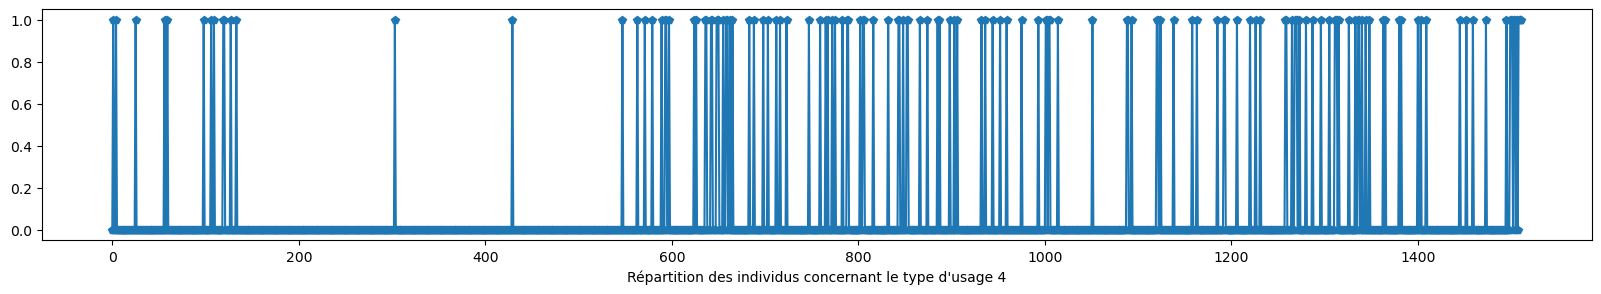

In [44]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,15] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 4")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 5")

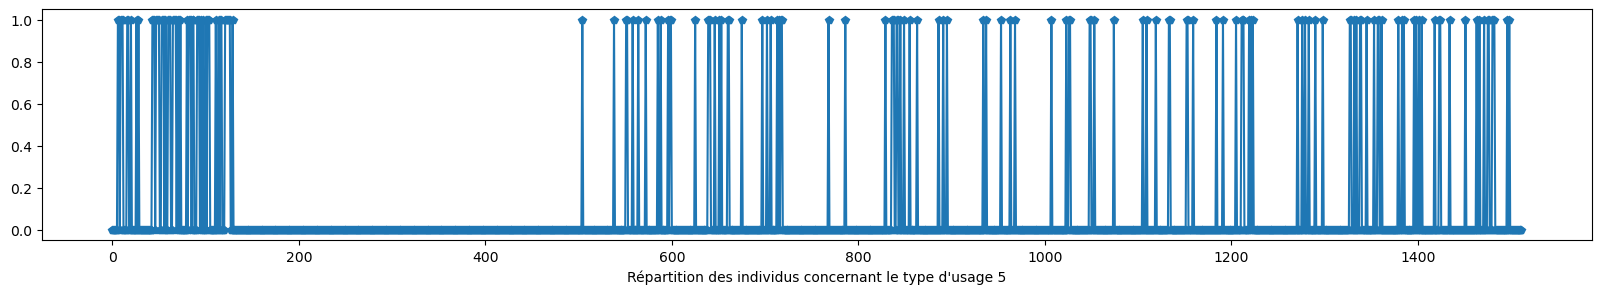

In [45]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,16] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 5")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 6")

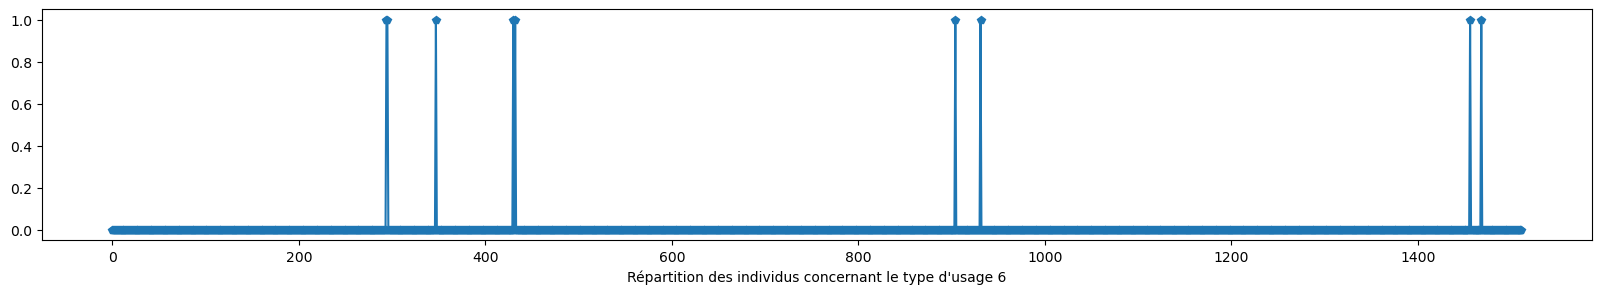

In [46]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,17] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 6")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 7")

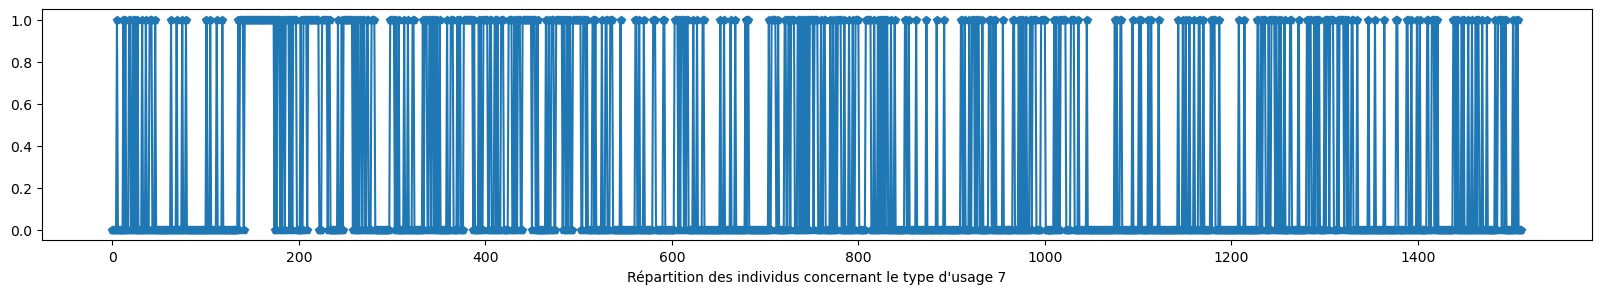

In [47]:
# il y a peu d'établissement dans le type 6, donc pas la peine de chercher à les répartir mieux.
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,18] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 7")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 8")

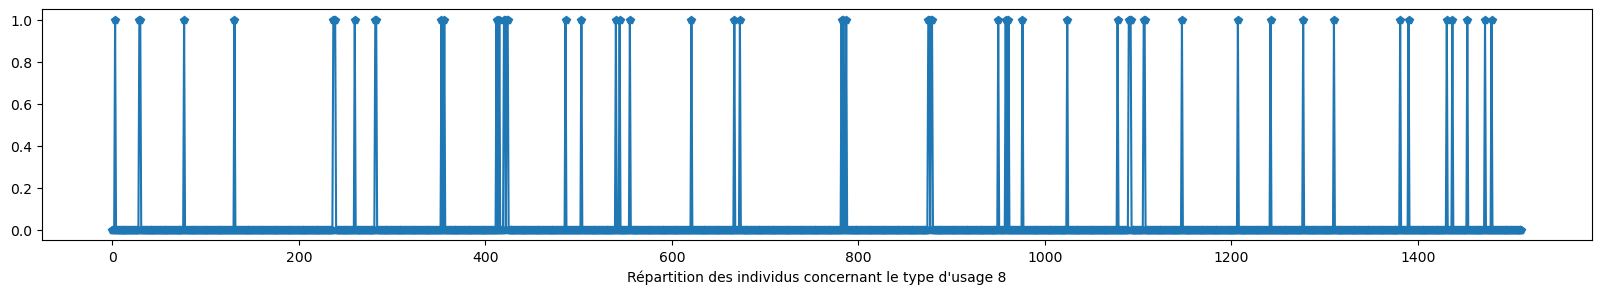

In [48]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,19] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 8")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 9")

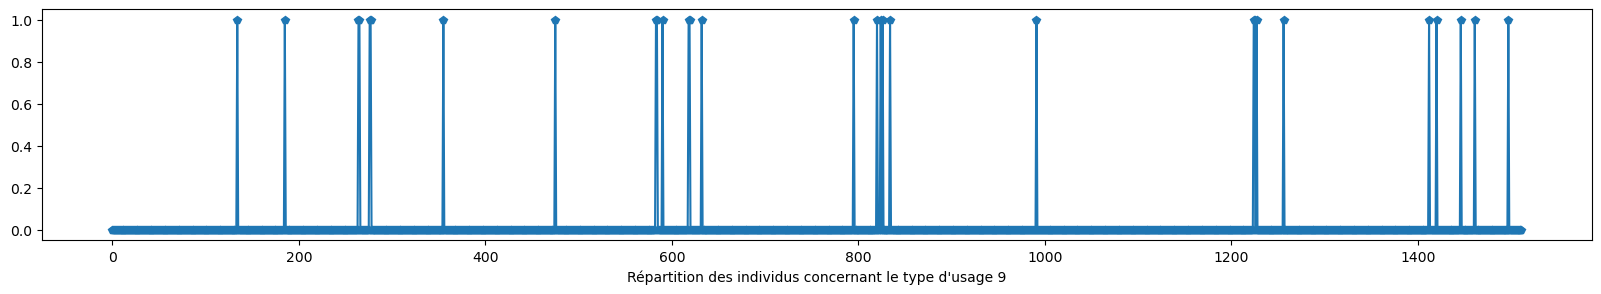

In [49]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,20] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 9")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 10")

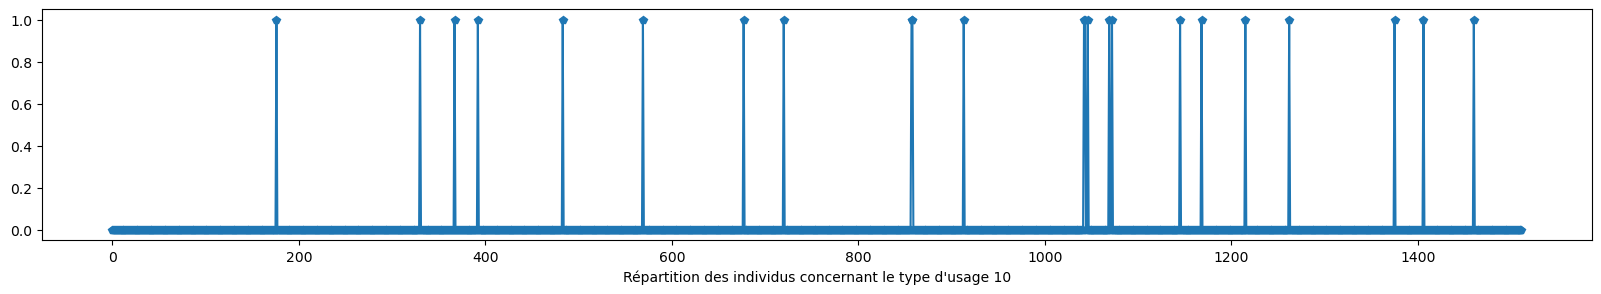

In [50]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DF.iloc[i,21] for i in range(1512)], marker='p')
plt.xlabel("Répartition des individus concernant le type d'usage 10")

On a une répartition non uniforme pour les usages 4 et 5. On peut corriger cela en supprimant les lignes correspondantes puis en les insérant de façon uniforme. Nous n'aurons plus l'ordre des identifiants respecté, mais ce n'est pas un problème puisqu'il ne servent qu'à identifier l'individu.

In [5]:
DFuse4 = DF.loc[DF['use4'] == 1, :]
DFuse5 = DF.loc[DF['use5'] == 1, :]
DFunif = DF.loc[(DF['use4'] == 0) & (DF['use5'] == 0), :] # Dataframe 'uniforme' : seulement des données bien réparties

In [6]:
print(len(DFuse4))
print(len(DFuse5))
print(len(DFunif))

142
170
1200


In [72]:
# on va inserer déjà les lignes 'use4' :
1200 / 142

8.450704225352112

In [74]:
# on est proche de 8.5, on peut essayer de laisser une fois huit lignes non 'use4' et une fois neuf, en alternance entre deux
# lignes 'use4'
DFunif.index

Int64Index([   0,    2,    3,    5,    8,   12,   13,   14,   15,   18,
            ...
            1489, 1490, 1491, 1492, 1493, 1494, 1497, 1502, 1505, 1507],
           dtype='int64', length=1200)

In [75]:
# on crée un index temporaire pour DFunif :
DFunif['tmpInd'] = [i for i in range(1200)]

C:\Users\jlper\AppData\Local\Temp\ipykernel_9108\1747955199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFunif['tmpInd'] = [i for i in range(1200)]


In [77]:
DFunif.iloc[0:5,:]

OSEBuildingID  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  per1  per2  \
0            9.0                 60090.0           1.258171e+07     0     0   
2           21.0                355000.0           1.870691e+07     0     0   
3           22.0                103911.0           1.019212e+07     0     0   
5           26.0                540360.0           4.702309e+07     0     1   
8           31.0                 67224.0           1.310237e+06     0     0   

   per3  per4  per5  per6  per7  ...  use2  use3  use4  use5  use6  use7  \
0     0     0     0     0     0  ...     0     0     0     0     0     0   
2     0     0     0     0     0  ...     1     0     0     0     0     0   
3     1     0     0     0     0  ...     0     0     0     0     0     0   
5     0     0     0     0     0  ...     0     0     0     0     0     1   
8     1     0     0     0     0  ...     0     1     0     0     0     0   

   use8  use9  use10  tmpInd  
0     0     0      0       0  
2     0     0      0       1  
3     1     0      0       2  
5     0     0      0       3  
8     0     0      0       4  

[5 rows x 23 columns]

Malgré le message l'instruction a fonctionné. Il faudrait donc mettre les lignes 'use4' en positions (par exemple) avant 0, après 8, après 17, après 25 ... On va créer un liste de tous les 'tmpInd' situés avant une ligne à insérer (sauf pour la première), puis chercher une méthode d'insertion aux positions voulues.

In [86]:
reperInd = []
curs = 0
for i in range(141) :  # 142 - 1 lignes à insérer (la 142 sera mise à la fin)
    if (i % 2) == 0 :
        reperInd.append(curs + 8)
        curs += 8
    else :
        reperInd.append(curs + 9)
        curs += 9


In [87]:
reperInd[-1]

1198

Apparemment le plus simple est de concaténer itérativement dans un nouveau DF les lignes de chaque DF à ajouter, selon l'ordre souhaité, avec pandas en tout cas (étonnant qu'il n'existe pas, concernant les lignes, de méthode 'insert' simple !). Sinon avec les 'numpy arrays' on a une méthode 'insert' qui permettrait de réaliser les insertions de lignes en transformant temporairement DFunif en array. Essayons comme cela (pas besoin de 'tmpInd' du coup) :

In [8]:
DFunif.head()

OSEBuildingID  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  per1  per2  \
0            9.0                 60090.0           1.258171e+07     0     0   
2           21.0                355000.0           1.870691e+07     0     0   
3           22.0                103911.0           1.019212e+07     0     0   
5           26.0                540360.0           4.702309e+07     0     1   
8           31.0                 67224.0           1.310237e+06     0     0   

   per3  per4  per5  per6  per7  ...  use1  use2  use3  use4  use5  use6  \
0     0     0     0     0     0  ...     1     0     0     0     0     0   
2     0     0     0     0     0  ...     0     1     0     0     0     0   
3     1     0     0     0     0  ...     0     0     0     0     0     0   
5     0     0     0     0     0  ...     0     0     0     0     0     0   
8     1     0     0     0     0  ...     0     0     1     0     0     0   

   use7  use8  use9  use10  
0     0     0     0      0  
2     0     0     0      0  
3     0     1     0      0  
5     1     0     0      0  
8     0     0     0      0  

[5 rows x 22 columns]

In [9]:
import numpy as np
DFunifTab = DFunif.values

In [23]:
DFunifTab = np.insert(DFunifTab, 0, DFuse4.iloc[0,:], axis=0)

In [26]:
pos = 8
for compt in range(1,142) :
    DFunifTab = np.insert(DFunifTab, pos, DFuse4.iloc[compt,:], axis=0)
    pos = pos + 8 + (compt % 2)


In [27]:
len(DFunifTab)

1342

In [28]:
# on profite du numpy array pour traiter aussi les 'use5' :
1342/170

7.894117647058824

In [29]:
# On est pas loin de 8 donc on va insérer tous les 8 et pour les quelques restants on verra.
DFunifTab = np.insert(DFunifTab, 0, DFuse5.iloc[0,:], axis=0)

In [30]:
pos = 8
for compt in range(1,168) :
    DFunifTab = np.insert(DFunifTab, pos, DFuse5.iloc[compt,:], axis=0)
    pos = pos + 8


In [31]:
len(DFunifTab)

1510

In [37]:
for i in range(29) :
    print(DFunifTab[1480 + i,16])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [38]:
for i in range(20) :
    print(DFunifTab[i,16])

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0


En prenant 'pos' de 8 en 8 on a en fait séparé les 'use5' de 7 autres 'use', ce qui fait qu'on a une répartition un peu serrée vers le début du tableau. Il faut maintenant trouver à quel niveau on s'est arrété, pour voir si c'est raisonnable (et ajouter les 2 derniers use5).

In [43]:
for i in range(20) :
    print(DFunifTab[1330 + i,16])

0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


La ligne 1336 (en indice) est la dernière à être 'use5', donc la répartition n'est pas assez uniforme, il va falloir refaire les insertions. Vérifions ce qu'il en est pour les 'use4' :

In [44]:
for i in range(29) :
    print(DFunifTab[1480 + i,15])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [49]:
for i in range(20) :
    print(DFunifTab[1360 + i,15])

0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


Pour les use4, la dernière ligne est la 1366 sur 1510, ce qui est aussi une mauvaise répartition ... On recommence d'abord les use4 :

In [50]:
DFunifTab = DFunif.values

In [54]:
pos = 0
for compt in range(142) :
    DFunifTab = np.insert(DFunifTab, pos, DFuse4.iloc[compt,:], axis=0)
    pos = pos + 9 + (compt % 2)


In [55]:
len(DFunifTab)

1342

In [57]:
for i in range(20) :
    print(DFunifTab[1320 + i,15])

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0


In [58]:
# ci-dessus : c'est parfait ! Maintenant les use5 :
pos = 0
for compt in range(168) :
    DFunifTab = np.insert(DFunifTab, pos, DFuse5.iloc[compt,:], axis=0)
    pos = pos + 9


In [59]:
len(DFunifTab)

1510

In [60]:
for i in range(29) :
    print(DFunifTab[1480 + i,16])

0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


In [66]:
for i in range(9) :
    print(DFunifTab[1500 + i,16])

0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0


In [63]:
# ci-dessus : c'est parfait ! Mais il reste 2 use5 à caser, vérifions cela d'ailleurs :
DFunifTab[1503,:]

array([4.9972e+04, 2.0303e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00])

In [68]:
DFuse5.iloc[167,:]

OSEBuildingID              49972.0
PropertyGFABuilding(s)    203030.0
SiteEnergyUseWN(kBtu)          0.0
per1                           0.0
per2                           0.0
per3                           0.0
per4                           0.0
per5                           0.0
per6                           0.0
per7                           0.0
per8                           0.0
per9                           1.0
use1                           0.0
use2                           0.0
use3                           0.0
use4                           0.0
use5                           1.0
use6                           0.0
use7                           0.0
use8                           0.0
use9                           0.0
use10                          0.0
Name: 1482, dtype: float64

In [69]:
# C'est bien cohérent, reste donc DFuse5[168] et DFuse5[169] à insérer, on peut les mettre n'importe où sans remettre en cause
# l'uniformité générale de la répartition.
DFunifTab = np.insert(DFunifTab, 500, DFuse5.iloc[168,:], axis=0)
DFunifTab = np.insert(DFunifTab, 1000, DFuse5.iloc[169,:], axis=0)
len(DFunifTab)

1512

In [74]:
# maintenant il faut remettre cet np.array au format pd.dataframe :
DFuni = pd.DataFrame(DFunifTab, columns=DFunif.columns)

In [75]:
DFuni.head()

OSEBuildingID  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  per1  per2  \
0           28.0                 56228.0              1713623.5   0.0   0.0   
1           11.0                102761.0              7067881.5   0.0   0.0   
2            9.0                 60090.0             12581712.0   0.0   0.0   
3           21.0                355000.0             18706912.0   0.0   0.0   
4           22.0                103911.0             10192124.0   0.0   0.0   

   per3  per4  per5  per6  per7  ...  use1  use2  use3  use4  use5  use6  \
0   0.0   0.0   0.0   1.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   
1   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0  ...   0.0   1.0   0.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   use7  use8  use9  use10  
0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0    0.0  
2   0.0   0.0   0.0    0.0  
3   0.0   0.0   0.0    0.0  
4   0.0   1.0   0.0    0.0  

[5 rows x 22 columns]

Text(0.5, 0, "Répartition des individus concernant le type d'usage 4")

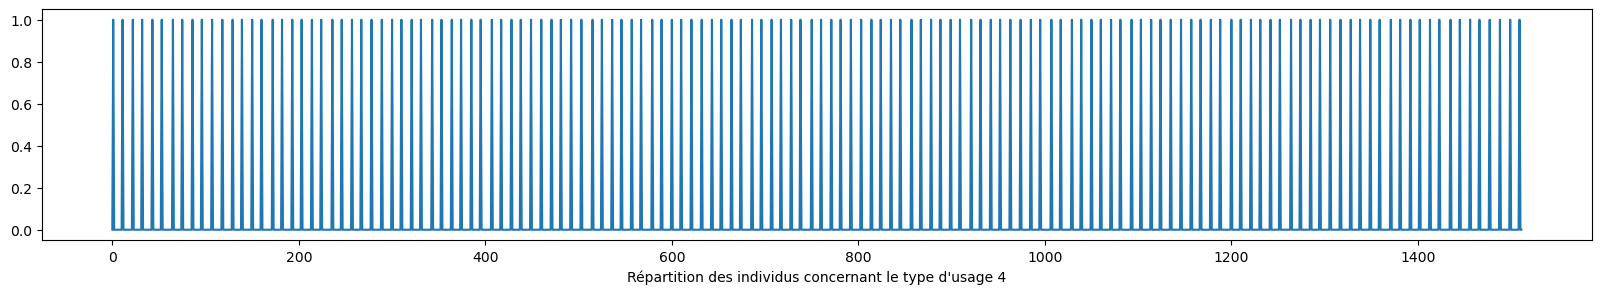

In [76]:
# admirons la belle répartition des individus 'use4' et 'use5' :
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DFuni.iloc[i,15] for i in range(1512)])
plt.xlabel("Répartition des individus concernant le type d'usage 4")

Text(0.5, 0, "Répartition des individus concernant le type d'usage 5")

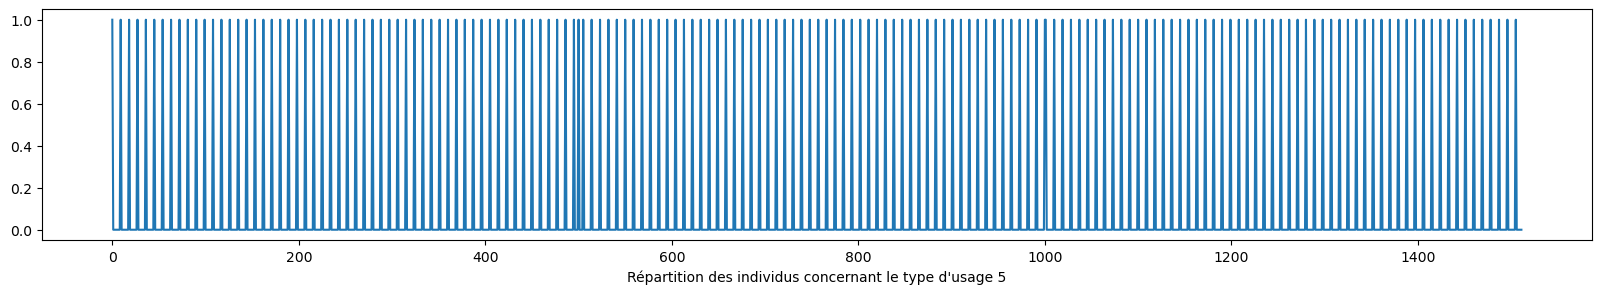

In [77]:
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [DFuni.iloc[i,16] for i in range(1512)])
plt.xlabel("Répartition des individus concernant le type d'usage 5")

In [78]:
# On peut alors séparer un jeu de test :
DFuni.index

RangeIndex(start=0, stop=1512, step=1)

In [79]:
DFlearn = DFuni.iloc[0:1300,:]
DFtest =  DFuni.iloc[1300:,:]

In [80]:
DFlearn.to_csv('DFlmodel1.csv')
DFtest.to_csv('DFtmodel1.csv')

In [2]:
import pandas as pd
DFlearn = pd.read_csv('DFlmodel1.csv')
DFtest = pd.read_csv('DFtmodel1.csv')

In [3]:
DFlearn.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'PropertyGFABuilding(s)',
       'SiteEnergyUseWN(kBtu)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10'],
      dtype='object')

In [4]:
DFlearn = DFlearn.drop('Unnamed: 0', axis=1)
DFtest = DFtest.drop('Unnamed: 0', axis=1)

Pour le 'DummyRegressor' on n'a pas besoin de mettre en place une validation croisée, on va juste extraire les données d'entrainement et les valeurs cibles de DFlearn.

In [10]:
yl = to_numpy(DFlearn['SiteEnergyUseWN(kBtu)'])
Xl = to_numpy(DFlearn[['PropertyGFABuilding(s)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10']])

NameError: name 'to_numpy' is not defined

In [11]:
# la méthode 'to_numpy' recommandée n'est pas disponible dans ma version de pandas, j'utilise donc l'ancienne méthode :
yl = DFlearn['SiteEnergyUseWN(kBtu)'].values
Xl = DFlearn[['PropertyGFABuilding(s)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10']].values

In [12]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor()
dummy_regr.fit(Xl, yl)

ValueError: Input y contains NaN.

In [13]:
# d'ou sort ce(s) NaN ?
DFlearn['SiteEnergyUseWN(kBtu)'].isna().count()

1300

In [14]:
# !!?? -> résolu : que la réponse soit True ou False, elle est comptabilisée comme réponse valide
DFlearn.head()

OSEBuildingID  PropertyGFABuilding(s)  SiteEnergyUseWN(kBtu)  per1  per2  \
0           28.0                 56228.0              1713623.5   0.0   0.0   
1           11.0                102761.0              7067881.5   0.0   0.0   
2            9.0                 60090.0             12581712.0   0.0   0.0   
3           21.0                355000.0             18706912.0   0.0   0.0   
4           22.0                103911.0             10192124.0   0.0   0.0   

   per3  per4  per5  per6  per7  ...  use1  use2  use3  use4  use5  use6  \
0   0.0   0.0   0.0   1.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0   
1   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   0.0   0.0   0.0   
3   0.0   0.0   0.0   0.0   0.0  ...   0.0   1.0   0.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0   

   use7  use8  use9  use10  
0   0.0   0.0   0.0    0.0  
1   0.0   0.0   0.0    0.0  
2   0.0   0.0   0.0    0.0  
3   0.0   0.0   0.0    0.0  
4   0.0   1.0   0.0    0.0  

[5 rows x 22 columns]

In [20]:
DFlearn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OSEBuildingID           1300 non-null   float64
 1   PropertyGFABuilding(s)  1300 non-null   float64
 2   SiteEnergyUseWN(kBtu)   1299 non-null   float64
 3   per1                    1300 non-null   float64
 4   per2                    1300 non-null   float64
 5   per3                    1300 non-null   float64
 6   per4                    1300 non-null   float64
 7   per5                    1300 non-null   float64
 8   per6                    1300 non-null   float64
 9   per7                    1300 non-null   float64
 10  per8                    1300 non-null   float64
 11  per9                    1300 non-null   float64
 12  use1                    1300 non-null   float64
 13  use2                    1300 non-null   float64
 14  use3                    1300 non-null   

In [22]:
DFlearn.loc[DFlearn['SiteEnergyUseWN(kBtu)'].isna(), 'OSEBuildingID']

527    757.0
Name: OSEBuildingID, dtype: float64

In [23]:
DFlearn.loc[527][0:4]

OSEBuildingID               757.0
PropertyGFABuilding(s)    43983.0
SiteEnergyUseWN(kBtu)         NaN
per1                          0.0
Name: 527, dtype: float64

In [24]:
# en effet dés l'origine cette donnée est nulle, je la remplace par sa valeur non 'weather normalized', comme c'est le cas pour
# beaucoup d'autres batiments :
DFlearn.iloc[527,2] = 5177270.5
DFlearn.loc[527][0:4]

OSEBuildingID                 757.0
PropertyGFABuilding(s)      43983.0
SiteEnergyUseWN(kBtu)     5177270.5
per1                            0.0
Name: 527, dtype: float64

In [25]:
yl[527]

5177270.5

In [26]:
# le problème du 'NaN' étant réglé, on peut retenter l'apprentissage du DummyRegressor :
dummy_regr.fit(Xl, yl)

DummyRegressor()

In [27]:
# pour simuler l'utilisation d'un vrai modèle, je vais faire faire les prédictions sur mon jeu de test :
yt = DFtest['SiteEnergyUseWN(kBtu)'].values
Xt = DFtest[['PropertyGFABuilding(s)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10']].values

In [28]:
dummy_regr.predict(Xt)

array([7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999, 7263287.54582999, 7263287.54582999,
       7263287.54582999,

In [29]:
dummy_regr.score(Xt, yt)

-0.04843946339635985

In [31]:
# vérification de la valeur de la moyenne :
DFtest['SiteEnergyUseWN(kBtu)'].mean()

5412107.153526792

In [32]:
# !? même pour des données inconnues le dummy reg. retourne la moyenne qu'il a 'apprise' sur le jeu d'entrainement
DFlearn['SiteEnergyUseWN(kBtu)'].mean()

7263287.545829993

In [35]:
DFlearn.to_csv('DFlmodel1.csv')

<a name='E2'>

Avant d'étoffer notre jeu de données avec plus de colonnes des données de Seattle, **nous allons expérimenter quelques modèles 'simples'** et voir lequel va donner les meilleures prédictions. Commençons avec une régression linéaire, que nous tâcherons d'améliorer avec une régularisation de Tykhonov (régression ridge) ou un lasso :

In [3]:
yl = DFlearn['SiteEnergyUseWN(kBtu)'].values
yt = DFtest['SiteEnergyUseWN(kBtu)'].values
Xl = DFlearn[['PropertyGFABuilding(s)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10']].values
Xt = DFtest[['PropertyGFABuilding(s)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10']].values

from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(Xl)
Xlearn = std_scale.transform(Xl)
Xtest = std_scale.transform(Xt)

In [5]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(Xlearn, yl)
r2lr = lr.score(Xlearn, yl)
print(r2lr)

0.3240515741826946


In [7]:
lr.predict(Xtest)  # inclus dans le .score on dirait
lr.score(Xtest, yt)

-21.827208774968152

In [8]:
# ce n'est pas terrible ... Un meilleur modèle est à trouver, voyons avec la regression ridge :
from sklearn.linear_model import RidgeCV
import numpy as np
lambdas = np.logspace(-4, 4, 80)
rid = RidgeCV(alphas=lambdas, cv=5).fit(Xlearn, yl)
r2rid_ = rid.best_score_
r2rid = rid.score(Xlearn, yl)

In [9]:
print(r2rid_)
print(r2rid)

0.3122674901025163
0.3169254844999331


In [10]:
# c'est un peu moins bien !
rid.alpha_

189.88078244652613

In [11]:
rid.coef_

array([8980818.4749777 , -312442.8877248 , -514368.96590926,
       -188875.75736773, -333230.66584004, -265439.08210573,
       -203529.15518447,  181339.74501563,  781787.69467918,
        715602.87001649,   45585.50915142, -628456.67360808,
       -828929.54863567, -347124.33229662, -955690.30228219,
        100852.63529341, -441432.03537934,  461308.35098673,
        822738.91722302, 1385714.02090062])

In [12]:
rid.cv_values_

AttributeError: 'RidgeCV' object has no attribute 'cv_values_'

In [13]:
rid.predict(Xtest)

array([1.52743385e+07, 1.88530967e+06, 7.51936541e+06, 6.06941156e+06,
       1.67716479e+06, 5.61919031e+07, 5.65161228e+06, 1.53723214e+06,
       7.51132360e+06, 2.24860759e+06, 6.27348516e+06, 8.34186963e+05,
       4.29091489e+06, 3.19415194e+06, 2.98222294e+06, 1.89843614e+06,
       1.90023676e+06, 5.47125210e+06, 7.69406047e+04, 2.09236985e+06,
       3.05917533e+06, 5.87217544e+06, 3.76650197e+06, 2.15237851e+06,
       1.78971245e+06, 5.96932283e+06, 2.27603273e+06, 5.84906445e+06,
       3.34823093e+06, 2.00156055e+06, 2.48028344e+06, 1.86265676e+06,
       3.68758180e+06, 6.05035102e+06, 1.70109773e+06, 1.72418296e+06,
       1.61874089e+06, 3.01014357e+06, 2.80931019e+06, 2.57605808e+06,
       4.26159155e+06, 6.91063915e+06, 4.67225495e+06, 4.66006581e+06,
       3.54496203e+06, 1.93883290e+06, 2.65869501e+06, 2.38750445e+06,
       2.21325604e+06, 2.66265964e+06, 1.70215870e+06, 1.70481605e+06,
       5.17745834e+06, 3.03758003e+06, 1.02936227e+06, 3.54989396e+06,
      

In [14]:
rid.score(Xtest, yt)

-16.292774711062723

In [15]:
# Voyons maintenant avec le lasso :
from sklearn.linear_model import LassoCV
las = LassoCV(eps=1e-6, fit_intercept=False, random_state=0).fit(Xlearn, yl)
r2las= las.score(Xlearn, yl)
print(r2las)

0.16922811102721524


In [16]:
# c'est bien moins bon que la simple regression linéaire !
las.alpha_

559119.1953618814

Voyons ce que donne un régesseur kNN. Jusque là nous avons utilisé des algorithmes qui intégrent des validations croisées. Nous allons cette fois faire appel à une fonction indépendante qui gère les validations croisées pour de nombreux modèles / algo.

In [4]:
from sklearn import neighbors, metrics, model_selection
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}
reg = model_selection.GridSearchCV(
     neighbors.KNeighborsRegressor(),  
     param_grid,
     cv=5,
     scoring=('r2')
     )
reg.fit(Xlearn, yl)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='r2')

In [5]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: ", end='')
print(reg.best_params_)
print("Résultats de la validation croisée :")
for key, val in reg.cv_results_.items() :
    print(key, end='')
    print(' -> ', end='')
    print(val)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 9}
Résultats de la validation croisée :
mean_fit_time -> [0.00312495 0.0031249  0.00312495 0.         0.         0.
 0.00312505]
std_fit_time -> [0.0062499  0.00624981 0.0062499  0.         0.         0.
 0.0062501 ]
mean_score_time -> [0.03437486 0.01875024 0.01875005 0.02187462 0.02187529 0.01874995
 0.01874976]
std_score_time -> [0.03750031 0.00625036 0.00625033 0.00765526 0.00765471 0.00625026
 0.00625036]
param_n_neighbors -> [3 5 7 9 11 13 15]
params -> [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}, {'n_neighbors': 11}, {'n_neighbors': 13}, {'n_neighbors': 15}]
split0_test_score -> [ 0.04451487  0.0305546   0.02210586  0.0078742   0.00275165 -0.00047848
 -0.00477796]
split1_test_score -> [0.33599792 0.36928616 0.39398825 0.36001777 0.342848   0.30132583
 0.24627002]
split2_test_score -> [0.10951926 0.03620781 0.08707231 0.10811793 0.11503781 0.110606
 0.10397944]
split3_test

C'est étonnant de voir que des scores assez bons sont obtenus sur les splits 1 et 3, et vraiment mauvais sur le 4 !? Vérifions qu'on a bien toujours la répartition homogène qu'on avait mise en place :

Text(0.5, 0, "Répartition des individus concernant le type d'usage 4")

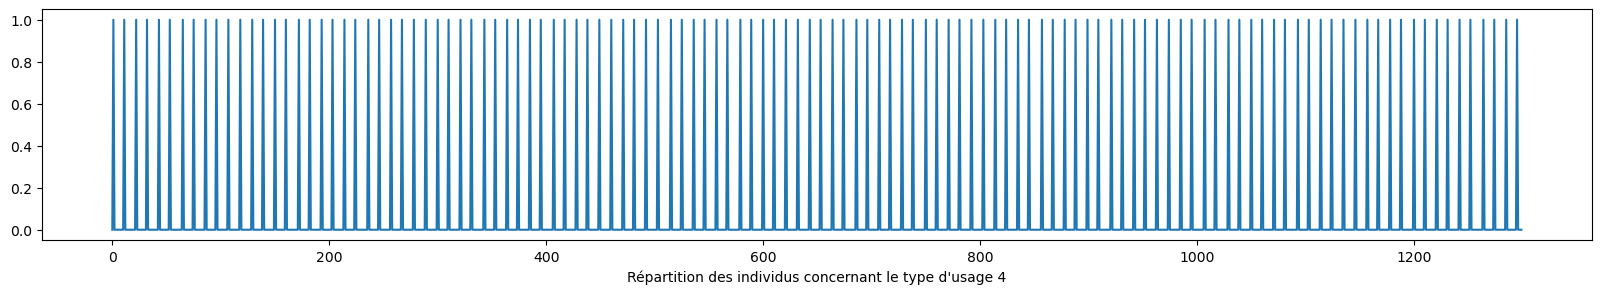

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1300)], [DFlearn.iloc[i,15] for i in range(1300)])
plt.xlabel("Répartition des individus concernant le type d'usage 4")

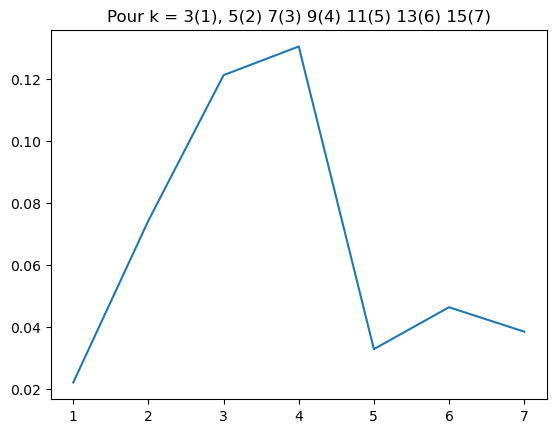

In [10]:
# la répartition a bien été sauvegardée, donc de même pour le jeu de test (et pour le type d'usage 5).
# visualisons l'évolution du score moyen du r² avec k :
plt.plot([1,2,3,4,5,6,7], [0.02202842, 0.07428991, 0.12123668, 0.13048875, 0.03279915, 0.04631343, 0.03843181])
plt.title('Pour k = 3(1), 5(2) 7(3) 9(4) 11(5) 13(6) 15(7)')
plt.show()

In [11]:
# Cela ne donnes toujours pas un meilleurs R² que la régression linéaire. Voyons la performance sur le jeu de test :
reg.predict(Xtest)
reg.score(Xtest, yt)

0.08493628472544501

Pour exploiter pertinemment les 'use types' nous allons adjoindre aux surfaces correspondantes leurs pourcentages respectifs. Comme il y a au moins 95 individus présentant une incohérence entre les 'PropertyUseTypeGFA' et la 'PropertyGFATotal' et sans doute aussi les PropertyGFAParking' et 'PropertyGFABuilding(s), nous allons considérer que la somme des 'PropertyUseTypeGFA' donne 100% de la surface, pour éviter d'avoir des incohérences. Un peu de nettoyage supplémentaire avant :

In [17]:
data.loc[data['LargestPropertyUseTypeGFA'].isna(),'OSEBuildingID']

284       496
1240    25568
1256    25711
Name: OSEBuildingID, dtype: int64

In [19]:
data.loc[284]

OSEBuildingID                                                                    496
DataYear                                                                        2016
BuildingType                                                          NonResidential
PrimaryPropertyType                                            Self-Storage Facility
PropertyName                                                        Market St Center
Address                                                        2811 NW Market Street
City                                                                         Seattle
State                                                                             WA
ZipCode                                                                      98107.0
TaxParcelIdentificationNumber                                             1175001235
CouncilDistrictCode                                                                6
Neighborhood                                                     

In [24]:
# On affecte la valeur de la surface du 'building', et 0 pour les autres 'PropertyUseTypeGFA'
data.iloc[284,22] = 111445
data.iloc[284,24] = 0
data.iloc[284,26] = 0

In [25]:
data.loc[1240]

OSEBuildingID                                            25568
DataYear                                                  2016
BuildingType                                    NonResidential
PrimaryPropertyType                Small- and Mid-Sized Office
PropertyName                               Talon Northlake LLC
Address                                   1341 N Northlake Way
City                                                   Seattle
State                                                       WA
ZipCode                                                98103.0
TaxParcelIdentificationNumber                       4088804565
CouncilDistrictCode                                          4
Neighborhood                                        LAKE UNION
Latitude                                              47.64747
Longitude                                           -122.34086
YearBuilt                                                 2008
NumberofBuildings                                      

In [26]:
# même traitement :
data.iloc[1240,22] = 48350
data.iloc[1240,24] = 0
data.iloc[1240,26] = 0

In [27]:
data.loc[1256]

OSEBuildingID                                                 25711
DataYear                                                       2016
BuildingType                                         NonResidential
PrimaryPropertyType                                      Restaurant
PropertyName                       BUSH GARDEN - RESTURANT & LOUNGE
Address                                         614 S MAYNARD AVE S
City                                                        Seattle
State                                                            WA
ZipCode                                                     98104.0
TaxParcelIdentificationNumber                            5247802410
CouncilDistrictCode                                               2
Neighborhood                                               DOWNTOWN
Latitude                                                   47.59697
Longitude                                                -122.32474
YearBuilt                                       

In [28]:
data.iloc[1256,22] = 28800
data.iloc[1256,24] = 0
data.iloc[1256,26] = 0

In [16]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

In [4]:
data.loc[data['SecondLargestPropertyUseTypeGFA'].isna(),'OSEBuildingID']

0           9
1          11
5          26
6          28
7          30
        ...  
1503    50212
1505    50220
1506    50221
1507    50222
1508    50223
Name: OSEBuildingID, Length: 731, dtype: int64

In [5]:
data['SecondLargestPropertyUseTypeGFA'].fillna(value=0)

0           0.0
1           0.0
2       49000.0
3       40000.0
4       15505.0
         ...   
1507        0.0
1508        0.0
1509     5574.0
1510     6501.0
1511     8000.0
Name: SecondLargestPropertyUseTypeGFA, Length: 1512, dtype: float64

In [6]:
data['ThirdLargestPropertyUseTypeGFA'].fillna(value=0)

0          0.0
1          0.0
2       1074.0
3          0.0
4       9741.0
         ...  
1507       0.0
1508       0.0
1509       0.0
1510     484.0
1511    1108.0
Name: ThirdLargestPropertyUseTypeGFA, Length: 1512, dtype: float64

In [4]:
# un test pour vérifier le fonctionnement attendu :
for i in range(15) :
    val = data.loc[i]['LargestPropertyUseTypeGFA'] + data.loc[i]['SecondLargestPropertyUseTypeGFA'] + \
          data.loc[i]['ThirdLargestPropertyUseTypeGFA']
    print(val)

nan
nan
414987.0
130000.0
41688.0
nan
nan
nan
nan
nan
nan
nan
63403.0
nan
1856706.0


In [5]:
# les 'fillna()' qui ont été executés n'ont pas été enregistrés
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(value=0)
data['ThirdLargestPropertyUseTypeGFA'] = data['ThirdLargestPropertyUseTypeGFA'].fillna(value=0)
# j'aurais du utiliser : .fillna(value=0, inplace=True) dés le début

In [6]:
for i in range(15) :
    val = data.loc[i]['LargestPropertyUseTypeGFA'] + data.loc[i]['SecondLargestPropertyUseTypeGFA'] + \
          data.loc[i]['ThirdLargestPropertyUseTypeGFA']
    print(val)

88830.0
102761.0
414987.0
130000.0
41688.0
537150.0
58916.0
125000.0
67224.0
126351.0
164229.0
55166.0
63403.0
26225.0
1856706.0


In [7]:
data.insert(23,'UseType1GFApercent',
           data['LargestPropertyUseTypeGFA'] * 100 / (data['LargestPropertyUseTypeGFA'] + \
                                                      data['SecondLargestPropertyUseTypeGFA'] + \
                                                      data['ThirdLargestPropertyUseTypeGFA']),
           True)

In [8]:
# petite vérif :
data.iloc[0:15,23]

0     100.000000
1     100.000000
2      87.933598
3      69.230769
4      39.440606
5     100.000000
6     100.000000
7     100.000000
8     100.000000
9     100.000000
10    100.000000
11    100.000000
12     64.575809
13    100.000000
14     40.772583
Name: UseType1GFApercent, dtype: float64

In [9]:
data.columns[20:28]

Index(['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'UseType1GFApercent',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')

In [10]:
data.insert(26,'UseType2GFApercent',
           data['SecondLargestPropertyUseTypeGFA'] * 100 / (data['LargestPropertyUseTypeGFA'] + \
                                                            data['SecondLargestPropertyUseTypeGFA'] + \
                                                            data['ThirdLargestPropertyUseTypeGFA']),
           )

In [11]:
data.iloc[0:15,26]

0      0.000000
1      0.000000
2     11.807599
3     30.769231
4     37.192957
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12    28.631137
13     0.000000
14    34.465931
Name: UseType2GFApercent, dtype: float64

In [12]:
data.columns[25:30]

Index(['SecondLargestPropertyUseTypeGFA', 'UseType2GFApercent',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified'],
      dtype='object')

In [13]:
data.insert(29,'UseType3GFApercent',
           data['ThirdLargestPropertyUseTypeGFA'] * 100 / (data['LargestPropertyUseTypeGFA'] + \
                                                           data['SecondLargestPropertyUseTypeGFA'] + \
                                                           data['ThirdLargestPropertyUseTypeGFA']),
           )

In [14]:
data.columns[25:30]

Index(['SecondLargestPropertyUseTypeGFA', 'UseType2GFApercent',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'UseType3GFApercent'],
      dtype='object')

In [15]:
for i in range(15) :
    val = data.loc[i]['UseType1GFApercent'] + data.loc[i]['UseType2GFApercent'] + data.loc[i]['UseType3GFApercent']
    print(val)

100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.00000000000001


Text(0.5, 0, "Répartition du pourcentage de surface dédiée au premier 'use type'")

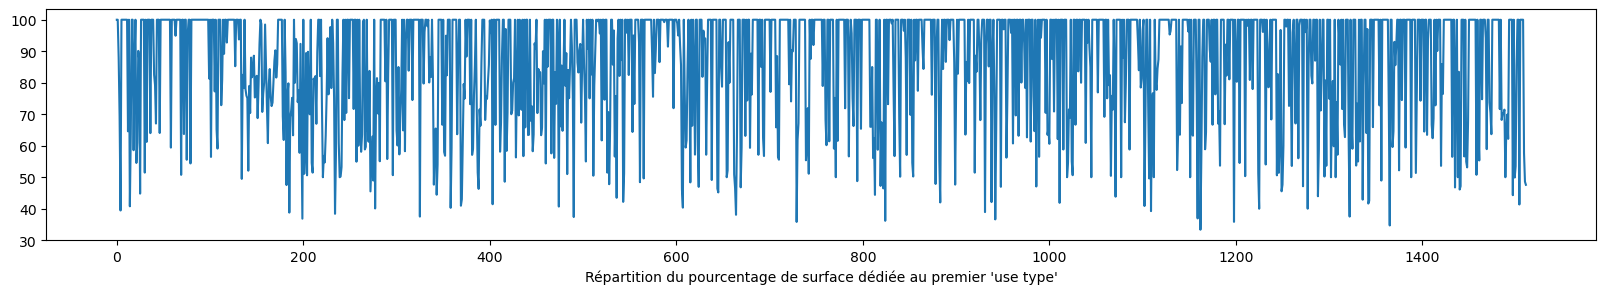

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.plot([i for i in range(1512)], [data.iloc[i,23] for i in range(1512)])
plt.xlabel("Répartition du pourcentage de surface dédiée au premier 'use type'")

In [30]:
data['UseType1GFApercent'].describe()

count    1512.000000
mean       86.053915
std        18.519879
min        33.333333
25%        72.816400
50%       100.000000
75%       100.000000
max       100.000000
Name: UseType1GFApercent, dtype: float64

In [31]:
data['UseType2GFApercent'].describe()

count    1512.000000
mean       11.792319
std        15.373919
min         0.000000
25%         0.000000
50%         0.000000
75%        23.925325
max        50.000000
Name: UseType2GFApercent, dtype: float64

In [33]:
data['UseType3GFApercent'].describe()

count    1512.000000
mean        2.153766
std         5.743949
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.333333
Name: UseType3GFApercent, dtype: float64

In [35]:
data.loc[data['UseType3GFApercent'] > 10, data.columns[21:30]]

LargestPropertyUseType  LargestPropertyUseTypeGFA  \
4                       Social/Meeting Hall                    16442.0   
14                                   Office                   757027.0   
25    Other - Entertainment/Public Assembly                    23500.0   
30                           Medical Office                    40174.0   
75                                   Office                    30000.0   
...                                     ...                        ...   
1458                                 Office                   193393.0   
1474                                 Office                    37668.0   
1486                                 Office                    25927.0   
1497                             Laboratory                   151523.0   
1504                     Other - Recreation                     8108.0   

      UseType1GFApercent    SecondLargestPropertyUseType  \
4              39.440606                      Restaurant   
14             40.772583                      Laboratory   
25             44.796889                      Restaurant   
30             51.464221                         Parking   
75             55.540128      Non-Refrigerated Warehouse   
...                  ...                             ...   
1458           50.766779                         Parking   
1474           63.662791                   Movie Theater   
1486           70.222908                         Parking   
1497           44.301991                          Office   
1504           41.339928  Fitness Center/Health Club/Gym   

      SecondLargestPropertyUseTypeGFA  UseType2GFApercent  \
4                             15505.0           37.192957   
14                           639931.0           34.465931   
25                            23500.0           44.796889   
30                            20868.0           26.732597   
75                            15000.0           27.770064   
...                               ...                 ...   
1458                         149326.0           39.198937   
1474                          11500.0           19.436182   
1486                           5834.0           15.801305   
1497                         106498.0           31.137672   
1504                           7726.0           39.392240   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
4                         Office                          9741.0   
14    Non-Refrigerated Warehouse                        459748.0   
25                        Office                          5459.0   
30                        Office                         17020.0   
75              Other - Services                          9015.0   
...                          ...                             ...   
1458         Multifamily Housing                         38225.0   
1474           Vocational School                         10000.0   
1486         Multifamily Housing                          5160.0   
1497                     Parking                         84002.0   
1504                      Office                          3779.0   

      UseType3GFApercent  
4              23.366436  
14             24.761486  
25             10.406222  
30             21.803182  
75             16.689808  
...                  ...  
1458           10.034283  
1474           16.901028  
1486           13.975786  
1497           24.560337  
1504           19.267833  

[131 rows x 9 columns]

In [19]:
data.loc[data['SecondLargestPropertyUseType'].isna(),'OSEBuildingID'].count()

734

In [20]:
data.loc[data['ThirdLargestPropertyUseType'].isna(),'OSEBuildingID'].count()

1194

In [21]:
data['LargestPropertyUseTypeGFA'].describe()

count    1.512000e+03
mean     9.323142e+04
std      2.787791e+05
min      5.656000e+03
25%      2.524650e+04
50%      4.162800e+04
75%      8.579975e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [22]:
data['SecondLargestPropertyUseTypeGFA'].describe()

count      1512.000000
mean      17853.959852
std       48559.510157
min           0.000000
25%           0.000000
50%           0.000000
75%       11999.250000
max      639931.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [23]:
data['SiteEnergyUseWN(kBtu)'].describe()

count    1.511000e+03
mean     7.004939e+06
std      1.803684e+07
min      0.000000e+00
25%      1.239142e+06
50%      2.484502e+06
75%      6.711845e+06
max      4.716139e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [24]:
data.loc[data['SiteEnergyUseWN(kBtu)'] < 1, 'OSEBuildingID']

9          34
11         37
28         87
43        118
47        122
55        140
87        217
93        227
103       242
156       343
183       372
217       414
281       493
538       820
551       850
596     19776
636     20130
650     20324
845     21616
1007    23722
1451    49703
1480    49967
1481    49968
1482    49972
Name: OSEBuildingID, dtype: int64

In [25]:
data.loc[9]

OSEBuildingID                                        34
DataYear                                           2016
BuildingType                          SPS-District K-12
PrimaryPropertyType                         K-12 School
PropertyName                             Meany Building
Address                            301/300 21st Ave. E.
City                                            Seattle
State                                                WA
ZipCode                                         98112.0
TaxParcelIdentificationNumber                0688000090
CouncilDistrictCode                                   3
Neighborhood                                    Central
Latitude                                       47.62266
Longitude                                    -122.30547
YearBuilt                                          1955
NumberofBuildings                                   1.0
NumberofFloors                                        1
PropertyGFATotal                                

In [27]:
for ident in [11, 28, 43, 47, 55, 87, 93, 103, 156, 183, 217, 281] :
    display(data.loc[ident][16:])

NumberofFloors                                2
PropertyGFATotal                          51582
PropertyGFAParking                            0
PropertyGFABuilding(s)                    51582
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               55166.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                2
PropertyGFATotal                          53352
PropertyGFAParking                            0
PropertyGFABuilding(s)                    53352
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               65568.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                3
PropertyGFATotal                          74468
PropertyGFAParking                            0
PropertyGFABuilding(s)                    74468
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               75364.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                2
PropertyGFATotal                          58933
PropertyGFAParking                            0
PropertyGFABuilding(s)                    58933
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               60725.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                3
PropertyGFATotal                          66588
PropertyGFAParking                            0
PropertyGFABuilding(s)                    66588
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               66588.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                1
PropertyGFATotal                         160270
PropertyGFAParking                            0
PropertyGFABuilding(s)                   160270
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA              160270.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                3
PropertyGFATotal                         136188
PropertyGFAParking                            0
PropertyGFABuilding(s)                   136188
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA              136188.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                2
PropertyGFATotal                          52792
PropertyGFAParking                            0
PropertyGFABuilding(s)                    52792
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               55480.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                  17
PropertyGFATotal                            378525
PropertyGFAParking                           84600
PropertyGFABuilding(s)                      293925
ListOfAllPropertyUseTypes          Office, Parking
LargestPropertyUseType                      Office
LargestPropertyUseTypeGFA                 236827.0
UseType1GFApercent                       70.733266
SecondLargestPropertyUseType               Parking
SecondLargestPropertyUseTypeGFA            83311.0
UseType2GFApercent                       24.882548
ThirdLargestPropertyUseType             Restaurant
ThirdLargestPropertyUseTypeGFA             14679.0
UseType3GFApercent                        4.384186
YearsENERGYSTARCertified                       NaN
ENERGYSTARScore                               69.0
SiteEUI(kBtu/sf)                        105.199997
SiteEUIWN(kBtu/sf)                             0.0
SourceEUI(kBtu/sf)                      240.899994
SourceEUIWN(kBtu/sf)           

NumberofFloors                                      20
PropertyGFATotal                                497513
PropertyGFAParking                              118744
PropertyGFABuilding(s)                          378769
ListOfAllPropertyUseTypes              Office, Parking
LargestPropertyUseType                          Office
LargestPropertyUseTypeGFA                     367623.0
UseType1GFApercent                           76.249292
SecondLargestPropertyUseType                   Parking
SecondLargestPropertyUseTypeGFA               114510.0
UseType2GFApercent                           23.750708
ThirdLargestPropertyUseType                        NaN
ThirdLargestPropertyUseTypeGFA                     0.0
UseType3GFApercent                                 0.0
YearsENERGYSTARCertified           2015|2013|2012|2010
ENERGYSTARScore                                   65.0
SiteEUI(kBtu/sf)                                  73.0
SiteEUIWN(kBtu/sf)                                 0.0
SourceEUI(

NumberofFloors                             15
PropertyGFATotal                       151039
PropertyGFAParking                          0
PropertyGFABuilding(s)                 151039
ListOfAllPropertyUseTypes              Office
LargestPropertyUseType                 Office
LargestPropertyUseTypeGFA            125473.0
UseType1GFApercent                      100.0
SecondLargestPropertyUseType              NaN
SecondLargestPropertyUseTypeGFA           0.0
UseType2GFApercent                        0.0
ThirdLargestPropertyUseType               NaN
ThirdLargestPropertyUseTypeGFA            0.0
UseType3GFApercent                        0.0
YearsENERGYSTARCertified                  NaN
ENERGYSTARScore                          84.0
SiteEUI(kBtu/sf)                    43.400002
SiteEUIWN(kBtu/sf)                        0.0
SourceEUI(kBtu/sf)                  92.300003
SourceEUIWN(kBtu/sf)                      0.0
SiteEnergyUse(kBtu)                 5446624.0
SiteEnergyUseWN(kBtu)             

NumberofFloors                                   5
PropertyGFATotal                             88000
PropertyGFAParking                           21600
PropertyGFABuilding(s)                       66400
ListOfAllPropertyUseTypes          Office, Parking
LargestPropertyUseType                      Office
LargestPropertyUseTypeGFA                  69691.0
UseType1GFApercent                        79.94104
SecondLargestPropertyUseType               Parking
SecondLargestPropertyUseTypeGFA            17487.0
UseType2GFApercent                        20.05896
ThirdLargestPropertyUseType                    NaN
ThirdLargestPropertyUseTypeGFA                 0.0
UseType3GFApercent                             0.0
YearsENERGYSTARCertified                       NaN
ENERGYSTARScore                               75.0
SiteEUI(kBtu/sf)                              50.0
SiteEUIWN(kBtu/sf)                             0.0
SourceEUI(kBtu/sf)                           157.0
SourceEUIWN(kBtu/sf)           

In [31]:
# commençons par imputer SiteEnergyUse(kBtu) à SiteEnergyUseWN(kBtu) pour ceux qui ont cette information :
data.iloc[281, 37] = data.iloc[281, 36]
data.iloc[217, 37] = data.iloc[217, 36]
data.iloc[183, 37] = data.iloc[183, 36]
data.iloc[156, 37] = data.iloc[156, 36]

In [33]:
data.columns[36:42]

Index(['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)'],
      dtype='object')

In [32]:
# vérif.:
data.loc[data['SiteEnergyUseWN(kBtu)'] < 1, 'OSEBuildingID']

9          34
11         37
28         87
43        118
47        122
55        140
87        217
93        227
103       242
538       820
551       850
596     19776
636     20130
650     20324
845     21616
1007    23722
1451    49703
1480    49967
1481    49968
1482    49972
Name: OSEBuildingID, dtype: int64

In [34]:
# les cinq premiers (du 'for') ne consomment que de l'électricité, on va donc imputer cette consommation
# à 'SiteEnergyUseWN(kBtu)' :
data.iloc[11, 37] = data.iloc[11, 40]
data.iloc[28, 37] = data.iloc[28, 40]
data.iloc[43, 37] = data.iloc[43, 40]
data.iloc[47, 37] = data.iloc[47, 40]
data.iloc[55, 37] = data.iloc[55, 40]

In [35]:
for ident in [87, 93, 103] :
    display(data.loc[ident][16:])

NumberofFloors                                1
PropertyGFATotal                         160270
PropertyGFAParking                            0
PropertyGFABuilding(s)                   160270
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA              160270.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                3
PropertyGFATotal                         136188
PropertyGFAParking                            0
PropertyGFABuilding(s)                   136188
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA              136188.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                2
PropertyGFATotal                          52792
PropertyGFAParking                            0
PropertyGFABuilding(s)                    52792
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               55480.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

In [36]:
# pour les deux qui ne consomment que du gaz, on va imputer cette consommation à 'SiteEnergyUseWN(kBtu)' :
data.iloc[87, 37] = data.iloc[87, 42]
data.iloc[93, 37] = data.iloc[93, 42]

Il y a encore des batiments qui n'ont aucune information quand à leur consommation, nous allons, à la fin de ce traitement, les ajouter dans notre fichier 'Building_missing_Energy_info.csv' avant de les supprimer de nos données de travail (pour l'instant deux individus, id. 9 et 103).

In [37]:
for ident in [538, 551, 596, 636, 650, 845, 1007, 1451, 1480, 1481, 1482] :
    display(data.loc[ident][16:])

NumberofFloors                                1
PropertyGFATotal                          52924
PropertyGFAParking                            0
PropertyGFABuilding(s)                    52924
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               52924.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                3
PropertyGFATotal                          55353
PropertyGFAParking                            0
PropertyGFABuilding(s)                    55353
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               55353.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                     1
PropertyGFATotal                               29924
PropertyGFAParking                                 0
PropertyGFABuilding(s)                         29924
ListOfAllPropertyUseTypes          Other - Education
LargestPropertyUseType             Other - Education
LargestPropertyUseTypeGFA                    29924.0
UseType1GFApercent                             100.0
SecondLargestPropertyUseType                     NaN
SecondLargestPropertyUseTypeGFA                  0.0
UseType2GFApercent                               0.0
ThirdLargestPropertyUseType                      NaN
ThirdLargestPropertyUseTypeGFA                   0.0
UseType3GFApercent                               0.0
YearsENERGYSTARCertified                         NaN
ENERGYSTARScore                                  NaN
SiteEUI(kBtu/sf)                                 0.0
SiteEUIWN(kBtu/sf)                               0.0
SourceEUI(kBtu/sf)                            

NumberofFloors                                    2
PropertyGFATotal                              23931
PropertyGFAParking                                0
PropertyGFABuilding(s)                        23931
ListOfAllPropertyUseTypes          Worship Facility
LargestPropertyUseType             Worship Facility
LargestPropertyUseTypeGFA                   23931.0
UseType1GFApercent                            100.0
SecondLargestPropertyUseType                    NaN
SecondLargestPropertyUseTypeGFA                 0.0
UseType2GFApercent                              0.0
ThirdLargestPropertyUseType                     NaN
ThirdLargestPropertyUseTypeGFA                  0.0
UseType3GFApercent                              0.0
YearsENERGYSTARCertified                        NaN
ENERGYSTARScore                                88.0
SiteEUI(kBtu/sf)                          20.700001
SiteEUIWN(kBtu/sf)                              0.0
SourceEUI(kBtu/sf)                        36.400002
SourceEUIWN(

NumberofFloors                                    2
PropertyGFATotal                              31386
PropertyGFAParking                                0
PropertyGFABuilding(s)                        31386
ListOfAllPropertyUseTypes          Worship Facility
LargestPropertyUseType             Worship Facility
LargestPropertyUseTypeGFA                   30000.0
UseType1GFApercent                            100.0
SecondLargestPropertyUseType                    NaN
SecondLargestPropertyUseTypeGFA                 0.0
UseType2GFApercent                              0.0
ThirdLargestPropertyUseType                     NaN
ThirdLargestPropertyUseTypeGFA                  0.0
UseType3GFApercent                              0.0
YearsENERGYSTARCertified                        NaN
ENERGYSTARScore                                52.0
SiteEUI(kBtu/sf)                          37.599998
SiteEUIWN(kBtu/sf)                              0.0
SourceEUI(kBtu/sf)                             89.0
SourceEUIWN(

NumberofFloors                                                1
PropertyGFATotal                                          42292
PropertyGFAParking                                            0
PropertyGFABuilding(s)                                    42292
ListOfAllPropertyUseTypes                           K-12 School
LargestPropertyUseType                              K-12 School
LargestPropertyUseTypeGFA                               43188.0
UseType1GFApercent                                        100.0
SecondLargestPropertyUseType                                NaN
SecondLargestPropertyUseTypeGFA                             0.0
UseType2GFApercent                                          0.0
ThirdLargestPropertyUseType                                 NaN
ThirdLargestPropertyUseTypeGFA                              0.0
UseType3GFApercent                                          0.0
YearsENERGYSTARCertified                                    NaN
ENERGYSTARScore                         

NumberofFloors                                1
PropertyGFATotal                          39971
PropertyGFAParking                            0
PropertyGFABuilding(s)                    39971
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA               40867.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                1
PropertyGFATotal                         116101
PropertyGFAParking                            0
PropertyGFABuilding(s)                   116101
ListOfAllPropertyUseTypes           K-12 School
LargestPropertyUseType              K-12 School
LargestPropertyUseTypeGFA              119685.0
UseType1GFApercent                        100.0
SecondLargestPropertyUseType                NaN
SecondLargestPropertyUseTypeGFA             0.0
UseType2GFApercent                          0.0
ThirdLargestPropertyUseType                 NaN
ThirdLargestPropertyUseTypeGFA              0.0
UseType3GFApercent                          0.0
YearsENERGYSTARCertified                    NaN
ENERGYSTARScore                             NaN
SiteEUI(kBtu/sf)                            0.0
SiteEUIWN(kBtu/sf)                          0.0
SourceEUI(kBtu/sf)                          0.0
SourceEUIWN(kBtu/sf)                        0.0
SiteEnergyUse(kBtu)                     

NumberofFloors                                      0
PropertyGFATotal                              9320156
PropertyGFAParking                                  0
PropertyGFABuilding(s)                        9320156
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                   9320156.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                            93.800003
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

NumberofFloors                                      4
PropertyGFATotal                                58779
PropertyGFAParking                                  0
PropertyGFABuilding(s)                          58779
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                     58779.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                            85.099998
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

NumberofFloors                                      6
PropertyGFATotal                               203030
PropertyGFAParking                                  0
PropertyGFABuilding(s)                         203030
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                    203030.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                                252.0
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

In [38]:
# les deux premiers de cette deuxième série ne consomment que de l'électricité ...
data.iloc[538, 37] = data.iloc[538, 40]
data.iloc[551, 37] = data.iloc[551, 40]

In [39]:
# les quatrième, cinquième ont SiteEnergyUse(kBtu) mais pas SiteEnergyUseWN(kBtu)  ...
data.iloc[636, 37] = data.iloc[636, 36]
data.iloc[650, 37] = data.iloc[650, 36]

In [40]:
# on en a deux qui ne consomment que du gaz :
data.iloc[1007, 37] = data.iloc[1007, 42]
data.iloc[1451, 37] = data.iloc[1451, 42]

In [41]:
for ident in [596, 845, 1480, 1481, 1482] :
    display(data.loc[ident][16:])

NumberofFloors                                     1
PropertyGFATotal                               29924
PropertyGFAParking                                 0
PropertyGFABuilding(s)                         29924
ListOfAllPropertyUseTypes          Other - Education
LargestPropertyUseType             Other - Education
LargestPropertyUseTypeGFA                    29924.0
UseType1GFApercent                             100.0
SecondLargestPropertyUseType                     NaN
SecondLargestPropertyUseTypeGFA                  0.0
UseType2GFApercent                               0.0
ThirdLargestPropertyUseType                      NaN
ThirdLargestPropertyUseTypeGFA                   0.0
UseType3GFApercent                               0.0
YearsENERGYSTARCertified                         NaN
ENERGYSTARScore                                  NaN
SiteEUI(kBtu/sf)                                 0.0
SiteEUIWN(kBtu/sf)                               0.0
SourceEUI(kBtu/sf)                            

NumberofFloors                                                1
PropertyGFATotal                                          42292
PropertyGFAParking                                            0
PropertyGFABuilding(s)                                    42292
ListOfAllPropertyUseTypes                           K-12 School
LargestPropertyUseType                              K-12 School
LargestPropertyUseTypeGFA                               43188.0
UseType1GFApercent                                        100.0
SecondLargestPropertyUseType                                NaN
SecondLargestPropertyUseTypeGFA                             0.0
UseType2GFApercent                                          0.0
ThirdLargestPropertyUseType                                 NaN
ThirdLargestPropertyUseTypeGFA                              0.0
UseType3GFApercent                                          0.0
YearsENERGYSTARCertified                                    NaN
ENERGYSTARScore                         

NumberofFloors                                      0
PropertyGFATotal                              9320156
PropertyGFAParking                                  0
PropertyGFABuilding(s)                        9320156
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                   9320156.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                            93.800003
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

NumberofFloors                                      4
PropertyGFATotal                                58779
PropertyGFAParking                                  0
PropertyGFABuilding(s)                          58779
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                     58779.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                            85.099998
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

NumberofFloors                                      6
PropertyGFATotal                               203030
PropertyGFAParking                                  0
PropertyGFABuilding(s)                         203030
ListOfAllPropertyUseTypes          College/University
LargestPropertyUseType             College/University
LargestPropertyUseTypeGFA                    203030.0
UseType1GFApercent                              100.0
SecondLargestPropertyUseType                      NaN
SecondLargestPropertyUseTypeGFA                   0.0
UseType2GFApercent                                0.0
ThirdLargestPropertyUseType                       NaN
ThirdLargestPropertyUseTypeGFA                    0.0
UseType3GFApercent                                0.0
YearsENERGYSTARCertified                          NaN
ENERGYSTARScore                                   NaN
SiteEUI(kBtu/sf)                                252.0
SiteEUIWN(kBtu/sf)                                0.0
SourceEUI(kBtu/sf)          

In [42]:
# enfin trois qui ont SiteEnergyUse(kBtu) mais pas SiteEnergyUseWN(kBtu) et deux sans info.
data.iloc[1480, 37] = data.iloc[1480, 36]
data.iloc[1481, 37] = data.iloc[1481, 36]
data.iloc[1482, 37] = data.iloc[1482, 36]

In [43]:
# il doit rester les 4 sans info. :
data.loc[data['SiteEnergyUseWN(kBtu)'] < 1, 'OSEBuildingID']

9         34
103      242
596    19776
845    21616
Name: OSEBuildingID, dtype: int64

In [44]:
df1 = pd.read_csv('Building_missing_Energy_info.csv')
df2 = data.loc[data['SiteEnergyUseWN(kBtu)'] < 1, :]
# il faut retirer les nouvelles colonnes avant concaténation

In [46]:
df1.columns

Index(['Unnamed: 0', 'OSEBuildingID', 'DataYear', 'BuildingType',
       'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State',
       'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceSta

In [47]:
df1 = df1.drop('Unnamed: 0', axis=1)
df2 = df2.drop('UseType1GFApercent', axis=1)
df2 = df2.drop('UseType2GFApercent', axis=1)
df2 = df2.drop('UseType3GFApercent', axis=1)

In [48]:
df = pd.concat([df1, df2], ignore_index=True)
df.head(7)

OSEBuildingID  DataYear       BuildingType          PrimaryPropertyType  \
0            435      2016     NonResidential                        Other   
1            773      2016     NonResidential  Small- and Mid-Sized Office   
2          26532      2016     NonResidential           Mixed Use Property   
3             34      2016  SPS-District K-12                  K-12 School   
4            242      2016  SPS-District K-12                  K-12 School   
5          19776      2016     NonResidential                        Other   
6          21616      2016  SPS-District K-12                  K-12 School   

                         PropertyName                 Address     City State  \
0  Washington State Convention Center             705 Pike St  Seattle    WA   
1                    SEATTLE BUILDING         215 COLUMBIA ST  Seattle    WA   
2                    KALBERG BUILDING  4515 UNIVERSITY WAY NE  Seattle    WA   
3                      Meany Building    301/300 21st Ave. E.  Seattle    WA   
4             Olympic View Elementary       504 N.E. 95th St.  Seattle    WA   
5      Welcome Home Society - PriceCo      13537 Aurora Ave N  Seattle    WA   
6            Olympic Hills Elementary    13018 20th Ave. N.E.  Seattle    WA   

   ZipCode TaxParcelIdentificationNumber  ...  Electricity(kWh)  \
0  98101.0                    1978200105  ...               0.0   
1  98104.0                     939000245  ...               NaN   
2  98105.0                    8816401120  ...               NaN   
3  98112.0                    0688000090  ...               0.0   
4  98115.0                    5100404840  ...               0.0   
5  98133.0                    0164000020  ...               0.0   
6  98125.0                    2126049041  ...               0.0   

  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
0               0.0                 0.0               0.0        False   
1               NaN                 NaN               NaN        False   
2               NaN                 NaN               NaN        False   
3               0.0                 0.0               0.0        False   
4               0.0                 0.0               0.0        False   
5               0.0                 0.0               0.0        False   
6               0.0                 0.0               0.0         True   

   Comments              ComplianceStatus  Outlier  TotalGHGEmissions  \
0       NaN                 Non-Compliant      NaN                0.0   
1       NaN                 Non-Compliant      NaN                NaN   
2       NaN                 Non-Compliant      NaN                NaN   
3       NaN                  Missing Data      NaN                0.0   
4       NaN                  Missing Data      NaN                0.0   
5       NaN                  Missing Data      NaN                0.0   
6       NaN  Error - Correct Default Data      NaN                0.0   

   GHGEmissionsIntensity  
0                    0.0  
1                    NaN  
2                    NaN  
3                    0.0  
4                    0.0  
5                    0.0  
6                    0.0  

[7 rows x 46 columns]

In [49]:
df.to_csv('Building_missing_Energy_info.csv')
data = data.loc[data['SiteEnergyUseWN(kBtu)'] > 1, :]
data.shape

(1507, 49)

In [50]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

Concernant les champs catégoriels, plutôt que d'utiliser un 'one-hot encoder' qui va engendrer beaucoup de colonnes supplémentaires, je vais reprendre ce qui a été fait précédement avec les groupes définis pour l'année de construction et les types d'usages. Aprés avoir créé un dataframe spécifique à cette nouvelle modélisation bien sûr.

In [5]:
for ind, val in enumerate(data.columns):
    print(ind, val)

0 OSEBuildingID
1 DataYear
2 BuildingType
3 PrimaryPropertyType
4 PropertyName
5 Address
6 City
7 State
8 ZipCode
9 TaxParcelIdentificationNumber
10 CouncilDistrictCode
11 Neighborhood
12 Latitude
13 Longitude
14 YearBuilt
15 NumberofBuildings
16 NumberofFloors
17 PropertyGFATotal
18 PropertyGFAParking
19 PropertyGFABuilding(s)
20 ListOfAllPropertyUseTypes
21 LargestPropertyUseType
22 LargestPropertyUseTypeGFA
23 UseType1GFApercent
24 SecondLargestPropertyUseType
25 SecondLargestPropertyUseTypeGFA
26 UseType2GFApercent
27 ThirdLargestPropertyUseType
28 ThirdLargestPropertyUseTypeGFA
29 UseType3GFApercent
30 YearsENERGYSTARCertified
31 ENERGYSTARScore
32 SiteEUI(kBtu/sf)
33 SiteEUIWN(kBtu/sf)
34 SourceEUI(kBtu/sf)
35 SourceEUIWN(kBtu/sf)
36 SiteEnergyUse(kBtu)
37 SiteEnergyUseWN(kBtu)
38 SteamUse(kBtu)
39 Electricity(kWh)
40 Electricity(kBtu)
41 NaturalGas(therms)
42 NaturalGas(kBtu)
43 DefaultData
44 Comments
45 ComplianceStatus
46 Outlier
47 TotalGHGEmissions
48 GHGEmissionsIntensity


In [9]:
DF = data.take([0, 14, 21, 22, 23, 24, 25, 26, 27, 28, 29, 37], axis=1)

In [10]:
DF.shape

(1507, 12)

In [11]:
DF.columns

Index(['OSEBuildingID', 'YearBuilt', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'UseType1GFApercent',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'UseType2GFApercent', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'UseType3GFApercent',
       'SiteEnergyUseWN(kBtu)'],
      dtype='object')

In [14]:
# comme déjà vu, la dixième période étant déductible des autres on ne la garderait pas ...
DF.loc[DF['YearBuilt'] < 1904, 'per1'] = True
DF.loc[(DF['YearBuilt'] > 1903) & (DF['YearBuilt'] < 1918), 'per2'] = True
DF.loc[(DF['YearBuilt'] > 1917) & (DF['YearBuilt'] < 1934), 'per3'] = True
DF.loc[(DF['YearBuilt'] > 1933) & (DF['YearBuilt'] < 1943), 'per4'] = True
DF.loc[(DF['YearBuilt'] > 1942) & (DF['YearBuilt'] < 1959), 'per5'] = True
DF.loc[(DF['YearBuilt'] > 1958) & (DF['YearBuilt'] < 1973), 'per6'] = True
DF.loc[(DF['YearBuilt'] > 1972) & (DF['YearBuilt'] < 1987), 'per7'] = True
DF.loc[(DF['YearBuilt'] > 1986) & (DF['YearBuilt'] < 1997), 'per8'] = True
DF.loc[(DF['YearBuilt'] > 1996) & (DF['YearBuilt'] < 2005), 'per9'] = True
for i in range(9) :
    DF['per' + str(i+1)].fillna(False, inplace=True)

In [15]:
DF.iloc[0:15,11:]

SiteEnergyUseWN(kBtu)   per1   per2   per3   per4   per5   per6   per7  \
0            1.258171e+07  False  False  False  False  False  False  False   
1            7.067882e+06  False  False   True  False  False  False  False   
2            1.870691e+07  False  False  False  False  False  False  False   
3            1.019212e+07  False  False   True  False  False  False  False   
4            7.877219e+06  False   True  False  False  False  False  False   
5            4.702309e+07  False   True  False  False  False  False  False   
6            1.713624e+06  False  False  False  False  False   True  False   
7            1.218331e+07  False  False   True  False  False  False  False   
8            1.310237e+06  False  False   True  False  False  False  False   
9            7.800350e+06  False  False  False  False   True  False  False   
10           1.496816e+06  False  False  False  False  False  False  False   
11           4.703690e+06  False   True  False  False  False  False  False   
12           3.262231e+05  False  False  False  False   True  False  False   
13           4.716139e+08  False  False  False  False  False  False  False   
14           4.411002e+07  False  False  False  False  False   True  False   

     per8   per9  
0   False   True  
1   False  False  
2   False   True  
3   False  False  
4   False  False  
5   False  False  
6   False  False  
7   False  False  
8   False  False  
9   False  False  
10   True  False  
11  False  False  
12  False  False  
13   True  False  
14  False  False

In [18]:
DF.to_csv('DFmodel2.csv')

In [16]:
DF = DF.drop('YearBuilt', axis = 1)
DF['per1'] = DF['per1'].astype('int')
DF['per2'] = DF['per2'].astype('int')
DF['per3'] = DF['per3'].astype('int')
DF['per4'] = DF['per4'].astype('int')
DF['per5'] = DF['per5'].astype('int')
DF['per6'] = DF['per6'].astype('int')
DF['per7'] = DF['per7'].astype('int')
DF['per8'] = DF['per8'].astype('int')
DF['per9'] = DF['per9'].astype('int')

In [17]:
DF.iloc[0:15,11:]

per1  per2  per3  per4  per5  per6  per7  per8  per9
0      0     0     0     0     0     0     0     0     1
1      0     0     1     0     0     0     0     0     0
2      0     0     0     0     0     0     0     0     1
3      0     0     1     0     0     0     0     0     0
4      0     1     0     0     0     0     0     0     0
5      0     1     0     0     0     0     0     0     0
6      0     0     0     0     0     1     0     0     0
7      0     0     1     0     0     0     0     0     0
8      0     0     1     0     0     0     0     0     0
9      0     0     0     0     1     0     0     0     0
10     0     0     0     0     0     0     0     1     0
11     0     1     0     0     0     0     0     0     0
12     0     0     0     0     1     0     0     0     0
13     0     0     0     0     0     0     0     1     0
14     0     0     0     0     0     1     0     0     0

In [6]:
useList = ['Police Station','Fire Station']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', 'Other - Services', \
           'Other - Utility']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch', 'Other - Lodging/Residential']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', 'Personal Services (Health/Beauty, Dry Cleaning, etc)']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'use10'] = True
for i in range(10) :
    DF['use' + str(i+1)].fillna(False, inplace=True)


In [7]:
DF = DF.drop('LargestPropertyUseType', axis = 1)
for i in range(10):
    DF['use{}'.format(i+1)] = DF['use{}'.format(i+1)].astype('int')

In [8]:
DF.iloc[0:15,11:]

per2  per3  per4  per5  per6  per7  per8  per9  use1  use2  use3  use4  \
0      0     0     0     0     0     0     0     1     1     0     0     0   
1      0     1     0     0     0     0     0     0     0     0     0     1   
2      0     0     0     0     0     0     0     1     0     1     0     0   
3      0     1     0     0     0     0     0     0     0     0     0     0   
4      1     0     0     0     0     0     0     0     0     0     0     1   
5      1     0     0     0     0     0     0     0     0     0     0     0   
6      0     0     0     0     1     0     0     0     0     0     0     0   
7      0     1     0     0     0     0     0     0     0     0     0     0   
8      0     1     0     0     0     0     0     0     0     0     1     0   
9      0     0     0     1     0     0     0     0     0     0     0     0   
10     0     0     0     0     0     0     1     0     0     0     0     0   
11     1     0     0     0     0     0     0     0     0     0     0     0   
12     0     0     0     1     0     0     0     0     0     0     1     0   
13     0     0     0     0     0     0     1     0     0     0     0     0   
14     0     0     0     0     1     0     0     0     0     0     1     0   

    use5  use6  use7  use8  use9  use10  
0      0     0     0     0     0      0  
1      0     0     0     0     0      0  
2      0     0     0     0     0      0  
3      0     0     0     1     0      0  
4      0     0     0     0     0      0  
5      0     0     1     0     0      0  
6      1     0     0     0     0      0  
7      1     0     0     0     0      0  
8      0     0     0     0     0      0  
9      1     0     0     0     0      0  
10     1     0     0     0     0      0  
11     0     0     1     0     0      0  
12     0     0     0     0     0      0  
13     0     0     1     0     0      0  
14     0     0     0     0     0      0

In [9]:
DF.columns

Index(['OSEBuildingID', 'LargestPropertyUseTypeGFA', 'UseType1GFApercent',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'UseType2GFApercent', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'UseType3GFApercent',
       'SiteEnergyUseWN(kBtu)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'use1', 'use2', 'use3', 'use4', 'use5', 'use6',
       'use7', 'use8', 'use9', 'use10'],
      dtype='object')

In [10]:
DF['ThirdLargestPropertyUseType'][0:20]

0                                       NaN
1                                       NaN
2                               Data Center
3                             Swimming Pool
4                                    Office
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                       NaN
10                                      NaN
11    Other - Entertainment/Public Assembly
12                                      NaN
13               Non-Refrigerated Warehouse
14                                   Office
15                                      NaN
16                                      NaN
17                                      NaN
18                                      NaN
19                                      NaN
Name: ThirdLargestPropertyUseType, dtype: object

Avant de binariser les 2-ième et 3-ième UseType, un éventuel problème m'apparait : pour le premier UseType qui est renseigné pour tous les individus, nous avons mis à 0 les 'use' qui ne les concernent pas. Mais pour les suivants, si on fait pareil, ce 0 pourra signifier aussi bien que l'individu n'est pas concerné ou que l'individu n'a pas de 2-ième / 3-ième UseType. Nous pourrions donc perdre plus d'information; Mais j'ai une idée pour limiter cette perte : nous allons garder toutes les catégories (pour le premier, on a gardé que 10 cat. sur 11 car la 11~ième est déductible des autres), ainsi si un individu n'a que des 0 sur toutes les catégories de 2-ième / 3-ième UseTypes c'est qu'il n'a pas de 2-ième / 3-ième UseType.
<br>Mais d'abord il faut renommer les colonnes 'use' en 'firstuse' afin de pouvoir créer les 'seconduse' et 'thirduse' :

In [11]:
DF.rename(columns={'use1':'firstuse1','use2':'firstuse2','use3':'firstuse3','use4':'firstuse4','use5':'firstuse5',\
                   'use6':'firstuse6','use7':'firstuse7','use8':'firstuse8','use9':'firstuse9','use10':'firstuse10'}, \
          inplace=True)

In [10]:
# au fait, je n'ai pas vérifié que les second / third UseTypes avaient bien les mêmes intitulés que les premiers :
import numpy as np
np.sort(data['LargestPropertyUseType'].unique())

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'College/University', 'Courthouse', 'Data Center',
       'Distribution Center', 'Financial Office', 'Fire Station',
       'Fitness Center/Health Club/Gym', 'Food Service', 'K-12 School',
       'Laboratory', 'Library', 'Lifestyle Center',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Movie Theater', 'Museum', 'Non-Refrigerated Warehouse', 'Office',
       'Other', 'Other - Education',
       'Other - Entertainment/Public Assembly',
       'Other - Lodging/Residential', 'Other - Mall',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Other - Utility',
       'Other/Specialty Hospital', 'Parking', 'Performing Arts',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Police Station', 'Pre-school/Daycare', 'Refrigerated Warehouse',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Restaurant',
       'Retai

In [16]:
np.sort(data.loc[~data['SecondLargestPropertyUseType'].isna(),'SecondLargestPropertyUseType'].unique())

array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
       'Bar/Nightclub', 'College/University',
       'Convenience Store without Gas Station', 'Courthouse',
       'Data Center', 'Distribution Center', 'Enclosed Mall',
       'Financial Office', 'Fitness Center/Health Club/Gym', 'Food Sales',
       'Food Service', 'K-12 School', 'Laboratory',
       'Manufacturing/Industrial Plant', 'Medical Office',
       'Movie Theater', 'Multifamily Housing',
       'Non-Refrigerated Warehouse', 'Office', 'Other',
       'Other - Education', 'Other - Entertainment/Public Assembly',
       'Other - Public Services', 'Other - Recreation',
       'Other - Restaurant/Bar', 'Other - Services', 'Parking',
       'Performing Arts',
       'Personal Services (Health/Beauty, Dry Cleaning, etc)',
       'Pre-school/Daycare', 'Refrigerated Warehouse',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Residence Hall/Dormitory', 'Restaurant', 'Retail Store',
       'Self-Storag

In [19]:
listRef = list(data['LargestPropertyUseType'].unique())
for usetype in data.loc[~data['SecondLargestPropertyUseType'].isna(),'SecondLargestPropertyUseType'].unique() :
    try :
        ind = listRef.index(usetype)
    except :
        print(usetype)
        continue

Vocational School
Residence Hall/Dormitory
Convenience Store without Gas Station
Enclosed Mall
Multifamily Housing
Bar/Nightclub
Swimming Pool
Food Sales


In [20]:
for usetype in data.loc[~data['ThirdLargestPropertyUseType'].isna(),'ThirdLargestPropertyUseType'].unique() :
    try :
        ind = listRef.index(usetype)
    except :
        print(usetype)
        continue

Swimming Pool
Convenience Store without Gas Station
Multifamily Housing
Hotel
Other - Technology/Science
Bar/Nightclub
Fast Food Restaurant
Vocational School


Il faudra donc ajouter ces UseTypes dans les catégories lors de la binarisation des second / third UseTypes. Au total 11 nouvelles entrées : Bar/Nightclub, Convenience Store without Gas Station, Enclosed Mall, Fast Food Restaurant, Food Sales, Hotel, Multifamily Housing, Other - Technology/Science, Residence Hall/Dormitory, Swimming Pool, Vocational School.

In [21]:
useList = ['Police Station','Fire Station']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', 'Other - Services', \
           'Other - Utility']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other', 'Convenience Store without Gas Station']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education', 'Vocational School']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center', 'Enclosed Mall']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', \
           'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Other - Technology/Science']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory', 'Bar/Nightclub', 'Fast Food Restaurant', \
           'Food Sales']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse', 'Swimming Pool']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse10'] = True
useList = ['Hotel', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'seconduse11'] = True  # ce groupe n'existait pas pour les
DF.loc[DF['SecondLargestPropertyUseType'] == 'Parking', 'seconduse12'] = True             # 'LargestPropertyUseType'
for i in range(12) :
    DF['seconduse' + str(i+1)].fillna(False, inplace=True)


In [22]:
DF = DF.drop('SecondLargestPropertyUseType', axis = 1)
for i in range(12):
    DF['seconduse{}'.format(i+1)] = DF['seconduse{}'.format(i+1)].astype('int')

In [23]:
DF.iloc[0:15,20:]

firstuse3  firstuse4  firstuse5  firstuse6  firstuse7  firstuse8  \
0           0          0          0          0          0          0   
1           0          1          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          1   
4           0          1          0          0          0          0   
5           0          0          0          0          1          0   
6           0          0          1          0          0          0   
7           0          0          1          0          0          0   
8           1          0          0          0          0          0   
9           0          0          1          0          0          0   
10          0          0          1          0          0          0   
11          0          0          0          0          1          0   
12          1          0          0          0          0          0   
13          0          0          0          0          1          0   
14          1          0          0          0          0          0   

    firstuse9  firstuse10  seconduse1  seconduse2  seconduse3  seconduse4  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   
6           0           0           0           0           0           0   
7           0           0           0           0           0           0   
8           0           0           0           0           0           0   
9           0           0           0           0           0           0   
10          0           0           0           0           0           0   
11          0           0           0           0           0           0   
12          0           0           0           0           0           0   
13          0           0           0           0           0           0   
14          0           0           0           0           0           0   

    seconduse5  seconduse6  seconduse7  seconduse8  seconduse9  seconduse10  \
0            0           0           0           0           0            0   
1            0           0           0           0           0            0   
2            0           0           0           0           0            0   
3            0           0           1           0           0            0   
4            0           0           0           0           1            0   
5            0           0           0           0           0            0   
6            0           0           0           0           0            0   
7            0           0           0           0           0            0   
8            0           0           0           0           0            0   
9            0           0           0           0           0            0   
10           0           0           0           0           0            0   
11           1           0           0           0           0            0   
12           0           0           0           0           0            0   
13           0           0           0           0           1            0   
14           0           0           0           0           0            1   

    seconduse11  seconduse12  
0             0            0  
1             0            0  
2             0            1  
3             0            0  
4             0            0  
5             0            0  
6             0            0  
7             0            0  
8             0            0  
9             0            0  
10          

In [24]:
# même travail pour le 'third' :
useList = ['Police Station','Fire Station']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', \
           'Other - Services', 'Other - Utility']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other', 'Convenience Store without Gas Station']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education', 'Vocational School']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center', 'Enclosed Mall']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', \
           'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Other - Technology/Science']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory', 'Bar/Nightclub', \
           'Fast Food Restaurant', 'Food Sales']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse', 'Swimming Pool']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse10'] = True
useList = ['Hotel', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'thirduse11'] = True
DF.loc[DF['ThirdLargestPropertyUseType'] == 'Parking', 'thirduse12'] = True
for i in range(12) :
    DF['thirduse' + str(i+1)].fillna(False, inplace=True)


In [25]:
DF = DF.drop('ThirdLargestPropertyUseType', axis = 1)
for i in range(12):
    DF['thirduse{}'.format(i+1)] = DF['thirduse{}'.format(i+1)].astype('int')

In [26]:
DF.iloc[0:15,30:]

seconduse4  seconduse5  seconduse6  seconduse7  seconduse8  seconduse9  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           1           0           0   
4            0           0           0           0           0           1   
5            0           0           0           0           0           0   
6            0           0           0           0           0           0   
7            0           0           0           0           0           0   
8            0           0           0           0           0           0   
9            0           0           0           0           0           0   
10           0           0           0           0           0           0   
11           0           1           0           0           0           0   
12           0           0           0           0           0           0   
13           0           0           0           0           0           1   
14           0           0           0           0           0           0   

    seconduse10  seconduse11  seconduse12  thirduse1  ...  thirduse3  \
0             0            0            0          0  ...          0   
1             0            0            0          0  ...          0   
2             0            0            1          0  ...          0   
3             0            0            0          0  ...          0   
4             0            0            0          0  ...          0   
5             0            0            0          0  ...          0   
6             0            0            0          0  ...          0   
7             0            0            0          0  ...          0   
8             0            0            0          0  ...          0   
9             0            0            0          0  ...          0   
10            0            0            0          0  ...          0   
11            0            0            0          0  ...          0   
12            0            0            0          0  ...          0   
13            0            0            0          0  ...          1   
14            1            0            0          0  ...          0   

    thirduse4  thirduse5  thirduse6  thirduse7  thirduse8  thirduse9  \
0           0          0          0          0          0          0   
1           0          0          0          0          0          0   
2           0          0          0          0          0          0   
3           0          0          0          0          0          0   
4           0          0          0          1          0          0   
5           0          0          0          0          0          0   
6           0          0          0          0          0          0   
7           0          0          0          0          0          0   
8           0          0          0          0          0          0   
9           0          0          0          0          0          0   
10          0          0          0          0          0          0   
11          1          0          0          0          0          0   
12          0          0          0          0          0          0   
13          0          0          0          0          0          0   
14          0          0          0          1          0          0   

    thirduse10  thirduse11  thirduse12  
0            0           0           0  
1            0           0           0  
2            1           0           0  
3            1           0           0  
4            0           0           0  
5            0           0           0  
6            0           0           0  
7            0           0           0  
8            0           0           0  
9            0           0           0 

In [27]:
DF.to_csv('DFmodel2.csv')

Text(0, 0.5, 'Use Type Category   1 -> 11')

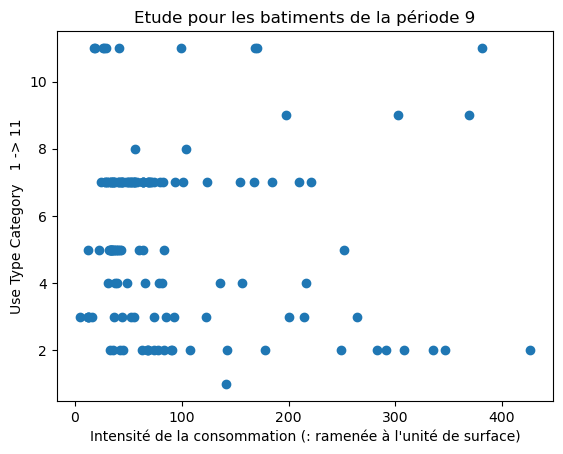

In [82]:
# avant de lancer des modélisations complexes, j'aimerais voir si on peut 'sentir' quelquechose avec des graphes simples :
def getFirstUseType(df) :
    tmp = []
    for i in range(len(df)) :
        found = False
        for j in range(17,27,1) :
            if df.iloc[i,j] > 0.9 :
                tmp.append(j-16)
                found = True
                continue
        if not found :
            tmp.append(11)
    return tmp    

def getEUI(df)
    tmp = []
    for i in range(len(df)) :
        val = df.iloc[i,0] / (df.iloc[i,1] + df.iloc[i,2] + df.iloc[i,3])
        tmp.append(val)
    return tmp

plt.scatter(getEUI(DF.loc[DF['per9'] == 1, ['SiteEnergyUseWN(kBtu)', 'LargestPropertyUseTypeGFA', \
                                            'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']]),
            getFirstUseType(DF.loc[DF['per9'] == 1,:]) )
plt.title("Etude pour les batiments de la période 9")
plt.xlabel("Intensité de la consommation (: ramenée à l'unité de surface)")
plt.ylabel("Use Type Category   1 -> 11")

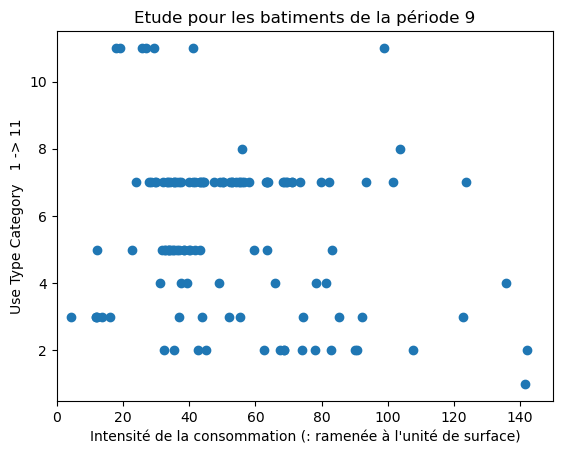

In [84]:
fig, axes = plt.subplots()
axes.scatter(getEUI(DF.loc[DF['per9'] == 1, ['SiteEnergyUseWN(kBtu)', 'LargestPropertyUseTypeGFA', \
                                             'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']]),
            getFirstUseType(DF.loc[DF['per9'] == 1,:]) )
axes.set_xlim(0, 150)
plt.title("Etude pour les batiments de la période 9")
plt.xlabel("Intensité de la consommation (: ramenée à l'unité de surface)")
plt.ylabel("Use Type Category   1 -> 11")
plt.show()

On voit que certaines catégories sont beaucoup plus représentées que d'autres, et que l'intensité du 'coeur du nuage' dépend bien de la catégorie. Par exemple pour la 5 (les batiments scolaires) la moyenne est vers 38 alors que pour la 4 (lieux de spectacles et meetings) on est plus vers 60 et pour la 2 (commerces variés mais pas très gros) vers 70. Il est clair aussi que certaines catégories sont plus groupées que d'autres. En tout cas, on voit qu'il y a une certaine logique, ce qui laisse entrevoir la possibilité de trouver un modèle pertinent.

In [47]:
DF.loc[DF['OSEBuildingID'] == 121, 'firstuse7'].iloc[0] == 1.0 # pour mémoire/syntaxe: évite le retour d'une liste pour les if

True

Maintenant que nous avons des données prêtes pour la modélisation, après une nouvelle phase un peu longue de nettoyage et 'feature engineering', nous allons créer un jeu d'entrainement et un jeu de test afin de chercher les meilleurs paramètres pour une SVR à noyau et une 'KRR', et comparer les résultats pour ces deux modèles.
Nous n'allons pas utiliser 'UseType3GFApercent' car il est déductible des deux autres (somme des trois = 100).

In [3]:
for ind, val in enumerate(DF.columns):
    print(ind, val)

0 OSEBuildingID
1 LargestPropertyUseTypeGFA
2 UseType1GFApercent
3 SecondLargestPropertyUseTypeGFA
4 UseType2GFApercent
5 ThirdLargestPropertyUseTypeGFA
6 UseType3GFApercent
7 SiteEnergyUseWN(kBtu)
8 per1
9 per2
10 per3
11 per4
12 per5
13 per6
14 per7
15 per8
16 per9
17 firstuse1
18 firstuse2
19 firstuse3
20 firstuse4
21 firstuse5
22 firstuse6
23 firstuse7
24 firstuse8
25 firstuse9
26 firstuse10
27 seconduse1
28 seconduse2
29 seconduse3
30 seconduse4
31 seconduse5
32 seconduse6
33 seconduse7
34 seconduse8
35 seconduse9
36 seconduse10
37 seconduse11
38 seconduse12
39 thirduse1
40 thirduse2
41 thirduse3
42 thirduse4
43 thirduse5
44 thirduse6
45 thirduse7
46 thirduse8
47 thirduse9
48 thirduse10
49 thirduse11
50 thirduse12


In [4]:
# données étiquettes :
y = DF['SiteEnergyUseWN(kBtu)'].values
# données échantillon :
X = DF.drop(['OSEBuildingID','UseType3GFApercent','SiteEnergyUseWN(kBtu)'], axis=1).values

In [5]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [6]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [9]:
# pour les modèles nous utiliserons un noyau gaussien :
from sklearn import svm
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-2, 1, 4)
param_grid = {'C': C_range, 'gamma': gamma_range}
score = 'r2'
grid = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score)

In [10]:
grid.fit(X_train_std, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'C': 1000.0, 'gamma': 0.01} with a score of -0.10


In [11]:
# le résultat est très décevant, même pas la peine d'essayer de prédire sur le jeu de test, passons donc à la KRR :
from sklearn import kernel_ridge
param_grid['alpha'] = C_range
del param_grid['C']   # : changement du nom du param. pour ce modèle, mais on garde les mêmes valeurs
grid2 = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score)

In [12]:
grid2.fit(X_train_std, y_train)
for key, val in grid2.cv_results_.items() :
    print(key, end='')
    print(' -> ', end='')
    print(val)

mean_fit_time -> [0.03158817 0.025      0.031249   0.07674971 0.02500024 0.02427931
 0.02380452 0.06804442 0.02212868 0.01874928 0.0156271  0.06853352
 0.021875   0.02187524 0.01839142 0.06562448 0.02485576 0.02208433
 0.02499995 0.06894212 0.02187505 0.01562524 0.02263684 0.06497684]
std_fit_time -> [2.31848526e-02 7.65709043e-03 2.32332758e-06 2.16142733e-03
 7.65533680e-03 7.21909869e-03 7.02589700e-03 6.88222513e-03
 8.22795512e-03 6.25000037e-03 2.52048021e-06 7.39770149e-03
 7.65426612e-03 7.65475278e-03 9.18693230e-03 6.25097795e-03
 6.35683933e-03 7.49240324e-03 7.65383790e-03 7.89617800e-03
 7.65490852e-03 3.01578299e-07 7.16944289e-03 6.69268168e-03]
mean_score_time -> [0.00079975 0.         0.         0.00137815 0.00312476 0.00493069
 0.00312567 0.00312524 0.00410662 0.00312533 0.00937219 0.00990624
 0.         0.00624986 0.00685048 0.00625019 0.00377126 0.00312495
 0.00312486 0.003125   0.00312495 0.00624986 0.00312505 0.00937552]
std_score_time -> [0.0015995  0.         0.

In [13]:
print("The optimal parameters are {} with a score of {:.2f}".format(grid2.best_params_,grid2.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.01} with a score of 0.38


C'est déjà bien mieux ! (Il s'agit ici du meilleur 'mean_test_score' sur le jeu d'entrainement) Mais visiblement pour avoir un meilleur modèle il va falloir faire intervenir d'autres données que les {surfaces + dates de construction + types d'usage}. Mais déjà, évaluons la prédiction du modèle optimisé ! :

In [14]:
y_test_pred_cv = grid2.predict(X_test_std)

In [16]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test, y_test_pred_cv)
print(r2_test)

0.09248132370143303


In [18]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cv)) # root mean squared error
print(rmse_test)

30709842.487983797


In [19]:
print(metrics.mean_absolute_error(y_test, y_test_pred_cv))
print(metrics.mean_squared_error(y_test, y_test_pred_cv))

5220668.654791724
943094425636774.9


Le modèle à ce niveau est donc confirmé comme mauvais. Nous allons donc **utiliser un peu plus de données dans une nouvelle étude.** <a name='E3'>

In [2]:
data['Unnamed: 0'] = data['SiteEnergyUseWN(kBtu)'] / data['SiteEnergyUse(kBtu)']

In [3]:
data['Unnamed: 0'].describe()

count    1507.000000
mean        1.054843
std         0.054162
min         0.962721
25%         1.002217
50%         1.041362
75%         1.089254
max         1.240482
Name: Unnamed: 0, dtype: float64

In [4]:
Rapport_Intensite = data['SiteEUIWN(kBtu/sf)'] / data['SiteEUI(kBtu/sf)']
type(Rapport_Intensite)

pandas.core.series.Series

In [5]:
Rapport_Intensite.describe()

count    1496.000000
mean        1.049256
std         0.098474
min         0.000000
25%         1.003015
50%         1.042254
75%         1.090432
max         1.275000
dtype: float64

Cette petite analyse avait pour but de trouver une éventuelle relation constante entre les données 'weather normalized' et les données mesurées, mais la relation est plus complexe.

In [3]:
data.iloc[0:15,0:4]

OSEBuildingID  DataYear        BuildingType          PrimaryPropertyType
0               9      2016  Nonresidential COS                        Other
1              11      2016      NonResidential                        Other
2              21      2016  Nonresidential COS                        Other
3              22      2016      NonResidential                        Other
4              24      2016      NonResidential           Mixed Use Property
5              26      2016      NonResidential                        Other
6              28      2016   SPS-District K-12                  K-12 School
7              30      2016      NonResidential                   University
8              31      2016      NonResidential                        Other
9              36      2016   SPS-District K-12                  K-12 School
10             37      2016   SPS-District K-12                  K-12 School
11             38      2016      NonResidential  Small- and Mid-Sized Office
12             41      2016      NonResidential        Self-Storage Facility
13             43      2016              Campus           Mixed Use Property
14             46      2016      NonResidential                    Warehouse

In [7]:
data[['Neighborhood','LargestPropertyUseType']][0:15]

Neighborhood                 LargestPropertyUseType
0                DOWNTOWN                         Police Station
1                DOWNTOWN  Other - Entertainment/Public Assembly
2                DOWNTOWN                                Library
3                DOWNTOWN         Fitness Center/Health Club/Gym
4                DOWNTOWN                    Social/Meeting Hall
5                DOWNTOWN                             Courthouse
6               SOUTHEAST                            K-12 School
7                DOWNTOWN                     College/University
8                DOWNTOWN                  Automobile Dealership
9                   NORTH                            K-12 School
10  MAGNOLIA / QUEEN ANNE                            K-12 School
11             LAKE UNION                                 Office
12              NORTHEAST                  Self-Storage Facility
13       GREATER DUWAMISH                                 Office
14       GREATER DUWAMISH             Non-Refrigerated Warehouse

In [3]:
data['BuildingType'].value_counts()

NonResidential          1301
SPS-District K-12         95
Nonresidential COS        81
Campus                    23
Multifamily LR (1-4)       4
Multifamily HR (10+)       1
Multifamily MR (5-9)       1
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [10]:
data.loc[data['BuildingType'].str[0:11] == 'Multifamily', ['OSEBuildingID','PrimaryPropertyType','PropertyName',\
                                                           'LargestPropertyUseType','SecondLargestPropertyUseType',\
                                                           'ThirdLargestPropertyUseType']]

OSEBuildingID          PrimaryPropertyType  \
631           20093                        Other   
700           20758  Small- and Mid-Sized Office   
860           21825                        Other   
878           21951           Mixed Use Property   
1136          24588                        Other   
1329          26902                   University   

                            PropertyName LargestPropertyUseType  \
631                          The Olivian                  Other   
700                 Queenview Apartments                 Office   
860                          ELDORADO II                  Other   
878                        507 Northgate                Parking   
1136  ID 3551996 - Lander Artist Studios                  Other   
1329                  NW Alpha Chi Omega     College/University   

     SecondLargestPropertyUseType ThirdLargestPropertyUseType  
631                           NaN                         NaN  
700                           NaN                         NaN  
860                       Parking                         NaN  
878           Multifamily Housing                Retail Store  
1136                 Retail Store                         NaN  
1329                          NaN                         NaN

Nous n'avons donc pas à nous inquiéter de la présence de 'Multifamily', c'était juste une vérification que ces batiments ont bien été déjà traités et qu'ils ne sont pas véritablement ce qu'indique 'BuildingType', d'ailleurs je ne vais pas utiliser ce champ, puisque 'PrimaryPropertyType' est un peu plus détaillé. Du fait des mauvais résultats obtenus avec l'étude précédente, je vais ici modifier les champs utilisés pour la modélisation, en ne considérer que 'PrimaryPropertyType' pour refléter les 'use types', dans un premier temps en tout cas.
<br>Et cette fois je vais me contenter du 'OneHotEncoder' de scikit learn pour encoder ce champ. Par contre je vais garder ma codification manuelle pour les dates de construction.
<br>Je vais aussi encoder, avec le 'OneHotEncoder', le quartier, le nb d'étages et le nb de batiments de la propriété.
<br>Concernant les champs à valeurs continues, je vais utiliser la surface totale du bâtiment, la proportion de surface de parking, et la proportion des différentes énergies détaillées. La cible reste uniquement 'SiteEnergyUseWN(kBtu)' pour le moment.
<br>Vérifions s'il n'y a pas encore un peu de nettoyage à faire avec les nouvelles entrées, puis nous testerons, de nouveau, différents modèles de représentation de la cible, espérant obtenir de meilleures prédictions.

In [11]:
data['NumberofFloors'].value_counts()

1     454
2     379
3     244
4     124
5      86
6      68
7      23
8      16
10     13
11     12
0      11
13      7
12      7
14      6
42      5
17      4
15      4
23      3
22      3
9       3
29      3
19      3
18      2
24      2
21      2
36      2
27      2
20      2
33      2
25      2
76      1
56      1
46      1
30      1
41      1
55      1
63      1
37      1
49      1
34      1
47      1
16      1
99      1
Name: NumberofFloors, dtype: int64

In [12]:
data['NumberofBuildings'].value_counts()

1.0      1416
0.0        47
3.0        12
2.0        12
5.0         7
4.0         3
14.0        2
6.0         2
27.0        1
11.0        1
23.0        1
10.0        1
8.0         1
111.0       1
Name: NumberofBuildings, dtype: int64

In [13]:
# Les valeurs à zéro sont suspects pour ces deux champs, creusont :
data.loc[data['NumberofFloors'] == 0, ['OSEBuildingID','PrimaryPropertyType','PropertyName','LargestPropertyUseType',\
                                       'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

OSEBuildingID          PrimaryPropertyType  \
413             656               Medical Office   
414             657           Mixed Use Property   
486             758                        Other   
971           23311               Medical Office   
1052          24086                        Other   
1431          40028                    Warehouse   
1432          40031               Medical Office   
1433          40034  Small- and Mid-Sized Office   
1447          49705                        Other   
1474          49966                        Other   
1475          49967                   University   

                                           PropertyName  \
413                                     Arnold Pavilion   
414                                2200 Westlake - SEDO   
486                                       Pacific Place   
971                                 HART First Hill LLC   
1052  (ID#24086)Campus1:KC Metro Transit Atlantic Ce...   
1431                                       Sandpoint #5   
1432                                      Sandpoint #25   
1433                                      Sandpoint #29   
1447                                           Magnuson   
1474             Smilow Rainier Vista Boys & Girls Club   
1475          University of Washington - Seattle Campus   

          LargestPropertyUseType           SecondLargestPropertyUseType  \
413               Medical Office                                    NaN   
414                      Parking                    Multifamily Housing   
486                 Other - Mall  Other - Entertainment/Public Assembly   
971               Medical Office                                Parking   
1052                       Other                                Parking   
1431  Non-Refrigerated Warehouse                                 Office   
1432              Medical Office                                    NaN   
1433                      Office                                 Office   
1447          Other - Recreation                                    NaN   
1474          Pre-school/Daycare                                    NaN   
1475          College/University                                    NaN   

     ThirdLargestPropertyUseType  
413                          NaN  
414                        Hotel  
486                   Restaurant  
971                          NaN  
1052                         NaN  
1431                         NaN  
1432                         NaN  
1433                         NaN  
1447                         NaN  
1474                         NaN  
1475                         NaN

In [14]:
# comparont avec quelques batiments ayant '1' :
data.loc[data['NumberofFloors'] == 1, ['OSEBuildingID','PrimaryPropertyType','PropertyName','LargestPropertyUseType',\
                                       'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']][0:15]

OSEBuildingID          PrimaryPropertyType  \
32            103                        Other   
33            104                        Other   
37            111                        Other   
47            125                  K-12 School   
53            138                  K-12 School   
63            174                        Other   
68            179  Small- and Mid-Sized Office   
75            194                 Retail Store   
83            214                  K-12 School   
86            217                  K-12 School   
87            220                    Warehouse   
88            223                 Retail Store   
89            224                 Retail Store   
91            226                  K-12 School   
97            233                        Other   

                              PropertyName  \
32                               Key Arena   
33                   Bagley Wright Theatre   
37                            Mercer Arena   
47             Mercer International Middle   
53                           Ingraham High   
63             CSC Vehicle Maintenance (E)   
68  Seattle's Union Gospel Mission - Admin   
75                          Northgate Mall   
83                          Boren Building   
86                          Whitman Middle   
87                                    8109   
88           Westwood Village - Building A   
89           Westwood Village - Building B   
91                      Roxhill Elementary   
97                         Armory Building   

                             LargestPropertyUseType  \
32                                            Other   
33                                            Other   
37                                            Other   
47                                      K-12 School   
53                                      K-12 School   
63  Repair Services (Vehicle, Shoe, Locksmith, etc)   
68                                           Office   
75                                     Retail Store   
83                                      K-12 School   
86                                      K-12 School   
87                       Non-Refrigerated Warehouse   
88                                     Retail Store   
89                                     Retail Store   
91                                      K-12 School   
97                                           Museum   

   SecondLargestPropertyUseType ThirdLargestPropertyUseType  
32                          NaN                         NaN  
33                          NaN                         NaN  
37                          NaN                         NaN  
47                          NaN                         NaN  
53                          NaN                         NaN  
63                          NaN                         NaN  
68                        Other                         NaN  
75                   Restaurant                         NaN  
83                          NaN                         NaN  
86                          NaN                         NaN  
87                          NaN                         NaN  
88                          NaN                         NaN  
89                          NaN                         NaN  
91                          NaN                         NaN  
97                          NaN                         NaN

In [15]:
data.loc[data['LargestPropertyUseType'] == 'Parking', ['OSEBuildingID','PrimaryPropertyType','PropertyName',\
                                                       'NumberofFloors','SecondLargestPropertyUseType',\
                                                       'ThirdLargestPropertyUseType']]

OSEBuildingID PrimaryPropertyType  \
111             263               Other   
180             371  Mixed Use Property   
199             393               Other   
221             420               Other   
222             421               Other   
232             432  Mixed Use Property   
238             439  Mixed Use Property   
239             440  Mixed Use Property   
288             508               Other   
307             532               Other   
350             581               Other   
356             588  Mixed Use Property   
401             637  Mixed Use Property   
414             657  Mixed Use Property   
432             692               Other   
472             742  Mixed Use Property   
520             801               Other   
523             804               Other   
818           21488  Mixed Use Property   
829           21795               Other   
877           21945               Other   
878           21951  Mixed Use Property   
933           22860  Mixed Use Property   
1107          24448  Mixed Use Property   
1170          24780               Other   
1337          26994  Mixed Use Property   
1338          26997  Mixed Use Property   
1427          37008               Other   
1435          40348  Mixed Use Property   
1480          50002               Other   
1485          50039               Other   

                                        PropertyName  NumberofFloors  \
111                                       Building 1               6   
180                  METROPOLITAN PARK NORTH (ID371)              11   
199                                         500 Yale               5   
221                                  Meridian (West)               6   
222                                  Meridian (East)               4   
232                       Securities Building Campus              10   
238                     Fisher Plaza - East Building               6   
239                     Fisher Plaza - West Building               6   
288                           The Park View Building               3   
307                                 Ballard Blocks I               5   
350                        Meridian Medical Pavilion               3   
356                                    1616 Eastlake               5   
401                        Stadium Innovation Center               6   
414                             2200 Westlake - SEDO               0   
432                                     2323 Elliott               6   
472                                    1100 Eastlake               5   
520                                       NORTH BLDG               6   
523                                  Northgate North               5   
818                            E0010 - Elliott Court               4   
829                                    Ignatius Hall               2   
877                 First Hill Plaza Retail Building               1   
878                                    507 Northgate               5   
933                                   Lakeside Plaza               3   
1107                       Automobili Italiane, Inc.               1   
1170  McKinstry SEA - 210 S Hudson Innovation Center               3   
1337                               Arboretum Court 2               2   
1338                                 Trader Joes/AAA               2   
1427                  CenturyLink Field Event Center               6   
1435                                 Broadway Market               2   
1480                           Audi Seattle UVA Bldg               3   
1485              Honda of Seattle/Toyota of Seattle               2   

               SecondLargestPropertyUseType     ThirdLargestPropertyUseType  
111                           Movie Theater                  Medical Office  
180                                  Office  Fitness Center/Health Club/Gym  
199                                  Office                             NaN  
221         

In [16]:
# je met à 1 les NumberofFloors à 0, d'ailleurs aux USA le 'rez de chaussée' est le premier étage !
data.loc[data['NumberofFloors'] == 0, 'NumberofFloors'] = 1

In [17]:
data.loc[data['NumberofBuildings'] == 0, ['OSEBuildingID','PrimaryPropertyType','PropertyName','LargestPropertyUseType',\
                                          'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

OSEBuildingID          PrimaryPropertyType  \
28               89               Medical Office   
39              113  Small- and Mid-Sized Office   
108             257                    Warehouse   
135             322                 Large Office   
175             366  Small- and Mid-Sized Office   
197             391           Mixed Use Property   
210             408                 Large Office   
222             421                        Other   
286             504                        Other   
293             517  Supermarket / Grocery Store   
345             576                        Other   
356             588           Mixed Use Property   
360             594                        Other   
404             640                 Large Office   
408             649  Small- and Mid-Sized Office   
414             657           Mixed Use Property   
420             673                 Retail Store   
467             735                    Warehouse   
529             812                    Warehouse   
615           19900                   Laboratory   
659           20427           Mixed Use Property   
666           20474                        Other   
679           20532                        Other   
748           21180                        Other   
779           21336                        Other   
783           21365               Medical Office   
822           21508                        Other   
927           22801                        Other   
1088          24270             Worship Facility   
1120          24514  Supermarket / Grocery Store   
1153          24646                        Other   
1163          24716       Refrigerated Warehouse   
1173          24822  Small- and Mid-Sized Office   
1222          25461                   Restaurant   
1241          25661  Small- and Mid-Sized Office   
1273          26119                 Retail Store   
1286          26331  Small- and Mid-Sized Office   
1312          26706  Small- and Mid-Sized Office   
1315          26719  Small- and Mid-Sized Office   
1324          26833  Small- and Mid-Sized Office   
1331          26924           Mixed Use Property   
1416          33289                 Large Office   
1425          36034                 Retail Store   
1440          45287                        Other   
1456          49783                   Laboratory   
1462          49862                        Other   
1469          49924  Small- and Mid-Sized Office   

                                      PropertyName  \
28                       Polyclinic North && South   
39                                           KCTS9   
108          Harbor Island: Warehouse E - DNRP-SWD   
135          Cox Media Group Seattle KIRO TV (322)   
175             University District Office Buiding   
197                                  Thaw Building   
210                       Fourth and Pike Building   
222                                Meridian (East)   
286                                     Westbridge   
293                            Sam's Club #18-6687   
345                              Northgate Village   
356                                  1616 Eastlake   
360              McKinstry SEA - 220 S Hudson Shop   
404                               Starbucks Center   
408                                        INScape   
414                           2200 Westlake - SEDO   
420                             #8944 West Seattle   
467            Seattle Marine & Fishing Supply Co.   
529                         Seattle Pottery Supply   
615                              3000/3018 Western   
659   Lyon's Antique Mall - Windermere/Garlic Jims   
666                                       EBBC LCW   
679                          Amy Yee Tennis Center   
748                          Seventeen Meters, LLC   
779                                University Club   
783                Northwest Kidney Center (21365)   
822                            White and Hitchcock 

Je ne sais pas pourquoi ces structures n'ont 'pas de building' mais il est clair qu'elles consomment de l'énergie, donc je vais leur attribuer le nb le plus fréquent (1) pour ne pas engendrer une catégorie fictive qui risque de perturber les estimations.

In [18]:
data.loc[data['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1

In [20]:
# voyons maintenant les possibles outliers :
data.loc[data['NumberofBuildings'] > 10, ['OSEBuildingID','PrimaryPropertyType','PropertyName','NumberofBuildings',\
                                          'LargestPropertyUseType','SecondLargestPropertyUseType',\
                                          'ThirdLargestPropertyUseType']]

OSEBuildingID PrimaryPropertyType  \
61              172          University   
81              211          University   
110             261        Large Office   
990           23622               Other   
1208          25251          University   
1475          49967          University   

                                   PropertyName  NumberofBuildings  \
61                             SSCC MAIN CAMPUS               27.0   
81                             NSCC MAIN CAMPUS               11.0   
110                                  South Park               14.0   
990                   FT C15 Fishermen's Center               23.0   
1208                    5th Avenue Master Meter               14.0   
1475  University of Washington - Seattle Campus              111.0   

     LargestPropertyUseType SecondLargestPropertyUseType  \
61       College/University                          NaN   
81       College/University                          NaN   
110                  Office                   Laboratory   
990                   Other                          NaN   
1208     College/University                          NaN   
1475     College/University                          NaN   

     ThirdLargestPropertyUseType  
61                           NaN  
81                           NaN  
110              Other - Utility  
990                          NaN  
1208                         NaN  
1475                         NaN

In [21]:
# la consultation rapide d'un plan de 'University of Washington - Seattle Campus' confirme la valeur.
# Voyons pour les nb d'étages :
data.loc[data['NumberofFloors'] > 40, ['OSEBuildingID','PrimaryPropertyType','PropertyName','NumberofFloors',\
                                       'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

OSEBuildingID PrimaryPropertyType                    PropertyName  \
155            345        Large Office                999 Third Avenue   
156            346        Large Office              1000 Second Avenue   
163            353        Large Office                    Safeco Plaza   
165            355        Large Office                901 Fifth Avenue   
167            357        Large Office  Seattle Municipal Tower (2030)   
190            383        Large Office                     Smith Tower   
195            388        Large Office                   Rainier Tower   
204            399        Large Office               1201 Third Avenue   
205            402        Large Office                  US Bank Centre   
223            422        Large Office                Two Union Square   
416            659        Large Office      Russell Investments Center   
482            775        Large Office          Columbia Center - 2015   
499            772        Large Office                800 Fifth Avenue   
839          21611    Worship Facility  Seattle Chinese Baptist Church   

     NumberofFloors LargestPropertyUseType SecondLargestPropertyUseType  \
155              47                 Office                      Parking   
156              41                 Office                      Parking   
163              49                 Office                      Parking   
165              42                 Office                      Parking   
167              63                 Office                      Parking   
190              42                 Office                 Retail Store   
195              42                 Office                      Parking   
204              55                 Office                      Parking   
205              46                 Office                      Parking   
223              56                 Office                      Parking   
416              42                 Office                      Parking   
482              76                 Office                      Parking   
499              42                 Office                      Parking   
839              99       Worship Facility                          NaN   

    ThirdLargestPropertyUseType  
155                  Restaurant  
156          Pre-school/Daycare  
163                       Other  
165                Retail Store  
167                       Other  
190      Other - Restaurant/Bar  
195                  Restaurant  
204                       Other  
205                       Other  
223                       Other  
416            Financial Office  
482                         NaN  
499              Medical Office  
839                         NaN

In [22]:
# il y a juste une erreur sur le dernier, qui n'a que 2 étages (comptage américain)
data.loc[data['NumberofFloors'] == 99, 'NumberofFloors'] = 2

In [18]:
data.to_csv('2016_Building_Energy_Benchmarking.csv')

In [24]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    291
Other                          241
Warehouse                      186
Large Office                   172
K-12 School                    136
Mixed Use Property              99
Retail Store                    89
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Refrigerated Warehouse          12
Restaurant                      12
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [26]:
data['Neighborhood'].value_counts()

GREATER DUWAMISH          342
DOWNTOWN                  301
MAGNOLIA / QUEEN ANNE     142
LAKE UNION                131
NORTHEAST                 105
EAST                      104
NORTHWEST                  72
BALLARD                    60
NORTH                      54
CENTRAL                    48
SOUTHEAST                  43
DELRIDGE                   42
SOUTHWEST                  39
North                       8
Ballard                     6
Delridge                    4
Northwest                   4
Central                     1
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [28]:
# on va tout mettre en majuscule !
data.loc[data['Neighborhood'] == 'North', 'Neighborhood'] = 'NORTH'
data.loc[data['Neighborhood'] == 'Ballard', 'Neighborhood'] = 'BALLARD'
data.loc[data['Neighborhood'] == 'Delridge', 'Neighborhood'] = 'DELRIDGE'
data.loc[data['Neighborhood'] == 'Northwest', 'Neighborhood'] = 'NORTHWEST'
data.loc[data['Neighborhood'] == 'Central', 'Neighborhood'] = 'CENTRAL'
data.loc[data['Neighborhood'] == 'DELRIDGE NEIGHBORHOODS', 'Neighborhood'] = 'DELRIDGE'

In [29]:
data['Neighborhood'].value_counts()

GREATER DUWAMISH         342
DOWNTOWN                 301
MAGNOLIA / QUEEN ANNE    142
LAKE UNION               131
NORTHEAST                105
EAST                     104
NORTHWEST                 76
BALLARD                   66
NORTH                     62
CENTRAL                   49
DELRIDGE                  47
SOUTHEAST                 43
SOUTHWEST                 39
Name: Neighborhood, dtype: int64

In [31]:
data['PropertyGFATotal'].describe()

count    1.507000e+03
mean     1.140279e+05
std      3.011062e+05
min      1.229400e+04
25%      2.881400e+04
50%      4.710500e+04
75%      9.910300e+04
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

In [32]:
data['PropertyGFAParking'].describe()

count      1507.000000
mean      12844.365627
std       43299.034701
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      512608.000000
Name: PropertyGFAParking, dtype: float64

In [42]:
# data['PropertyGFAParking'].value_counts()
# data[data.PropertyGFAParking.notna()].count#value_counts()
# data.loc[data['PropertyGFAParking'] > 0, 'City'].count()
len(data.loc[data['PropertyGFAParking'] > 0])

281

In [45]:
data['SteamUse(kBtu)'].describe()

count    1.507000e+03
mean     2.455833e+05
std      2.558376e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.498524e+07
Name: SteamUse(kBtu), dtype: float64

In [46]:
data['Electricity(kBtu)'].describe()

count    1.507000e+03
mean     5.506007e+06
std      2.064279e+07
min     -1.154170e+05
25%      6.991985e+05
50%      1.537012e+06
75%      4.745136e+06
max      6.570744e+08
Name: Electricity(kBtu), dtype: float64

In [47]:
data['NaturalGas(kBtu)'].describe()

count    1.507000e+03
mean     1.590967e+06
std      8.594788e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.035350e+05
75%      1.241224e+06
max      2.979090e+08
Name: NaturalGas(kBtu), dtype: float64

In [48]:
# une consommation électrique négative ??
data.loc[data['Electricity(kBtu)'] < 0, ['OSEBuildingID','PrimaryPropertyType','PropertyName','LargestPropertyUseType',\
                                         'SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]

OSEBuildingID          PrimaryPropertyType    PropertyName  \
1457          49784  Small- and Mid-Sized Office  Bullitt Center   

     LargestPropertyUseType SecondLargestPropertyUseType  \
1457                 Office                          NaN   

     ThirdLargestPropertyUseType  
1457                         NaN

En effet 'The Bullitt Center was designed to be the greenest commercial building in the world', achevé en 2013, 'in 2016, the Bullitt Center produced nearly 30 percent more energy than it needed for all uses, from the solar panels on its roof'. (Wikipedia)

In [49]:
len(data[data['SiteEnergyUseWN(kBtu)'] >= (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])])

1402

In [54]:
# pourquoi plus de 100 prop. ont un total de conso < somme des conso ??
data[data['SiteEnergyUseWN(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])\
    ]['OSEBuildingID'][0:20]

14      46
22      58
28      89
62     173
77     197
98     234
107    249
126    295
139    327
148    336
184    375
207    404
219    418
220    419
234    434
257    465
258    466
268    476
312    539
320    548
Name: OSEBuildingID, dtype: int64

In [58]:
data.loc[14][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)      44731160.0
SiteEnergyUseWN(kBtu)    44110016.0
SteamUse(kBtu)                  0.0
Electricity(kBtu)        44731153.0
NaturalGas(kBtu)                0.0
Name: 14, dtype: object

In [59]:
data.loc[22][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)       1247362.0
SiteEnergyUseWN(kBtu)    1239429.75
SteamUse(kBtu)                  0.0
Electricity(kBtu)          714939.0
NaturalGas(kBtu)           532423.0
Name: 22, dtype: object

Le problème vient parfois du fait que les données de consommation des différents types d'énergies ne sont pas WN, et leur somme est donc parfois > au total WN. 

In [60]:
len(data[data['SiteEnergyUse(kBtu)'] >= (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])])

1184

In [61]:
# c'est pire sans la 'weather normalization' !
data[data['SiteEnergyUse(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])\
    ]['OSEBuildingID'][0:20]

10      37
12      41
27      87
42     118
44     120
46     122
47     125
52     137
54     140
56     148
72     189
74     190
84     215
86     217
92     227
95     230
98     234
99     237
117    284
118    285
Name: OSEBuildingID, dtype: int64

Il n'y en a pas beaucoup qui coincident avec les incohérents 'WN', peut être que parfois la 'weather normalization' corrige l'incohérence.

In [62]:
data.loc[10][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)            0.0
SiteEnergyUseWN(kBtu)    1496816.0
SteamUse(kBtu)                 0.0
Electricity(kBtu)        1496816.0
NaturalGas(kBtu)               0.0
Name: 10, dtype: object

In [63]:
data.loc[12][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)      318364.8125
SiteEnergyUseWN(kBtu)    326223.0938
SteamUse(kBtu)                   0.0
Electricity(kBtu)           281265.0
NaturalGas(kBtu)             37100.0
Name: 12, dtype: object

In [64]:
data.loc[27][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)           0.0
SiteEnergyUseWN(kBtu)    600813.0
SteamUse(kBtu)                0.0
Electricity(kBtu)        600813.0
NaturalGas(kBtu)              0.0
Name: 27, dtype: object

Pour tous les individus qui ont SiteEnergyUse(kBtu) à 0, on va leur attribuer la valeur de SiteEnergyUseWN(kBtu) à la place, ce sera beaucoup plus réaliste à défaut d'être exacte :

In [67]:
data.loc[data['SiteEnergyUse(kBtu)'] < 1, 'SiteEnergyUse(kBtu)'] = data.loc[data['SiteEnergyUse(kBtu)'] < 1, \
                                                                            'SiteEnergyUseWN(kBtu)']

In [68]:
# verif.:
data.loc[10][['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']]

SiteEnergyUse(kBtu)      1496816.0
SiteEnergyUseWN(kBtu)    1496816.0
SteamUse(kBtu)                 0.0
Electricity(kBtu)        1496816.0
NaturalGas(kBtu)               0.0
Name: 10, dtype: object

In [69]:
# et reprise de la recherche d'incohérences :
len(data[data['SiteEnergyUse(kBtu)'] >= (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])])

1195

On n'a pas gagné beaucoup de cohérence VS 1184 ... Pour les individus 'incohérents' (i.e. total de conso < somme des conso) nous allons égaliser le total de conso avec la somme des conso détaillées, ce sera beaucoup plus réaliste à défaut d'être exacte (les conso en 'heat oil' et autres sources possibles ne sont pas données) :

In [78]:
data.loc[data['SiteEnergyUse(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)']), \
         'SiteEnergyUse(kBtu)'] \
= data.loc[data['SiteEnergyUse(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)']), \
           'SteamUse(kBtu)'] \
+ data.loc[data['SiteEnergyUse(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)']), \
           'Electricity(kBtu)'] \
+ data.loc[data['SiteEnergyUse(kBtu)'] < (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)']), \
           'NaturalGas(kBtu)']

In [79]:
# verif. :
len(data[data['SiteEnergyUse(kBtu)'] >= (data['SteamUse(kBtu)'] + data['Electricity(kBtu)'] + data['NaturalGas(kBtu)'])])

1507

In [4]:
# c'est exactement le nb d'individus :) Normalement SiteEnergyUseWN(kBtu) ne doit jamais être loin de SiteEnergyUse(kBtu),
# vérifions :
gapWN = 100 * (data['SiteEnergyUse(kBtu)'] - data['SiteEnergyUseWN(kBtu)']) / data['SiteEnergyUse(kBtu)']

In [5]:
# ceci est donc le % d'écart entre SiteEnergyUseWN(kBtu) et SiteEnergyUse(kBtu)
gapWN.describe()

count    1507.000000
mean       -5.452774
std         5.520708
min       -24.048167
25%        -8.925353
50%        -4.136217
75%        -0.221686
max        29.934692
dtype: float64

In [6]:
gapWN[gapWN > 10]

1241    17.474863
1457    29.934692
dtype: float64

In [9]:
# essayons d'en savoir plus sur ces deux outliers :
data.loc[1241][['OSEBuildingID', 'PrimaryPropertyType', 'PropertyName', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', \
                'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]

OSEBuildingID                                  25661
PrimaryPropertyType      Small- and Mid-Sized Office
PropertyName                      Buttnick City Loan
SiteEnergyUse(kBtu)                        2589388.0
SiteEnergyUseWN(kBtu)                      2136896.0
SteamUse(kBtu)                                   0.0
Electricity(kBtu)                          1597575.0
NaturalGas(kBtu)                            991813.0
Name: 1241, dtype: object

In [10]:
data.loc[1457][['OSEBuildingID', 'PrimaryPropertyType', 'PropertyName', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', \
                'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']]

OSEBuildingID                                  49784
PrimaryPropertyType      Small- and Mid-Sized Office
PropertyName                          Bullitt Center
SiteEnergyUse(kBtu)                      342726.0938
SiteEnergyUseWN(kBtu)                    240132.0938
SteamUse(kBtu)                                   0.0
Electricity(kBtu)                          -115417.0
NaturalGas(kBtu)                                 0.0
Name: 1457, dtype: object

In [11]:
# nous allons diminuer ces écarts :
data.loc[data['OSEBuildingID'] == 25661, 'SiteEnergyUseWN(kBtu)'] = 2590000
data.loc[data['OSEBuildingID'] == 49784, 'SiteEnergyUse(kBtu)'] = 240000

In [13]:
gapWN[gapWN < -10]

1      -12.221879
6      -11.311948
9      -15.063438
11     -13.453454
16     -14.544014
          ...    
1498   -12.383761
1501   -10.015212
1502   -10.974728
1503   -10.884158
1506   -12.214987
Length: 317, dtype: float64

In [14]:
gapWN[gapWN < -15]

9      -15.063438
25     -17.498977
30     -18.411944
44     -15.824164
80     -17.097048
          ...    
1364   -16.960940
1395   -20.501932
1398   -15.057507
1413   -15.461592
1488   -15.995268
Length: 108, dtype: float64

In [15]:
gapWN[gapWN < -20]

687    -20.132856
688    -24.048167
851    -21.267515
1232   -22.835501
1281   -22.790637
1358   -21.576785
1395   -20.501932
dtype: float64

In [17]:
# nous ne corrigeons pas ces écarts importants car ils sont nombreux et donc représentatifs d'une certaine tendance.
gapWN = 100 * (data['SiteEnergyUse(kBtu)'] - data['SiteEnergyUseWN(kBtu)']) / data['SiteEnergyUse(kBtu)']
gapWN.describe()

count    1507.000000
mean       -5.484285
std         5.416232
min       -24.048167
25%        -8.925353
50%        -4.136217
75%        -0.221686
max         3.727913
dtype: float64

In [3]:
for ind, val in enumerate(data.columns):
    print(ind, val)

0 OSEBuildingID
1 DataYear
2 BuildingType
3 PrimaryPropertyType
4 PropertyName
5 Address
6 City
7 State
8 ZipCode
9 TaxParcelIdentificationNumber
10 CouncilDistrictCode
11 Neighborhood
12 Latitude
13 Longitude
14 YearBuilt
15 NumberofBuildings
16 NumberofFloors
17 PropertyGFATotal
18 PropertyGFAParking
19 PropertyGFABuilding(s)
20 ListOfAllPropertyUseTypes
21 LargestPropertyUseType
22 LargestPropertyUseTypeGFA
23 UseType1GFApercent
24 SecondLargestPropertyUseType
25 SecondLargestPropertyUseTypeGFA
26 UseType2GFApercent
27 ThirdLargestPropertyUseType
28 ThirdLargestPropertyUseTypeGFA
29 UseType3GFApercent
30 YearsENERGYSTARCertified
31 ENERGYSTARScore
32 SiteEUI(kBtu/sf)
33 SiteEUIWN(kBtu/sf)
34 SourceEUI(kBtu/sf)
35 SourceEUIWN(kBtu/sf)
36 SiteEnergyUse(kBtu)
37 SiteEnergyUseWN(kBtu)
38 SteamUse(kBtu)
39 Electricity(kWh)
40 Electricity(kBtu)
41 NaturalGas(therms)
42 NaturalGas(kBtu)
43 DefaultData
44 Comments
45 ComplianceStatus
46 Outlier
47 TotalGHGEmissions
48 GHGEmissionsIntensity


In [5]:
# commençons la constitution de notre DataFrame de modélisation :
DF = data.take([3, 11, 14, 15, 16, 17, 18, 36, 37, 38, 40, 42], axis=1)

In [7]:
DF.head()

PrimaryPropertyType Neighborhood  YearBuilt  NumberofBuildings  \
0               Other     DOWNTOWN       1999                1.0   
1               Other     DOWNTOWN       1926                1.0   
2               Other     DOWNTOWN       2004                1.0   
3               Other     DOWNTOWN       1930                1.0   
4  Mixed Use Property     DOWNTOWN       1907                1.0   

   NumberofFloors  PropertyGFATotal  PropertyGFAParking  SiteEnergyUse(kBtu)  \
0               2             97288               37198           12086616.0   
1               8            102761                   0            6298131.5   
2              11            412000               57000           18588860.0   
3               6            103911                   0            9956396.0   
4               5             57452                   0            7606084.5   

   SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  
0             12581712.0           0.000          7371434.0         4715182.0  
1              7067881.5     2276286.500          3636655.0          385189.0  
2             18706912.0      737559.500         17851297.0               0.0  
3             10192124.0     4592347.500          4453868.0          910180.0  
4              7877219.0     1776201.875          3764791.0         2065091.0

In [8]:
# encodage manuel des 'YearBuilt' comme déjà fait précédemment :
DF.loc[DF['YearBuilt'] < 1904, 'per1'] = True
DF.loc[(DF['YearBuilt'] > 1903) & (DF['YearBuilt'] < 1918), 'per2'] = True
DF.loc[(DF['YearBuilt'] > 1917) & (DF['YearBuilt'] < 1934), 'per3'] = True
DF.loc[(DF['YearBuilt'] > 1933) & (DF['YearBuilt'] < 1943), 'per4'] = True
DF.loc[(DF['YearBuilt'] > 1942) & (DF['YearBuilt'] < 1959), 'per5'] = True
DF.loc[(DF['YearBuilt'] > 1958) & (DF['YearBuilt'] < 1973), 'per6'] = True
DF.loc[(DF['YearBuilt'] > 1972) & (DF['YearBuilt'] < 1987), 'per7'] = True
DF.loc[(DF['YearBuilt'] > 1986) & (DF['YearBuilt'] < 1997), 'per8'] = True
DF.loc[(DF['YearBuilt'] > 1996) & (DF['YearBuilt'] < 2005), 'per9'] = True
for i in range(9) :
    DF['per' + str(i+1)].fillna(False, inplace=True)

In [9]:
DF = DF.drop('YearBuilt', axis = 1)
DF['per1'] = DF['per1'].astype('int')
DF['per2'] = DF['per2'].astype('int')
DF['per3'] = DF['per3'].astype('int')
DF['per4'] = DF['per4'].astype('int')
DF['per5'] = DF['per5'].astype('int')
DF['per6'] = DF['per6'].astype('int')
DF['per7'] = DF['per7'].astype('int')
DF['per8'] = DF['per8'].astype('int')
DF['per9'] = DF['per9'].astype('int')

In [11]:
DF.columns

Index(['PrimaryPropertyType', 'Neighborhood', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'per1', 'per2', 'per3', 'per4',
       'per5', 'per6', 'per7', 'per8', 'per9'],
      dtype='object')

In [14]:
# encodage des autres champs catégoriels :
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['PrimaryPropertyType','Neighborhood','NumberofBuildings','NumberofFloors']
categorical_transformer = OneHotEncoder(drop='first',dtype=np.int32,handle_unknown='ignore')
CT = ColumnTransformer(transformers=[("categ", categorical_transformer, categorical_features)])
DF_CT = CT.fit_transform(DF)

<1507x80 sparse matrix of type '<class 'numpy.int32'>'
	with 3981 stored elements in Compressed Sparse Row format>

In [19]:
type(DF_CT)

scipy.sparse._csr.csr_matrix

In [26]:
for i in range(80):
    print(DF_CT[4,i], end=' ')

0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [30]:
CT.transformers[0][1].categories_

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [31]:
categorical_transformer.categories_

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [32]:
# officielement 'OneHotEncoder' object has an attribute 'categories_' !
categorical_transformer.feature_names_in_

AttributeError: 'OneHotEncoder' object has no attribute 'feature_names_in_'

Le 'ColumnTransformer' ne fonctionne pas comme j'imaginais, il ne conserve pas les colonnes non transformées, il faut donc terminer le travail 'à la main' pour obtenir le dataframe souhaité, ou procéder autrement, avec des pipelines quand les données numériques sont prêtes pour le traitement.

In [50]:
# on recommence autrement, plus basiquement, pas à pas :
enc = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
# PPTT = enc.transform(DF['PrimaryPropertyType'])  <- ne fonctionne pas car il n'y a pas eu de 'fit' au préalable
# PPTT = enc.fit_transform(DF['PrimaryPropertyType'])  <- ValueError: Expected 2D array, got 1D array instead:
                        # array=['Other' 'Other' 'Other' ... 'Other' 'Mixed Use Property' 'Mixed Use Property'].
                        # Reshape your data either using array.reshape(-1, 1) if your data has a single feature or
                        # array.reshape(1, -1) if it contains a single sample.
# PPTT = enc.fit_transform(enumerate(DF['PrimaryPropertyType']))  <- ValueError: Expected 2D array ...
tmp = pd.DataFrame(DF['PrimaryPropertyType'])
PPTT = enc.fit_transform(tmp)

In [51]:
enc.categories_

[array(['Distribution Center', 'K-12 School', 'Laboratory', 'Large Office',
        'Medical Office', 'Mixed Use Property', 'Office', 'Other',
        'Refrigerated Warehouse', 'Restaurant', 'Retail Store',
        'Self-Storage Facility', 'Small- and Mid-Sized Office',
        'Supermarket / Grocery Store', 'University', 'Warehouse',
        'Worship Facility'], dtype=object)]

In [52]:
enc.feature_names_in_

array(['PrimaryPropertyType'], dtype=object)

In [54]:
PPTT.size

24112

In [55]:
PPTT.shape

(1507, 16)

In [56]:
enc.drop_idx_

array([0], dtype=object)

In [57]:
enc.get_feature_names_out()

array(['PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyType_Worship Facility'], dtype=object)

In [58]:
enc.get_params()

{'categories': 'auto',
 'drop': 'first',
 'dtype': numpy.int32,
 'handle_unknown': 'ignore',
 'max_categories': None,
 'min_frequency': None,
 'sparse': 'deprecated',
 'sparse_output': False}

In [60]:
PPTT[0:5,:]

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [61]:
# on va intégrer la transformation à notre DataFrame de modélisation :
for i in range(16):
    DF['PPT_'+str(i+1)] = PPTT[:,i]

In [62]:
DF.head()

PrimaryPropertyType Neighborhood  NumberofBuildings  NumberofFloors  \
0               Other     DOWNTOWN                1.0               2   
1               Other     DOWNTOWN                1.0               8   
2               Other     DOWNTOWN                1.0              11   
3               Other     DOWNTOWN                1.0               6   
4  Mixed Use Property     DOWNTOWN                1.0               5   

   PropertyGFATotal  PropertyGFAParking  SiteEnergyUse(kBtu)  \
0             97288               37198           12086616.0   
1            102761                   0            6298131.5   
2            412000               57000           18588860.0   
3            103911                   0            9956396.0   
4             57452                   0            7606084.5   

   SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  ...  PPT_7  \
0             12581712.0           0.000          7371434.0  ...      1   
1              7067881.5     2276286.500          3636655.0  ...      1   
2             18706912.0      737559.500         17851297.0  ...      1   
3             10192124.0     4592347.500          4453868.0  ...      1   
4              7877219.0     1776201.875          3764791.0  ...      0   

   PPT_8  PPT_9  PPT_10  PPT_11  PPT_12  PPT_13  PPT_14  PPT_15  PPT_16  
0      0      0       0       0       0       0       0       0       0  
1      0      0       0       0       0       0       0       0       0  
2      0      0       0       0       0       0       0       0       0  
3      0      0       0       0       0       0       0       0       0  
4      0      0       0       0       0       0       0       0       0  

[5 rows x 36 columns]

In [63]:
DF = DF.drop('PrimaryPropertyType', axis=1)

In [66]:
# Maintenant pour 'Neighborhood' :
enco2 = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
tmp = pd.DataFrame(DF['Neighborhood'])
NGBH = enco2.fit_transform(tmp)
enco2.categories_

[array(['BALLARD', 'CENTRAL', 'DELRIDGE', 'DOWNTOWN', 'EAST',
        'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
        'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST'], dtype=object)]

In [65]:
for i in range(NGBH.shape[1]):
    DF['NBH_'+str(i+1)] = NGBH[:,i]

DF.iloc[0:5,25:]

PPT_7  PPT_8  PPT_9  PPT_10  PPT_11  PPT_12  PPT_13  PPT_14  PPT_15  \
0      1      0      0       0       0       0       0       0       0   
1      1      0      0       0       0       0       0       0       0   
2      1      0      0       0       0       0       0       0       0   
3      1      0      0       0       0       0       0       0       0   
4      0      0      0       0       0       0       0       0       0   

   PPT_16  ...  NBH_3  NBH_4  NBH_5  NBH_6  NBH_7  NBH_8  NBH_9  NBH_10  \
0       0  ...      1      0      0      0      0      0      0       0   
1       0  ...      1      0      0      0      0      0      0       0   
2       0  ...      1      0      0      0      0      0      0       0   
3       0  ...      1      0      0      0      0      0      0       0   
4       0  ...      1      0      0      0      0      0      0       0   

   NBH_11  NBH_12  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 22 columns]

In [67]:
DF = DF.drop('Neighborhood', axis=1)

In [69]:
# pour 'NumberofBuildings' :
enco3 = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
tmp = pd.DataFrame(DF['NumberofBuildings'])
NbBu = enco3.fit_transform(tmp)
enco3.categories_

[array([  1.,   2.,   3.,   4.,   5.,   6.,   8.,  10.,  11.,  14.,  23.,
         27., 111.])]

In [70]:
for i in range(NbBu.shape[1]):
    DF['NB_'+str(i+1)] = NbBu[:,i]

DF.iloc[0:5,40:]

NBH_7  NBH_8  NBH_9  NBH_10  NBH_11  NBH_12  NB_1  NB_2  NB_3  NB_4  NB_5  \
0      0      0      0       0       0       0     0     0     0     0     0   
1      0      0      0       0       0       0     0     0     0     0     0   
2      0      0      0       0       0       0     0     0     0     0     0   
3      0      0      0       0       0       0     0     0     0     0     0   
4      0      0      0       0       0       0     0     0     0     0     0   

   NB_6  NB_7  NB_8  NB_9  NB_10  NB_11  NB_12  
0     0     0     0     0      0      0      0  
1     0     0     0     0      0      0      0  
2     0     0     0     0      0      0      0  
3     0     0     0     0      0      0      0  
4     0     0     0     0      0      0      0

In [71]:
DF = DF.drop('NumberofBuildings', axis=1)

In [72]:
# et enfin pour 'NumberofFloors' :
enco4 = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
tmp = pd.DataFrame(DF['NumberofFloors'])
NbFl = enco4.fit_transform(tmp)
enco4.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 27, 29, 30, 33, 34, 36, 37, 41, 42,
        46, 47, 49, 55, 56, 63, 76], dtype=int64)]

In [73]:
for i in range(NbFl.shape[1]):
    DF['NF_'+str(i+1)] = NbFl[:,i]

DF.iloc[0:5,55:]

NB_11  NB_12  NF_1  NF_2  NF_3  NF_4  NF_5  NF_6  NF_7  NF_8  ...  NF_31  \
0      0      0     1     0     0     0     0     0     0     0  ...      0   
1      0      0     0     0     0     0     0     0     1     0  ...      0   
2      0      0     0     0     0     0     0     0     0     0  ...      0   
3      0      0     0     0     0     0     1     0     0     0  ...      0   
4      0      0     0     0     0     1     0     0     0     0  ...      0   

   NF_32  NF_33  NF_34  NF_35  NF_36  NF_37  NF_38  NF_39  NF_40  
0      0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 42 columns]

In [74]:
DF = DF.drop('NumberofFloors', axis=1)

In [11]:
DF.to_csv('DFmodel4.csv')

Concernant les champs numériques, je vais prendre en fait la surface totale des batiments, et la proportion de parking / la surface totale de la propriété.

In [76]:
DF['PropGFABuild'] = data['PropertyGFABuilding(s)']

In [77]:
DF['PropertyGFAParking'] = 100 * DF['PropertyGFAParking'] / DF['PropertyGFATotal']

In [78]:
DF['PropertyGFAParking'][0:15]

0     38.234931
1      0.000000
2     13.834951
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
Name: PropertyGFAParking, dtype: float64

In [79]:
DF.rename(columns={'PropertyGFAParking':'PropGFAParkingPercent'}, inplace=True)
DF.columns

Index(['PropertyGFATotal', 'PropGFAParkingPercent', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5',
       'PPT_6', 'PPT_7', 'PPT_8', 'PPT_9', 'PPT_10', 'PPT_11', 'PPT_12',
       'PPT_13', 'PPT_14', 'PPT_15', 'PPT_16', 'NBH_1', 'NBH_2', 'NBH_3',
       'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9', 'NBH_10',
       'NBH_11', 'NBH_12', 'NB_1', 'NB_2', 'NB_3', 'NB_4', 'NB_5', 'NB_6',
       'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12', 'NF_1', 'NF_2',
       'NF_3', 'NF_4', 'NF_5', 'NF_6', 'NF_7', 'NF_8', 'NF_9', 'NF_10',
       'NF_11', 'NF_12', 'NF_13', 'NF_14', 'NF_15', 'NF_16', 'NF_17', 'NF_18',
       'NF_19', 'NF_20', 'NF_21', 'NF_22', 'NF_23', 'NF_24', 'NF_25', 'NF_26',
       'NF_27', 'NF_28', 'NF_29', 'NF_30', 'NF_31', 'NF_32', 'NF_33', 'NF_34',
       'NF_35', 'NF_36', 'N

In [80]:
DF = DF.drop('PropertyGFATotal', axis=1)

In [82]:
DF.iloc[0:5,0:8]

PropGFAParkingPercent  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0              38.234931           12086616.0             12581712.0   
1               0.000000            6298131.5              7067881.5   
2              13.834951           18588860.0             18706912.0   
3               0.000000            9956396.0             10192124.0   
4               0.000000            7606084.5              7877219.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  per1  per2  
0           0.000          7371434.0         4715182.0     0     0  
1     2276286.500          3636655.0          385189.0     0     0  
2      737559.500         17851297.0               0.0     0     0  
3     4592347.500          4453868.0          910180.0     0     0  
4     1776201.875          3764791.0         2065091.0     0     1

In [3]:
# calculs des parts pour les différentes énergies :
DF['SteamUse(kBtu)'] = 100 * DF['SteamUse(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF['Electricity(kBtu)'] = 100 * DF['Electricity(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF['NaturalGas(kBtu)'] = 100 * DF['NaturalGas(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF.rename(columns={'SteamUse(kBtu)':'SteamPercent(kBtu)','Electricity(kBtu)':'ElecPercent(kBtu)',\
                   'NaturalGas(kBtu)':'NatGasPercent(kBtu)'}, inplace=True)
DF = DF.drop('SiteEnergyUse(kBtu)', axis=1)

In [4]:
DF.iloc[5,:]

PropGFAParkingPercent    0.000000e+00
SiteEnergyUseWN(kBtu)    4.702309e+07
SteamPercent(kBtu)       0.000000e+00
ElecPercent(kBtu)        5.414721e+01
NatGasPercent(kBtu)      4.585278e+01
                             ...     
NF_37                    0.000000e+00
NF_38                    0.000000e+00
NF_39                    0.000000e+00
NF_40                    0.000000e+00
PropGFABuild             5.403600e+05
Name: 5, Length: 95, dtype: float64

In [5]:
# voyons si le ColumnTransformer est plus interessant avec les champs numériques :
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
numerical_features = ['PropGFAParkingPercent','SiteEnergyUseWN(kBtu)','SteamPercent(kBtu)','ElecPercent(kBtu)',\
                      'NatGasPercent(kBtu)','PropGFABuild']
numerical_transformer = StandardScaler()
CT = ColumnTransformer(transformers=[("numer", numerical_transformer, numerical_features)])
DF_CT = CT.fit_transform(DF)

In [6]:
len(DF_CT)

1507

In [7]:
len(DF_CT[4])

6

In [8]:
DF_CT[0:5,0:6]

array([[ 2.34509778,  0.16995057, -0.21082812, -0.37728142,  0.46125989,
        -0.14305231],
       [-0.42412251, -0.02196749,  4.10971099, -0.49877702, -0.77431357,
         0.0054915 ],
       [ 0.57789389,  0.38314838,  0.26348709,  0.93414538, -1.00402994,
         0.8835713 ],
       [-0.42412251,  0.08677698,  5.30302666, -0.98557123, -0.66066581,
         0.00949482],
       [-0.42412251,  0.00620285,  2.58077658, -0.80731452,  0.01575325,
        -0.15223556]])

In [9]:
# la standardisation a bien été faite mais, de nouveau, en dehors de DF, qu'il faut donc mettre à jour :
DF['PropGFAParkingPercent'] = DF_CT[:,0]
DF['SiteEnergyUseWN(kBtu)'] = DF_CT[:,1]
DF['SteamPercent(kBtu)']    = DF_CT[:,2]
DF['ElecPercent(kBtu)']     = DF_CT[:,3]
DF['NatGasPercent(kBtu)']   = DF_CT[:,4]
DF['PropGFABuild']          = DF_CT[:,5]

In [10]:
DF.iloc[0:5,0:6]

PropGFAParkingPercent  SiteEnergyUseWN(kBtu)  SteamPercent(kBtu)  \
0               2.345098               0.169951           -0.210828   
1              -0.424123              -0.021967            4.109711   
2               0.577894               0.383148            0.263487   
3              -0.424123               0.086777            5.303027   
4              -0.424123               0.006203            2.580777   

   ElecPercent(kBtu)  NatGasPercent(kBtu)  per1  
0          -0.377281             0.461260     0  
1          -0.498777            -0.774314     0  
2           0.934145            -1.004030     0  
3          -0.985571            -0.660666     0  
4          -0.807315             0.015753     0

In [16]:
# nous avons enfin un DF pret pour la modélisation, commençons avec une 'elastic net' :
from sklearn.linear_model import ElasticNet
from sklearn import model_selection as ms

X = DF.drop('SiteEnergyUseWN(kBtu)', axis=1)
y = DF['SiteEnergyUseWN(kBtu)']
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

alpha_range = np.logspace(-2, 3, 6)
l1_ratio_range = np.linspace(0,1,11)
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = 'r2'

grid = ms.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=500, tol=1e-3, random_state=2, selection='random'),\
                       param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.408e+02, tolerance: 4.035e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.011e+01, tolerance: 1.175e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+02, tolerance: 4.035e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.808e+02, tolerance: 1.175e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.01, 'l1_ratio': 0.2} with a score of 0.46


In [20]:
print(pd.DataFrame(list(grid.cv_results_.items()), columns=['Keys','Values']))

                 Keys                                             Values
0       mean_fit_time  [0.032505369186401366, 0.006250190734863281, 0...
1        std_fit_time  [0.011073091275890765, 0.007654889053683644, 0...
2     mean_score_time  [0.00040149688720703125, 0.0031193256378173827...
3      std_score_time  [0.0008029937744140625, 0.0062386512756347655,...
4         param_alpha  [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...
5      param_l1_ratio  [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...
6              params  [{'alpha': 0.01, 'l1_ratio': 0.0}, {'alpha': 0...
7   split0_test_score  [0.8459116784917408, 0.8448886475298014, 0.844...
8   split1_test_score  [0.17617578646741172, 0.1752026555659365, 0.17...
9   split2_test_score  [0.3606969651167722, 0.36678142480629616, 0.36...
10  split3_test_score  [0.29784486554079215, 0.3101497040203919, 0.32...
11  split4_test_score  [0.604763746054026, 0.5931586793415324, 0.5853...
12    mean_test_score  [0.4570786083341486, 0.45803

In [21]:
# on va obtenir une meilleure présentation :
grid_results = pd.DataFrame(grid.cv_results_.keys())

In [32]:
# grid_results.shape  -> (15, 1) à ce niveau

In [23]:
len(grid.cv_results_.get('std_fit_time'))

66

In [28]:
tmp = []
for i in range(66):
    for key in grid.cv_results_.keys():
        tmp.append(grid.cv_results_.get(key)[i])
    grid_results['try_'+str(i)] = tmp
    tmp = []


In [29]:
grid_results.shape

(15, 67)

In [31]:
grid_results.iloc[:,0:15]

0                             try_0  \
0       mean_fit_time                          0.032505   
1        std_fit_time                          0.011073   
2     mean_score_time                          0.000401   
3      std_score_time                          0.000803   
4         param_alpha                              0.01   
5      param_l1_ratio                               0.0   
6              params  {'alpha': 0.01, 'l1_ratio': 0.0}   
7   split0_test_score                          0.845912   
8   split1_test_score                          0.176176   
9   split2_test_score                          0.360697   
10  split3_test_score                          0.297845   
11  split4_test_score                          0.604764   
12    mean_test_score                          0.457079   
13     std_test_score                          0.239396   
14    rank_test_score                                 6   

                               try_1                             try_2  \
0                            0.00625                          0.003125   
1                           0.007655                           0.00625   
2                           0.003119                               0.0   
3                           0.006239                               0.0   
4                               0.01                              0.01   
5                                0.1                               0.2   
6   {'alpha': 0.01, 'l1_ratio': 0.1}  {'alpha': 0.01, 'l1_ratio': 0.2}   
7                           0.844889                          0.844886   
8                           0.175203                          0.175122   
9                           0.366781                           0.36402   
10                           0.31015                          0.324675   
11                          0.593159                          0.585397   
12                          0.458036                           0.45882   
13                          0.235841                          0.233467   
14                                 4                                 1   

                                               try_3  \
0                                           0.005282   
1                                           0.005718   
2                                            0.00394   
3                                            0.00593   
4                                               0.01   
5                                                0.3   
6   {'alpha': 0.01, 'l1_ratio': 0.30000000000000004}   
7                                           0.844637   
8                                           0.174723   
9                                           0.360254   
10                                          0.332676   
11                                          0.580185   
12                                          0.458495   
13                                          0.232346   
14                                                 2   

                               try_4                             try_5  \
0                           0.003579                          0.003409   
1                           0.000767                          0.006134   
2                           0.002002                               0.0   
3                           0.000006                               0.0   
4                               0.01                              0.01   
5                                0.4                               0.5   
6   {'alpha': 0.01, 'l1_ratio': 0.4}  {'alpha': 0.01, 'l1_ratio': 0.5}   
7                           0.843508                          0.841937   
8                           0.173695                          0.172246   
9                           0.357454                           0.35332   
10                          0.336578                          0.338976   
11                          0.580837                          0.579364   
12                          0.4

In [17]:
# au vu des messages retournés (et résultat obtenu), je recommence avec un plus grand nb d'iterations :
alpha_range = np.logspace(-3, 2, 6)   # je décale la plage puisque c'est la plus petite valeur qui a été retenue
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}

grid2 = ms.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=1500, tol=1e-3, random_state=2, selection='random'),\
                       param_grid, cv=5, scoring=score)
grid2.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid2.best_params_,grid2.best_score_))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.334e+02, tolerance: 4.035e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.268e+01, tolerance: 1.175e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.199e+02, tolerance: 1.437e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.112e+02, tolerance: 1.418e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.001, 'l1_ratio': 1.0} with a score of 0.48


In [18]:
# une dernière tentative avec ce modèle (puisque le score a été un peu amélioré) :
alpha_range = np.logspace(-4, 1, 6)   # je décale la plage puisque c'est la plus petite valeur qui a été retenue
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}

grid3 = ms.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=3000, tol=1e-3, random_state=2, selection='random'),\
                       param_grid, cv=5, scoring=score)
grid3.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid3.best_params_,grid3.best_score_))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.304e+02, tolerance: 4.035e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.069e+01, tolerance: 1.175e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.288e+02, tolerance: 1.438e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.294e+02, tolerance: 1.437e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.0001, 'l1_ratio': 1.0} with a score of 0.50


In [35]:
# depuis que 'l1_ratio' optimum est 1, on est sur un modèle 'lasso', et puisque le score augmente, on va tester un vrai lasso :
from sklearn.linear_model import Lasso
alpha_range = np.linspace(0.9,1,11)
param_grid = {'alpha': alpha_range}
grid4 = ms.GridSearchCV(Lasso(fit_intercept=False, max_iter=2000, tol=1e-3, random_state=2, selection='random'),\
                        param_grid, cv=5, scoring=score)
grid4.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid4.best_params_,grid4.best_score_))

The optimal parameters are {'alpha': 0.9} with a score of 0.21


In [36]:
# essayons une autre plage pour alpha :
alpha_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.8, 0.9]
param_grid = {'alpha': alpha_range}
grid5 = ms.GridSearchCV(Lasso(fit_intercept=False, max_iter=2000, tol=1e-3, random_state=2, selection='random'),\
                        param_grid, cv=5, scoring=score)
grid5.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid5.best_params_,grid5.best_score_))

The optimal parameters are {'alpha': 0.001} with a score of 0.48


In [37]:
# essayons encore une autre plage pour alpha :
alpha_range = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
param_grid = {'alpha': alpha_range}
grid6 = ms.GridSearchCV(Lasso(fit_intercept=False, max_iter=2000, tol=1e-3, random_state=2, selection='random'),\
                        param_grid, cv=5, scoring=score)
grid6.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid6.best_params_,grid6.best_score_))

The optimal parameters are {'alpha': 0.0005} with a score of 0.50


On va s'arréter là pour les modèles linéaires avec régularisateur(s), les scores n'étant pas assez élevés. Testons une régression KNN :

In [39]:
from sklearn import neighbors
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}
grid7 = ms.GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, scoring=('r2'))
grid7.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='r2')

In [41]:
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: ", end='')
print(grid7.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: {'n_neighbors': 5}


In [42]:
print(pd.DataFrame(list(grid7.cv_results_.items()), columns=['Keys','Values']))

                 Keys                                             Values
0       mean_fit_time  [0.003925037384033203, 0.0, 0.0, 0.00312523841...
1        std_fit_time  [0.0060514699410152625, 0.0, 0.0, 0.0062504768...
2     mean_score_time  [0.03403716087341309, 0.02187495231628418, 0.0...
3      std_score_time  [0.029637299496452725, 0.007655181099054493, 0...
4   param_n_neighbors                           [3, 5, 7, 9, 11, 13, 15]
5              params  [{'n_neighbors': 3}, {'n_neighbors': 5}, {'n_n...
6   split0_test_score  [0.13806231899457522, 0.12549202039506602, 0.1...
7   split1_test_score  [0.04951338446094433, 0.0448171126448047, 0.03...
8   split2_test_score  [0.4462532996966653, 0.44980728547461357, 0.36...
9   split3_test_score  [0.5499976680995362, 0.5490984043277505, 0.543...
10  split4_test_score  [0.3021735803807267, 0.4008906993779068, 0.384...
11    mean_test_score  [0.2972000503264896, 0.3140211044440283, 0.289...
12     std_test_score  [0.18591489702645903, 0.1945

In [45]:
# mieux :
grid_results = pd.DataFrame(grid7.cv_results_.keys())
print(grid_results.shape)
print(len(grid7.cv_results_.get('std_fit_time')))

(14, 1)
7


In [46]:
for i in range(7):
    tmp = []
    for key in grid7.cv_results_.keys():
        tmp.append(grid7.cv_results_.get(key)[i])
    grid_results['try_'+str(i+1)] = tmp

grid_results.iloc[:,:]

0               try_1               try_2  \
0       mean_fit_time            0.003925                 0.0   
1        std_fit_time            0.006051                 0.0   
2     mean_score_time            0.034037            0.021875   
3      std_score_time            0.029637            0.007655   
4   param_n_neighbors                   3                   5   
5              params  {'n_neighbors': 3}  {'n_neighbors': 5}   
6   split0_test_score            0.138062            0.125492   
7   split1_test_score            0.049513            0.044817   
8   split2_test_score            0.446253            0.449807   
9   split3_test_score            0.549998            0.549098   
10  split4_test_score            0.302174            0.400891   
11    mean_test_score              0.2972            0.314021   
12     std_test_score            0.185915            0.194556   
13    rank_test_score                   2                   1   

                 try_3               try_4                try_5  \
0                  0.0            0.003125             0.003125   
1                  0.0             0.00625              0.00625   
2                0.025             0.01875             0.018749   
3             0.007655            0.006249             0.006251   
4                    7                   9                   11   
5   {'n_neighbors': 7}  {'n_neighbors': 9}  {'n_neighbors': 11}   
6             0.119814            0.106322             0.102812   
7             0.034371            0.035015             0.033009   
8             0.366136            0.377763             0.383888   
9               0.5439            0.544913             0.628077   
10            0.384823            0.370369              0.32286   
11            0.289809            0.286876             0.294129   
12            0.186313            0.188599             0.212221   
13                   4                   5                    3   

                  try_6                try_7  
0              0.003125                  0.0  
1              0.006249                  0.0  
2               0.01875                0.025  
3              0.006251             0.007656  
4                    13                   15  
5   {'n_neighbors': 13}  {'n_neighbors': 15}  
6              0.109143             0.099596  
7              0.032247             0.056355  
8              0.381667             0.387658  
9              0.596851              0.57982  
10             0.307149             0.291924  
11             0.285411              0.28307  
12             0.200945             0.191906  
13                    6                    7

De nouveau le faible score ne justifie pas une prédiction sur le jeu de test. Passons à des modèles non linéaires, pour commencer une KRR à noyau gaussien :

In [7]:
from sklearn import kernel_ridge
alpha_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-2, 1, 4)
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = 'r2'
grid8 = ms.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score)
grid8.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid8.best_params_,grid8.best_score_))

The optimal parameters are {'alpha': 1.0, 'gamma': 0.01} with a score of 0.37


In [8]:
grid_results = pd.DataFrame(grid8.cv_results_.keys())
print(grid_results.shape)
print(len(grid8.cv_results_.get('std_fit_time')))

(15, 1)
24


In [9]:
for i in range(24):
    tmp = []
    for key in grid8.cv_results_.keys():
        tmp.append(grid8.cv_results_.get(key)[i])
    grid_results['try_'+str(i+1)] = tmp

grid_results.iloc[:,:]

0                           try_1  \
0       mean_fit_time                        0.038004   
1        std_fit_time                         0.02214   
2     mean_score_time                        0.003118   
3      std_score_time                        0.006235   
4         param_alpha                            0.01   
5         param_gamma                            0.01   
6              params  {'alpha': 0.01, 'gamma': 0.01}   
7   split0_test_score                        0.034953   
8   split1_test_score                        0.213189   
9   split2_test_score                        -0.02269   
10  split3_test_score                        0.400406   
11  split4_test_score                        0.590633   
12    mean_test_score                        0.243298   
13     std_test_score                        0.228205   
14    rank_test_score                               6   

                            try_2                          try_3  \
0                        0.018753                       0.021868   
1                        0.006251                       0.007658   
2                        0.012504                        0.00625   
3                        0.006252                       0.007655   
4                            0.01                           0.01   
5                             0.1                            1.0   
6   {'alpha': 0.01, 'gamma': 0.1}  {'alpha': 0.01, 'gamma': 1.0}   
7                        0.030223                       0.001991   
8                        0.161987                       0.039915   
9                       -0.043662                       0.280634   
10                       0.437483                       0.184513   
11                       0.530266                       0.131007   
12                       0.223259                       0.127612   
13                       0.224682                       0.100136   
14                              8                              9   

                             try_4                          try_5  \
0                          0.01875                        0.02187   
1                         0.006263                       0.007647   
2                         0.009375                        0.00313   
3                         0.007654                       0.006261   
4                             0.01                            0.1   
5                             10.0                           0.01   
6   {'alpha': 0.01, 'gamma': 10.0}  {'alpha': 0.1, 'gamma': 0.01}   
7                        -0.004441                         0.0507   
8                         0.009236                       0.181415   
9                         0.095256                       0.320442   
10                        0.033917                       0.548649   
11                        0.015183                       0.660413   
12                         0.02983                       0.352324   
13                        0.034958                       0.225684   
14                              15                              2   

                           try_6                         try_7  \
0                       0.021875                      0.028785   
1                       0.007655                      0.008018   
2                        0.00625                      0.005695   
3                       0.007655                      0.005804   
4                            0.1                           0.1   
5                            0.1                           1.0   
6   {'alpha': 0.1, 'gamma': 0.1}  {'alpha': 0.1, 'gamma': 1.0}   
7                        0.03453                      0.001805   
8                       0.166148                      0.038674   
9                       -0.08852                      0.278119   
10                      0.541588                      0.178234   
11                      0.603297                      0.127265   
12                      0.251409                      0

In [10]:
# les scores ne sont pas concluants, essayons une SVR (à noyau gaussien) :
from sklearn import svm
C_range = alpha_range
param_grid = {'C': C_range, 'gamma': gamma_range}
score = 'r2'
grid9 = ms.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score)
grid9.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid9.best_params_,grid9.best_score_))

The optimal parameters are {'C': 100.0, 'gamma': 0.01} with a score of 0.42


In [11]:
len(grid9.cv_results_.get('std_fit_time'))

24

In [12]:
grid_results = pd.DataFrame(grid9.cv_results_.keys())
for i in range(24):
    tmp = []
    for key in grid9.cv_results_.keys():
        tmp.append(grid9.cv_results_.get(key)[i])
    grid_results['try_'+str(i+1)] = tmp

grid_results.iloc[:,:]

0                       try_1                      try_2  \
0       mean_fit_time                    0.031381                   0.028744   
1        std_fit_time                    0.008133                   0.006666   
2     mean_score_time                    0.059862                   0.055462   
3      std_score_time                    0.006559                   0.007156   
4             param_C                        0.01                       0.01   
5         param_gamma                        0.01                        0.1   
6              params  {'C': 0.01, 'gamma': 0.01}  {'C': 0.01, 'gamma': 0.1}   
7   split0_test_score                   -0.010411                  -0.002566   
8   split1_test_score                    0.000071                   0.015721   
9   split2_test_score                    0.047866                   0.152172   
10  split3_test_score                     0.06516                   0.172193   
11  split4_test_score                     0.02206                   0.095802   
12    mean_test_score                    0.024949                   0.086664   
13     std_test_score                    0.028354                   0.070264   
14    rank_test_score                          17                         15   

                        try_3                       try_4  \
0                    0.030003                    0.043752   
1                    0.005893                    0.006251   
2                    0.066628                     0.06359   
3                    0.009422                    0.002182   
4                        0.01                        0.01   
5                         1.0                        10.0   
6   {'C': 0.01, 'gamma': 1.0}  {'C': 0.01, 'gamma': 10.0}   
7                   -0.016659                   -0.017618   
8                   -0.012164                   -0.014425   
9                   -0.035651                   -0.048609   
10                  -0.027351                   -0.039676   
11                  -0.030779                   -0.040064   
12                  -0.024521                   -0.032078   
13                   0.008781                    0.013532   
14                         21                          24   

                        try_5                     try_6  \
0                    0.026138                  0.023355   
1                    0.006074                  0.006982   
2                    0.049041                  0.042195   
3                    0.008274                  0.009387   
4                         0.1                       0.1   
5                        0.01                       0.1   
6   {'C': 0.1, 'gamma': 0.01}  {'C': 0.1, 'gamma': 0.1}   
7                    0.016069                  0.028021   
8                     0.05697                  0.072404   
9                    0.338159                  0.423712   
10                   0.462664                  0.527169   
11                   0.238043                  0.308153   
12                   0.222381                  0.271892   
13                   0.168114                  0.194319   
14                          8                         7   

                       try_7                      try_8  \
0                   0.044532                   0.064722   
1                   0.004679                    0.00393   
2                   0.084109                   0.085727   
3                   0.006639                      0.007   
4                        0.1                        0.1   
5                        1.0                       10.0   
6   {'C': 0.1, 'gamma': 1.0}  {'C': 0.1, 'gamma': 10.0}   
7                  -0.009034                  -0.013064   
8                   0.003853                  -0.006683   
9                   0.061294                  -0.001308   
10                  0.057429                    0.00147   
11                  0.030116                  -0.012158   
12                  0.028731                  -0.0

Les scores ne sont pas concluants non plus, nous allons donc nous tourner vers les méthodes ensemblistes, et pour commencer, une 'forêt aléatoire' :

In [13]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor(max_features=0.9,verbose=1)
RFreg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


RandomForestRegressor(max_features=0.9, verbose=1)

In [14]:
RFreg.estimator_

DecisionTreeRegressor()

In [15]:
RFreg.score(X_test,y_test)  # r² par défaut

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.28472970419861976

In [17]:
# C'est assez bas ! Essayons avec plus d'estimateurs :
RFreg = RandomForestRegressor(n_estimators=500,max_features=0.9,oob_score=True,verbose=2)
RFreg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    4.6s finished


RandomForestRegressor(max_features=0.9, n_estimators=500, oob_score=True,
                      verbose=2)

In [18]:
RFreg.oob_score_

0.13542809123993538

In [19]:
RFreg.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


0.14166234127126343

In [20]:
RFreg.oob_prediction_

array([-0.22736523, -0.21607689, -0.16640175, ..., -0.19910002,
       -0.04660024, -0.12314707])

In [21]:
RFreg.n_features_in_

94

In [22]:
RFreg.feature_names_in_

array(['PropGFAParkingPercent', 'SteamPercent(kBtu)', 'ElecPercent(kBtu)',
       'NatGasPercent(kBtu)', 'per1', 'per2', 'per3', 'per4', 'per5',
       'per6', 'per7', 'per8', 'per9', 'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4',
       'PPT_5', 'PPT_6', 'PPT_7', 'PPT_8', 'PPT_9', 'PPT_10', 'PPT_11',
       'PPT_12', 'PPT_13', 'PPT_14', 'PPT_15', 'PPT_16', 'NBH_1', 'NBH_2',
       'NBH_3', 'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9',
       'NBH_10', 'NBH_11', 'NBH_12', 'NB_1', 'NB_2', 'NB_3', 'NB_4',
       'NB_5', 'NB_6', 'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12',
       'NF_1', 'NF_2', 'NF_3', 'NF_4', 'NF_5', 'NF_6', 'NF_7', 'NF_8',
       'NF_9', 'NF_10', 'NF_11', 'NF_12', 'NF_13', 'NF_14', 'NF_15',
       'NF_16', 'NF_17', 'NF_18', 'NF_19', 'NF_20', 'NF_21', 'NF_22',
       'NF_23', 'NF_24', 'NF_25', 'NF_26', 'NF_27', 'NF_28', 'NF_29',
       'NF_30', 'NF_31', 'NF_32', 'NF_33', 'NF_34', 'NF_35', 'NF_36',
       'NF_37', 'NF_38', 'NF_39', 'NF_40', 'PropGFABuild'], dtype=obje

In [23]:
RFreg.n_outputs_

1

In [24]:
# plus d'estimateurs font baisser le score, essayons donc plutôt avec plus de 'features' :
RFreg = RandomForestRegressor(n_estimators=200,max_features=1,oob_score=True,verbose=1)
RFreg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


RandomForestRegressor(max_features=1, n_estimators=200, oob_score=True,
                      verbose=1)

In [25]:
RFreg.oob_score_

0.07928403320288202

In [29]:
# continuons avec une grille de recherche :
nb_estimators = [10,20,30,40,50]
max_features = [0.2,0.4,0.6,0.8,1]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid11 = ms.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score)
grid11.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid11.best_params_,grid11.best_score_))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probab

The optimal parameters are {'max_features': 0.2, 'n_estimators': 40} with a score of 0.44


C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probab

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True),
             param_grid={'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='r2')

In [30]:
grid_results = pd.DataFrame(grid11.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.037499      0.007635         0.000000        0.000000   
1        0.075903      0.010197         0.001402        0.001746   
2        0.103761      0.005866         0.004015        0.008031   
3        0.143750      0.006254         0.000000        0.000000   
4        0.171875      0.000008         0.003125        0.006250   
5        0.048496      0.003241         0.000000        0.000000   
6        0.096680      0.005383         0.003124        0.006247   
7        0.147253      0.005949         0.002722        0.002254   
8        0.181113      0.009333         0.010823        0.006876   
9        0.238032      0.004743         0.005589        0.005726   
10       0.063409      0.001816         0.000000        0.000000   
11       0.124879      0.000270         0.000000        0.000000   
12       0.178127      0.007654         0.003124        0.006248   
13       0.237818      0.011958         0.006249        0.007654   
14       0.311435      0.005481         0.005074        0.005505   
15       0.083339      0.000407         0.000000        0.000000   
16       0.149982      0.012016         0.007571        0.006922   
17       0.220200      0.008491         0.006229        0.005115   
18       0.296547      0.002897         0.008482        0.006251   
19       0.374380      0.014017         0.001464        0.002547   
20       0.027515      0.000699         0.002947        0.000141   
21       0.048246      0.003051         0.006859        0.007259   
22       0.065626      0.006252         0.009373        0.007653   
23       0.094835      0.006819         0.008756        0.006627   
24       0.128386      0.004564         0.007600        0.007204   

   param_max_features param_n_estimators  \
0                 0.2                 10   
1                 0.2                 20   
2                 0.2                 30   
3                 0.2                 40   
4                 0.2                 50   
5                 0.4                 10   
6                 0.4                 20   
7                 0.4                 30   
8                 0.4                 40   
9                 0.4                 50   
10                0.6                 10   
11                0.6                 20   
12                0.6                 30   
13                0.6                 40   
14                0.6                 50   
15                0.8                 10   
16                0.8                 20   
17                0.8                 30   
18                0.8                 40   
19                0.8                 50   
20                  1                 10   
21                  1                 20   
22                  1                 30   
23                  1                 40   
24                  1                 50   

                                       params  split0_test_score  \
0   {'max_features': 0.2, 'n_estimators': 10}           0.182704   
1   {'max_features': 0.2, 'n_estimators': 20}           0.133186   
2   {'max_features': 0.2, 'n_estimators': 30}           0.100195   
3   {'max_features': 0.2, 'n_estimators': 40}           0.083098   
4   {'max_features': 0.2, 'n_estimators': 50}           0.108798   
5   {'max_features': 0.4, 'n_estimators': 10}           0.113137   
6   {'max_features': 0.4, 'n_estimators': 20}           0.107532   
7   {'max_features': 0.4, 'n_estimators': 30}           0.136120   
8   {'max_features': 0.4, 'n_estimators': 40}           0.109650   
9   {'max_features': 0.4, 'n_estimators': 50}           0.122881   
10  {'max_features': 0.6, 'n_estimators': 10}           0.097246   
11  {'max_features': 0.6, 'n_estimators': 20}           0.113882   
12  {'max_features': 0.6, 'n_estimators': 30}           0.130946   
13  {'max_features': 0.6, 'n_estimators': 40}           0.128497   
14  {'max_features': 0.6, 'n_estimators': 50}           0.111279   
15

In [28]:
# pas la peine d'aller plus loin, mieux vaut passer à autre chose, un 'gradient boosting' par exemple :
from sklearn.ensemble import GradientBoostingRegressor
learning_rate = [0.01, 0.055, 0.1, 0.55, 1, 1.5, 2]
n_estimators = [50, 100, 150, 200, 250, 300]
max_depth = [3, 5, 7, 9]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
score = 'r2'
grid10 = ms.GridSearchCV(GradientBoostingRegressor(tol=0.05), param_grid, cv=5, scoring=score)
grid10.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid10.best_params_,grid10.best_score_))

The optimal parameters are {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50} with a score of 0.01


In [31]:
grid_results = pd.DataFrame(grid10.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.111445      0.004119         0.003401        0.006803   
1         0.222280      0.004909         0.000000        0.000000   
2         0.319669      0.007188         0.006250        0.007654   
3         0.441178      0.013169         0.000000        0.000000   
4         0.549654      0.012057         0.000000        0.000000   
..             ...           ...              ...             ...   
163       0.554815      0.005372         0.000599        0.001198   
164       0.824228      0.013327         0.006248        0.007652   
165       1.103376      0.006822         0.003924        0.006051   
166       1.367626      0.004593         0.006248        0.007652   
167       1.649273      0.007065         0.007058        0.007149   

    param_learning_rate param_max_depth param_n_estimators  \
0                  0.01               3                 50   
1                  0.01               3                100   
2                  0.01               3                150   
3                  0.01               3                200   
4                  0.01               3                250   
..                  ...             ...                ...   
163                   2               9                100   
164                   2               9                150   
165                   2               9                200   
166                   2               9                250   
167                   2               9                300   

                                                params  split0_test_score  \
0    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.017335   
1    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.007909   
2    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.005724   
3    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.007759   
4    {'learning_rate': 0.01, 'max_depth': 3, 'n_est...           0.010680   
..                                                 ...                ...   
163  {'learning_rate': 2, 'max_depth': 9, 'n_estima...          -0.056652   
164  {'learning_rate': 2, 'max_depth': 9, 'n_estima...          -0.276067   
165  {'learning_rate': 2, 'max_depth': 9, 'n_estima...          -0.331430   
166  {'learning_rate': 2, 'max_depth': 9, 'n_estima...          -0.872358   
167  {'learning_rate': 2, 'max_depth': 9, 'n_estima...          -1.606088   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.075549           0.295581          -0.619590   
1             0.090218           0.377078          -2.176884   
2             0.096600           0.360601          -3.045302   
3             0.103044           0.372569          -3.136211   
4             0.112444           0.386178          -3.155782   
..                 ...                ...                ...   
163          -5.884377        -283.726975         -10.510268   
164           0.015632        -115.437172          -7.201183   
165          -2.899887        -408.970485          -9.165945   
166         -10.524557         -19.459342          -6.750974   
167         -13.403505        -839.658578         -13.992293   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.303715         0.014518        0.337181                1  
1             0.153990        -0.309538        0.941685                5  
2            -0.063566        -0.529188        1.266262                6  
3            -0.060004        -0.542568        1.305144                7  
4            -0.411881        -0.611672        1.297673                9  
..                 ...              ...             ...              ...  
163         -33.059593       -66.647573      109.114191              152  
164        -110.346051       -46.648968       54.172491              151  
165         -80.547937      -100.383137      157.132741       

Bon, le meilleur score (très bas), est obtenu avec les paramètres les plus petits. Son niveau n'encourage pas à creuser dans cette voie ! Nous allons plutôt tenter **d'améliorer / enrichir notre DF de modélisation.** <a name='E4'>

In [3]:
data['LargestPropertyUseTypeGFA'].describe()

count    1.507000e+03
mean     9.329178e+04
std      2.792299e+05
min      5.656000e+03
25%      2.519200e+04
50%      4.161500e+04
75%      8.554650e+04
max      9.320156e+06
Name: LargestPropertyUseTypeGFA, dtype: float64

In [4]:
data['SecondLargestPropertyUseTypeGFA'].describe()

count      1507.000000
mean      17905.994888
std       48630.986963
min           0.000000
25%           0.000000
50%           0.000000
75%       12000.000000
max      639931.000000
Name: SecondLargestPropertyUseTypeGFA, dtype: float64

In [5]:
data['ThirdLargestPropertyUseTypeGFA'].describe()

count      1507.000000
mean       3227.631983
std       18474.637621
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      459748.000000
Name: ThirdLargestPropertyUseTypeGFA, dtype: float64

Pour cette nouvelle étape, nous allons repartir du DF de modélisation précédent, que nous allons tâcher d'améliorer, notamment en l'enrichissant d'informations d'usages plus détaillées que 'PrimaryPropertyType' (et donc suprimer cette caractéristique), et pour lesquelles nous allons reprendre la catégorisation utilisée plus tôt (et non pas faire appel au OneHotEncoder).
<br>Nous allons préalablement tester le 'target encoding' et peut être l'utiliser à la place du OneHotEncoder pour les autres caractéristiques catégorielles.
<br>Egalement, afin de ne pas pénaliser certaines propriétés lors de l'entrainement des modèles, étant donnée l'importante disparité des surfaces et des consommations, nous allons appliquer une transformation logarithmique sur les données concernées (log(1+x) puisqu'on a des valeurs à zéro pour les champs 'second' et 'third').
<br>Finalement il sera plus clair de reconstruire le DF, quitte à réutiliser le code existant pour les champs qui s'y prètent.

In [5]:
# Voyons ce que donne un 'target enconding' sur la catégorie 'Neighborhood' :
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTH', 'MAGNOLIA / QUEEN ANNE',
       'LAKE UNION', 'NORTHEAST', 'GREATER DUWAMISH', 'BALLARD',
       'NORTHWEST', 'EAST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

In [4]:
# from sklearn.preprocessing import TargetEncoder
import sklearn.preprocessing
import numpy as np
Xte = data['Neighborhood']
yte = np.log(1 + data['SiteEnergyUseWN(kBtu)'])

In [10]:
"Scikit-Learn Version : {}".format(sklearn.__version__)

'Scikit-Learn Version : 1.2.1'

Mince, le 'target encoder' a été introduit à la version 1.3 ...

In [1]:
import sklearn.preprocessing # aprés avoir du réinstaller anaconda, qui ne gère pas convivialement les mises à jour ciblées
sklearn.__version__

'1.3.0'

In [12]:
Xte.shape

(1507,)

In [32]:
Xte = pd.DataFrame(data['Neighborhood'])
Xte.shape

(1507, 1)

In [40]:
#cat = ['DOWNTO','SHEAST','NORTH','MAGQAN','LAKUNI','NHEAST','GDUWAM','BALLAR','NHWEST','EAST','CENTRA','SHWEST','DELRID']
#tarenco = sklearn.preprocessing.TargetEncoder(cat) <- cat bien reconnu mais déclaré inadapté
tarenco = sklearn.preprocessing.TargetEncoder()
Xte_res = tarenco.fit_transform(Xte, yte)

In [7]:
yte.describe()

count    1507.000000
mean       14.891847
std         1.284422
min         9.756205
25%        14.062255
50%        14.757081
75%        15.732179
max        20.588504
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [41]:
tarenco.categories_

[array(['BALLARD', 'CENTRAL', 'DELRIDGE', 'DOWNTOWN', 'EAST',
        'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
        'NORTHEAST', 'NORTHWEST', 'SOUTHEAST', 'SOUTHWEST'], dtype=object)]

In [64]:
tarenco.encodings_ # (la méthode .sort() ne donne rien ...)

[array([14.51646402, 14.62030293, 14.82018684, 15.4403081 , 15.00512974,
        14.45677326, 15.31660337, 14.84154338, 14.74962561, 14.92331383,
        14.73191433, 14.64716892, 14.71943998])]

In [43]:
tarenco.target_type_

'continuous'

In [44]:
tarenco.n_features_in_

1

In [45]:
tarenco.feature_names_in_

array(['Neighborhood'], dtype=object)

In [47]:
Xte_res[0:15]

array([[15.5222531 ],
       [15.35790407],
       [15.46263735],
       [15.5222531 ],
       [15.43251365],
       [15.43251365],
       [14.54537704],
       [15.43251365],
       [15.43251365],
       [14.57360896],
       [14.8919494 ],
       [15.36077821],
       [14.84021761],
       [14.532559  ],
       [14.45270913]])

In [65]:
type(Xte_res)

numpy.ndarray

In [67]:
np.unique(Xte_res)

array([14.40847769, 14.41535764, 14.42995255, 14.44823818, 14.45270913,
       14.45689942, 14.45697352, 14.532559  , 14.53981348, 14.54537704,
       14.5474574 , 14.54932491, 14.55632473, 14.57360896, 14.58134604,
       14.58470902, 14.59228057, 14.66371984, 14.66635365, 14.66659295,
       14.69875012, 14.72000533, 14.72181931, 14.73297179, 14.7337522 ,
       14.73410528, 14.73482147, 14.73632259, 14.75293181, 14.75376387,
       14.75653916, 14.76687176, 14.77115261, 14.77136711, 14.81632602,
       14.81993119, 14.82532823, 14.82702229, 14.84021761, 14.8422381 ,
       14.86044558, 14.87479233, 14.87491834, 14.88005512, 14.88618259,
       14.8919494 , 14.9338218 , 14.93440106, 14.95377644, 14.972204  ,
       14.99315847, 14.99765573, 15.0306576 , 15.03559092, 15.03835813,
       15.20587257, 15.31041747, 15.32095006, 15.35790407, 15.36077821,
       15.38128015, 15.42227107, 15.43251365, 15.46263735, 15.5222531 ])

In [69]:
# pourquoi 65 valeurs pour 13 catégories ?? 
# en plus il y a peu d'écarts entre ces 'catégories', essayons avec une petite valeur de 'smooth'
targenco = sklearn.preprocessing.TargetEncoder(smooth=0.1)
Xtge_res = tarenco.fit_transform(Xte, yte)
np.unique(Xtge_res)

array([14.41821048, 14.41940961, 14.44018674, 14.44787936, 14.46974049,
       14.48729517, 14.50375645, 14.50925806, 14.5310172 , 14.54280202,
       14.55765447, 14.59231287, 14.59832951, 14.6106016 , 14.62524424,
       14.6407103 , 14.65407526, 14.65607488, 14.66341064, 14.66479481,
       14.67202957, 14.68597533, 14.68950548, 14.69343995, 14.69538438,
       14.69814691, 14.69887882, 14.72084992, 14.73408216, 14.73928222,
       14.73932026, 14.74007278, 14.7490324 , 14.78706189, 14.82768434,
       14.82949967, 14.83000095, 14.83097916, 14.84532494, 14.85655211,
       14.86129777, 14.86829632, 14.86875788, 14.8744397 , 14.88238299,
       14.90817498, 14.91424838, 14.92377742, 14.92409229, 14.96701537,
       14.97726831, 14.99374314, 14.99645586, 15.03675357, 15.07992412,
       15.22053771, 15.30832388, 15.34461217, 15.34961281, 15.35392237,
       15.4305583 , 15.43510115, 15.4365129 , 15.43824961, 15.45868599])

smooth = 0.1 ou 1 ou 'auto' c'est quasiment pareil. Je découvre que le TargetEncoder est conseillé pour des catégories à haute cardinalité, les 13 arrondissements de Seattle sont donc un mauvais cas d'utilisation. En tous cas, il vaut mieux appliquer cet encodeur avant une éventuelle transformation logarithmique, sinon les catégories sont peu discernables.

In [3]:
for ind, val in enumerate(data.columns):  # permet l'affichage des colonnes avec leurs positions
    print(ind, val)

0 OSEBuildingID
1 DataYear
2 BuildingType
3 PrimaryPropertyType
4 PropertyName
5 Address
6 City
7 State
8 ZipCode
9 TaxParcelIdentificationNumber
10 CouncilDistrictCode
11 Neighborhood
12 Latitude
13 Longitude
14 YearBuilt
15 NumberofBuildings
16 NumberofFloors
17 PropertyGFATotal
18 PropertyGFAParking
19 PropertyGFABuilding(s)
20 ListOfAllPropertyUseTypes
21 LargestPropertyUseType
22 LargestPropertyUseTypeGFA
23 UseType1GFApercent
24 SecondLargestPropertyUseType
25 SecondLargestPropertyUseTypeGFA
26 UseType2GFApercent
27 ThirdLargestPropertyUseType
28 ThirdLargestPropertyUseTypeGFA
29 UseType3GFApercent
30 YearsENERGYSTARCertified
31 ENERGYSTARScore
32 SiteEUI(kBtu/sf)
33 SiteEUIWN(kBtu/sf)
34 SourceEUI(kBtu/sf)
35 SourceEUIWN(kBtu/sf)
36 SiteEnergyUse(kBtu)
37 SiteEnergyUseWN(kBtu)
38 SteamUse(kBtu)
39 Electricity(kWh)
40 Electricity(kBtu)
41 NaturalGas(therms)
42 NaturalGas(kBtu)
43 DefaultData
44 Comments
45 ComplianceStatus
46 Outlier
47 TotalGHGEmissions
48 GHGEmissionsIntensity


In [3]:
DF = data.take([11, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 36, 37, 38, 40, 42], axis=1)

In [4]:
# on reprend le traitement déjà utilisé pour le premier champs (Neighborhood) :
import numpy as np
from sklearn.preprocessing import OneHotEncoder
OHenco1 = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
tmp = pd.DataFrame(DF['Neighborhood'])
NGBH = OHenco1.fit_transform(tmp)
for i in range(NGBH.shape[1]):
    DF['NBH_'+str(i+1)] = NGBH[:,i]

In [5]:
DF.head()

Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1999                1.0               2   
1     DOWNTOWN       1926                1.0               8   
2     DOWNTOWN       2004                1.0              11   
3     DOWNTOWN       1930                1.0               6   
4     DOWNTOWN       1907                1.0               5   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             97288               37198                   60090   
1            102761                   0                  102761   
2            412000               57000                  355000   
3            103911                   0                  103911   
4             57452                   0                   57452   

                  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                         Police Station                    88830.0   
1  Other - Entertainment/Public Assembly                   102761.0   
2                                Library                   364913.0   
3         Fitness Center/Health Club/Gym                    90000.0   
4                    Social/Meeting Hall                    16442.0   

   UseType1GFApercent  ... NBH_3  NBH_4  NBH_5 NBH_6  NBH_7  NBH_8  NBH_9  \
0          100.000000  ...     1      0      0     0      0      0      0   
1          100.000000  ...     1      0      0     0      0      0      0   
2           87.933598  ...     1      0      0     0      0      0      0   
3           69.230769  ...     1      0      0     0      0      0      0   
4           39.440606  ...     1      0      0     0      0      0      0   

   NBH_10  NBH_11  NBH_12  
0       0       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       0       0       0  

[5 rows x 33 columns]

In [6]:
DF = DF.drop('Neighborhood', axis=1)

In [7]:
# on reprend le traitement déjà utilisé pour l'année de construction :
DF.loc[DF['YearBuilt'] < 1904, 'per1'] = True
DF.loc[(DF['YearBuilt'] > 1903) & (DF['YearBuilt'] < 1918), 'per2'] = True
DF.loc[(DF['YearBuilt'] > 1917) & (DF['YearBuilt'] < 1934), 'per3'] = True
DF.loc[(DF['YearBuilt'] > 1933) & (DF['YearBuilt'] < 1943), 'per4'] = True
DF.loc[(DF['YearBuilt'] > 1942) & (DF['YearBuilt'] < 1959), 'per5'] = True
DF.loc[(DF['YearBuilt'] > 1958) & (DF['YearBuilt'] < 1973), 'per6'] = True
DF.loc[(DF['YearBuilt'] > 1972) & (DF['YearBuilt'] < 1987), 'per7'] = True
DF.loc[(DF['YearBuilt'] > 1986) & (DF['YearBuilt'] < 1997), 'per8'] = True
DF.loc[(DF['YearBuilt'] > 1996) & (DF['YearBuilt'] < 2005), 'per9'] = True
for i in range(9) :
    DF['per' + str(i+1)].fillna(False, inplace=True)

In [8]:
DF = DF.drop('YearBuilt', axis = 1)
DF['per1'] = DF['per1'].astype('int32')
DF['per2'] = DF['per2'].astype('int32')
DF['per3'] = DF['per3'].astype('int32')
DF['per4'] = DF['per4'].astype('int32')
DF['per5'] = DF['per5'].astype('int32')
DF['per6'] = DF['per6'].astype('int32')
DF['per7'] = DF['per7'].astype('int32')
DF['per8'] = DF['per8'].astype('int32')
DF['per9'] = DF['per9'].astype('int32')

In [9]:
DF.iloc[0:5,30:]

NBH_12  per1  per2  per3  per4  per5  per6  per7  per8  per9
0       0     0     0     0     0     0     0     0     0     1
1       0     0     0     1     0     0     0     0     0     0
2       0     0     0     0     0     0     0     0     0     1
3       0     0     0     1     0     0     0     0     0     0
4       0     0     1     0     0     0     0     0     0     0

In [10]:
# on reprend le traitement déjà utilisé pour les NumberofBuildings :
OHenco2 = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32,handle_unknown='ignore')
tmp = pd.DataFrame(DF['NumberofBuildings'])
NbBu = OHenco2.fit_transform(tmp)
for i in range(NbBu.shape[1]):
    DF['NB_'+str(i+1)] = NbBu[:,i]


In [11]:
# pour les NumberofFloors (41 'catégories') nous allons utiliser le target encoding :
from sklearn.preprocessing import TargetEncoder
TGenco1 = TargetEncoder()
tmp = pd.DataFrame(DF['NumberofFloors'])
tgt = DF['SiteEnergyUseWN(kBtu)']
NbFl = TGenco1.fit_transform(tmp, tgt)
DF['NumberofFloors'] = NbFl

In [13]:
DF.iloc[0:5,0:20]

NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                1.0    3.308756e+06             97288               37198   
1                1.0    2.186685e+07            102761                   0   
2                1.0    2.262008e+07            412000               57000   
3                1.0    1.440536e+07            103911                   0   
4                1.0    1.125165e+07             57452                   0   

   PropertyGFABuilding(s)                 LargestPropertyUseType  \
0                   60090                         Police Station   
1                  102761  Other - Entertainment/Public Assembly   
2                  355000                                Library   
3                  103911         Fitness Center/Health Club/Gym   
4                   57452                    Social/Meeting Hall   

   LargestPropertyUseTypeGFA  UseType1GFApercent SecondLargestPropertyUseType  \
0                    88830.0          100.000000                          NaN   
1                   102761.0          100.000000                          NaN   
2                   364913.0           87.933598                      Parking   
3                    90000.0           69.230769                       Office   
4                    16442.0           39.440606                   Restaurant   

   SecondLargestPropertyUseTypeGFA  UseType2GFApercent  \
0                              0.0            0.000000   
1                              0.0            0.000000   
2                          49000.0           11.807599   
3                          40000.0           30.769231   
4                          15505.0           37.192957   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             0.0   
1                         NaN                             0.0   
2                 Data Center                          1074.0   
3               Swimming Pool                             0.0   
4                      Office                          9741.0   

   UseType3GFApercent  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            0.000000           12086616.0             12581712.0   
1            0.000000            6298131.5              7067881.5   
2            0.258803           18588860.0             18706912.0   
3            0.000000            9956396.0             10192124.0   
4           23.366436            7606084.5              7877219.0   

   SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  NBH_1  
0           0.000          7371434.0         4715182.0      0  
1     2276286.500          3636655.0          385189.0      0  
2      737559.500         17851297.0               0.0      0  
3     4592347.500          4453868.0          910180.0      0  
4     1776201.875          3764791.0         2065091.0      0

In [14]:
DF = DF.drop('NumberofBuildings', axis=1)

In [15]:
DF['NumberofFloors'].describe()

count    1.507000e+03
mean     7.324571e+06
std      8.429098e+06
min      3.308756e+06
25%      4.435615e+06
50%      6.207056e+06
75%      7.390796e+06
max      2.747260e+08
Name: NumberofFloors, dtype: float64

In [16]:
DF.to_csv('DFmodel5.csv')

In [17]:
DF.columns

Index(['NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'UseType1GFApercent',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'UseType2GFApercent', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'UseType3GFApercent',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'NBH_1', 'NBH_2', 'NBH_3',
       'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9', 'NBH_10',
       'NBH_11', 'NBH_12', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'NB_1', 'NB_2', 'NB_3', 'NB_4', 'NB_5', 'NB_6',
       'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12'],
      dtype='object')

Comme dans une étape précédente, nous allons considérer que la somme des 'PropertyUseTypeGFA' donne 100% de la surface, pour éviter d'avoir des incohérences. Mais nous allons utiliser la part de surfaces construites, et la calculer à partir de 'PropertyGFATotal' et 'PropertyGFABuilding(s)'. La part de parking sera maintenant donnée par un des 'UseTypeGFApercent'.

In [18]:
DF['PropertyGFABuilding(s)'] = 100 * DF['PropertyGFABuilding(s)'] / DF['PropertyGFATotal']
DF.rename(columns={'PropertyGFABuilding(s)':'PropGFABuildingPercent'}, inplace=True)

In [19]:
# vérification de cohérence au passage :
DF.loc[DF['SecondLargestPropertyUseType'] == 'Parking', ['PropertyGFAParking','SecondLargestPropertyUseTypeGFA']]

PropertyGFAParking  SecondLargestPropertyUseTypeGFA
2                  57000                          49000.0
29                  9341                          20868.0
31                     0                         150726.0
35                     0                         310699.0
40                303707                         185014.0
...                  ...                              ...
1482                   0                         151658.0
1483              163260                         136594.0
1486              166208                         147597.0
1487              197659                         202178.0
1491                   0                              0.0

[290 rows x 2 columns]

On a **vraiment beaucoup d'incohérence**, pas étonnant qu'on ait eu de mauvais résultats en utilisant le pourcentage de surface de parking lors de l'étape précédente. Il y a du avoir des confusions et oublis entre les parkings extérieurs des propriétés et les parkings couverts intégrés dans les bâtiments. Pour rappel, "PropertyGFAParking : Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open)".

In [20]:
DF = DF.drop('PropertyGFAParking', axis=1)

In [21]:
DF['PropertyGFATotal'] = DF['LargestPropertyUseTypeGFA'] + DF['SecondLargestPropertyUseTypeGFA'] + \
                         DF['ThirdLargestPropertyUseTypeGFA']

In [22]:
DF = DF.drop(['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'], axis=1)

In [23]:
DF.columns

Index(['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent',
       'LargestPropertyUseType', 'UseType1GFApercent',
       'SecondLargestPropertyUseType', 'UseType2GFApercent',
       'ThirdLargestPropertyUseType', 'UseType3GFApercent',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kBtu)', 'NaturalGas(kBtu)', 'NBH_1', 'NBH_2', 'NBH_3',
       'NBH_4', 'NBH_5', 'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9', 'NBH_10',
       'NBH_11', 'NBH_12', 'per1', 'per2', 'per3', 'per4', 'per5', 'per6',
       'per7', 'per8', 'per9', 'NB_1', 'NB_2', 'NB_3', 'NB_4', 'NB_5', 'NB_6',
       'NB_7', 'NB_8', 'NB_9', 'NB_10', 'NB_11', 'NB_12'],
      dtype='object')

In [24]:
DF['UseType1GFApercent'].describe()

count    1507.000000
mean       86.013138
std        18.536048
min        33.333333
25%        72.753735
50%       100.000000
75%       100.000000
max       100.000000
Name: UseType1GFApercent, dtype: float64

In [25]:
# L'information ci-dessus est déductible de 'UseType2GFApercent' et 'UseType3GFApercent', nous allons donc l'enlever :
DF = DF.drop('UseType1GFApercent', axis=1)

In [27]:
# concernant les catégories de 'use types', nous allons procéder comme la première fois :
useList = ['Police Station','Fire Station']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', 'Other - Services', \
           'Other - Utility']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', 'Other - Recreation', \
           'Movie Theater', 'Performing Arts']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch', 'Other - Lodging/Residential']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', 'Personal Services (Health/Beauty, Dry Cleaning, etc)']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse']
DF.loc[DF['LargestPropertyUseType'].isin(useList), 'FirstUse10'] = True
for i in range(10) :
    DF['FirstUse' + str(i+1)].fillna(False, inplace=True)

In [28]:
DF = DF.drop('LargestPropertyUseType', axis = 1)
for i in range(10):
    DF['FirstUse{}'.format(i+1)] = DF['FirstUse{}'.format(i+1)].astype('int32')

In [29]:
useList = ['Police Station','Fire Station']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', \
           'Other - Services', 'Other - Utility']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other', 'Convenience Store without Gas Station']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education', 'Vocational School']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center', 'Enclosed Mall']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', 'Personal Services (Health/Beauty, \
           Dry Cleaning, etc)', 'Other - Technology/Science']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory', 'Bar/Nightclub', 'Fast Food Restaurant', \
           'Food Sales']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse', 'Swimming Pool']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse10'] = True
useList = ['Hotel', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential']
DF.loc[DF['SecondLargestPropertyUseType'].isin(useList), 'SecondUse11'] = True  # ce groupe n'existait pas pour les
DF.loc[DF['SecondLargestPropertyUseType'] == 'Parking', 'SecondUse12'] = True             # 'LargestPropertyUseType'
for i in range(12) :
    DF['SecondUse' + str(i+1)].fillna(False, inplace=True)


In [30]:
DF = DF.drop('SecondLargestPropertyUseType', axis = 1)
for i in range(12):
    DF['SecondUse{}'.format(i+1)] = DF['SecondUse{}'.format(i+1)].astype('int32')

In [31]:
useList = ['Police Station','Fire Station']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse1'] = True    
useList = ['Library', 'Retail Store', 'Other - Mall', 'Distribution Center', 'Supermarket/Grocery Store', \
           'Other - Services', 'Other - Utility']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse2'] = True
useList = ['Automobile Dealership', 'Self-Storage Facility', 'Non-Refrigerated Warehouse', \
           'Repair Services (Vehicle, Shoe, Locksmith, etc)', 'Other', 'Convenience Store without Gas Station']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse3'] = True
useList = ['Social/Meeting Hall', 'Other - Entertainment/Public Assembly', 'Museum', 'Worship Facility', \
           'Other - Recreation', 'Movie Theater', 'Performing Arts']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse4'] = True
useList = ['K-12 School', 'College/University', 'Other - Education', 'Adult Education', 'Vocational School']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse5'] = True
useList = ['Strip Mall', 'Wholesale Club/Supercenter', 'Lifestyle Center', 'Enclosed Mall']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse6'] = True
useList = ['Office', 'Courthouse', 'Other - Public Services', 'Financial Office', 'Bank Branch']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse7'] = True
useList = ['Medical Office', 'Other/Specialty Hospital', 'Fitness Center/Health Club/Gym', \
           'Urgent Care/Clinic/Other Outpatient', 'Pre-school/Daycare', \
           'Personal Services (Health/Beauty, Dry Cleaning, etc)', 'Other - Technology/Science']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse8'] = True
useList = ['Restaurant', 'Other - Restaurant/Bar', 'Food Service', 'Laboratory', 'Bar/Nightclub', 'Fast Food Restaurant', \
           'Food Sales']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse9'] = True
useList = ['Data Center', 'Manufacturing/Industrial Plant', 'Refrigerated Warehouse', 'Swimming Pool']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse10'] = True
useList = ['Hotel', 'Multifamily Housing', 'Residence Hall/Dormitory', 'Other - Lodging/Residential']
DF.loc[DF['ThirdLargestPropertyUseType'].isin(useList), 'ThirdUse11'] = True
DF.loc[DF['ThirdLargestPropertyUseType'] == 'Parking', 'ThirdUse12'] = True
for i in range(12) :
    DF['ThirdUse' + str(i+1)].fillna(False, inplace=True)

In [32]:
DF = DF.drop('ThirdLargestPropertyUseType', axis = 1)
for i in range(12):
    DF['ThirdUse{}'.format(i+1)] = DF['ThirdUse{}'.format(i+1)].astype('int32')

In [33]:
DF.iloc[0:5,40:]

NB_10  NB_11  NB_12  FirstUse1  FirstUse2  FirstUse3  FirstUse4  FirstUse5  \
0      0      0      0          1          0          0          0          0   
1      0      0      0          0          0          0          1          0   
2      0      0      0          0          1          0          0          0   
3      0      0      0          0          0          0          0          0   
4      0      0      0          0          0          0          1          0   

   FirstUse6  FirstUse7  ...  ThirdUse3  ThirdUse4  ThirdUse5  ThirdUse6  \
0          0          0  ...          0          0          0          0   
1          0          0  ...          0          0          0          0   
2          0          0  ...          0          0          0          0   
3          0          0  ...          0          0          0          0   
4          0          0  ...          0          0          0          0   

   ThirdUse7  ThirdUse8  ThirdUse9  ThirdUse10  ThirdUse11  ThirdUse12  
0          0          0          0           0           0           0  
1          0          0          0           0           0           0  
2          0          0          0           1           0           0  
3          0          0          0           1           0           0  
4          1          0          0           0           0           0  

[5 rows x 37 columns]

In [54]:
DF.to_csv('DFmodel5.csv')

In [35]:
DF.columns

Index(['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent',
       'UseType2GFApercent', 'UseType3GFApercent', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'NBH_1', 'NBH_2', 'NBH_3', 'NBH_4', 'NBH_5',
       'NBH_6', 'NBH_7', 'NBH_8', 'NBH_9', 'NBH_10', 'NBH_11', 'NBH_12',
       'per1', 'per2', 'per3', 'per4', 'per5', 'per6', 'per7', 'per8', 'per9',
       'NB_1', 'NB_2', 'NB_3', 'NB_4', 'NB_5', 'NB_6', 'NB_7', 'NB_8', 'NB_9',
       'NB_10', 'NB_11', 'NB_12', 'FirstUse1', 'FirstUse2', 'FirstUse3',
       'FirstUse4', 'FirstUse5', 'FirstUse6', 'FirstUse7', 'FirstUse8',
       'FirstUse9', 'FirstUse10', 'SecondUse1', 'SecondUse2', 'SecondUse3',
       'SecondUse4', 'SecondUse5', 'SecondUse6', 'SecondUse7', 'SecondUse8',
       'SecondUse9', 'SecondUse10', 'SecondUse11', 'SecondUse12', 'ThirdUse1',
       'ThirdUse2', 'ThirdUse3', 'ThirdUse4', 'ThirdUse5', 'ThirdUse6',
       'ThirdUse7', 'ThirdUse8',

L'idéal serait de pouvoir prédire les 'SiteEnergyUseWN' parce que, ne connaissant pas le climat à venir, on obtiendrait des résultats en moyenne plus proche de la réalité qu'avec la prédiction de 'SiteEnergyUse' (not WN) basée sur une année particuliaire (2016 en l'occurence). Mais dans un 'premier temps' (ce n'est pas ma première tentative...) on aura peut être des meilleurs résultats en tâchant de prédire 'SiteEnergyUse' qui est naturellement mieux corrélée aux autres données qui datent aussi de 2016 pour la plupart !
<br>J'ai déjà encodé les 'NumberofFloors' avec la cible 'SiteEnergyUseWN' mais je laisse ainsi car comme 'SiteEnergyUseWN' est quand même proche de 'SiteEnergyUse' cet encodage doit être assez convenable en regard de 'SiteEnergyUse'.
<br>Je retire donc 'SiteEnergyUseWN' du DF de modélisation.

In [36]:
DF = DF.drop('SiteEnergyUseWN(kBtu)', axis = 1)

In [37]:
# calculs des parts pour les différentes énergies :
DF['SteamUse(kBtu)'] = 100 * DF['SteamUse(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF['Electricity(kBtu)'] = 100 * DF['Electricity(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF['NaturalGas(kBtu)'] = 100 * DF['NaturalGas(kBtu)'] / DF['SiteEnergyUse(kBtu)']
DF.rename(columns={'SteamUse(kBtu)':'SteamPercent(kBtu)','Electricity(kBtu)':'ElecPercent(kBtu)',\
                   'NaturalGas(kBtu)':'NatGasPercent(kBtu)'}, inplace=True)

In [44]:
DF['NumberofFloors'].describe()

count    1.507000e+03
mean     7.324571e+06
std      8.429098e+06
min      3.308756e+06
25%      4.435615e+06
50%      6.207056e+06
75%      7.390796e+06
max      2.747260e+08
Name: NumberofFloors, dtype: float64

In [42]:
DF['PropertyGFATotal'].describe()

count    1.507000e+03
mean     1.144254e+05
std      3.051679e+05
min      8.223000e+03
25%      2.888850e+04
50%      4.787000e+04
75%      9.841600e+04
max      9.320156e+06
Name: PropertyGFATotal, dtype: float64

In [43]:
DF['SiteEnergyUse(kBtu)'].describe()

count    1.507000e+03
mean     7.480889e+06
std      2.840303e+07
min      1.680900e+04
25%      1.206835e+06
50%      2.399354e+06
75%      6.465014e+06
max      8.739237e+08
Name: SiteEnergyUse(kBtu), dtype: float64

Avant de standardiser ces données pour favoriser un bon apprentissage/prédiction, appliquons la transformation logarithmique aux données de surface et d'énergie (mesures, pas pourcentage) qui sont étalées sur plusieurs puissances de 10.

In [3]:
import numpy as np
DF['PropertyGFATotal'] = np.log(DF['PropertyGFATotal'])
DF['SiteEnergyUse(kBtu)'] = np.log(DF['SiteEnergyUse(kBtu)'])

In [4]:
# on traite différemment les caractéristiques continues de celles catégorielles :
from sklearn.preprocessing import StandardScaler
DFnum = DF[['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent', 'UseType2GFApercent', 'UseType3GFApercent', \
            'SiteEnergyUse(kBtu)', 'SteamPercent(kBtu)', 'ElecPercent(kBtu)', 'NatGasPercent(kBtu)']]
st_scaler = StandardScaler().fit(DFnum)
DFstd = st_scaler.transform(DFnum)       # standardisation des caractéristiques continues uniquement
DFcat = DF[DF.columns[9:]].values        # on met également les caractéristiques catégorielles (codées) au format numpy.ndarray
DFstd = np.concatenate((DFstd ,DFcat), axis=1)  # on reconstitue le DF complet (au format numpy.ndarray)

In [8]:
DFstd.shape

(1507, 76)

In [9]:
DF.shape

(1507, 76)

In [5]:
from sklearn import model_selection   # la colonne 'étiquette' est la sixième du tableau (donc n°5)
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.delete(DFstd, 5, axis=1),\
                                                                    DFstd[:,5], test_size=0.25)

In [19]:
# commençons par une regression linéaire :
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)  # ce score est le 'R²' de la modélisation

0.6862447679398367

In [20]:
# c'est encourageant ! Voyons le score sur le jeu de test :
lr.score(X_test, y_test)

-1.1004303701974919e+24

In [21]:
# c'est décevant ! Toutefois analysons l'importance des caractéristiques avec shap, pour découvrir :
import shap
shap.initjs()
lr_explainer1 = shap.LinearExplainer(lr, X_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [24]:
for idx in range(9):
    shap_vals = lr_explainer1.shap_values(X_test[idx])
    print('shap values pour individu ' + str(idx) + ': ', shap_vals)
    print("valeur base: ", lr_explainer1.expected_value)
    print("Prediction du model: ", lr.predict(X_test[idx].reshape(1,-1))[0])
    print("Prediction en ajoutant les shap values à la valeur base: ", lr_explainer1.expected_value + shap_vals.sum())
    print()

shap values pour individu 0:  [-3.74488696e-03 -4.48295117e-01  9.39404002e-03  2.21970295e-02
 -2.30724790e-02  5.90062309e-03 -4.73511503e-01  1.76878156e-01
 -3.67110797e-03 -3.56041192e-03 -4.06323993e-02 -2.22291595e-02
  1.81899248e-02 -7.88119145e-03  9.24658877e-02 -8.60517799e-03
 -2.64963950e-02 -2.78266923e-03 -3.00475671e-03 -1.83889121e-03
  2.34934988e-02  2.57161199e-02  3.44966999e-02  3.29692116e-03
  2.50668028e-02  1.88699981e-02  2.27150689e-03 -1.92548551e-02
 -1.90576901e-02 -3.73777732e-04 -3.21269961e-03 -3.56687419e-03
 -2.44780752e-03 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.58187208e-02 -4.48803188e-02
 -2.00548453e-02 -1.27669407e-02  0.00000000e+00  3.41483602e-01
 -2.02762728e-02 -3.20630041e-02  0.00000000e+00  0.00000000e+00
 -1.18683898e-02 -1.80026871e-04  1.07342348e-03 -0.00000000e+00
  0.00000000e+00 -1.70028151e-02 -1.11824484e-02 -1.86005300

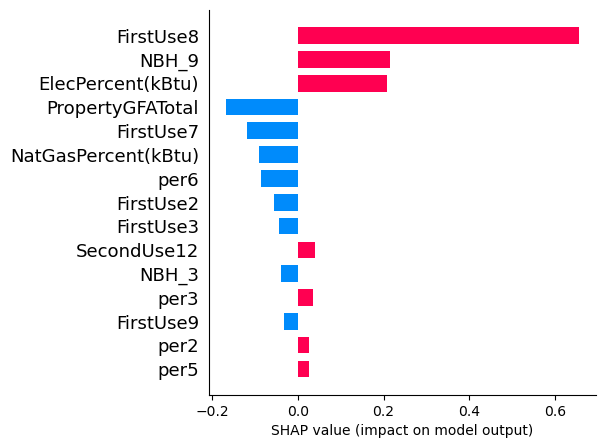

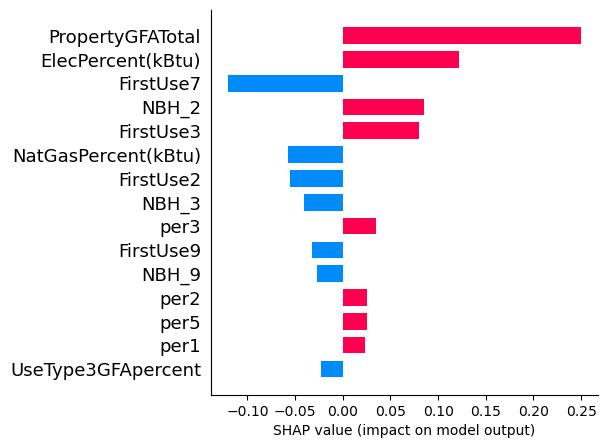

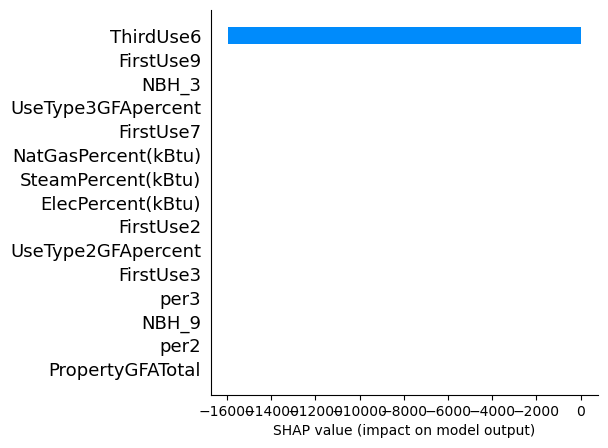

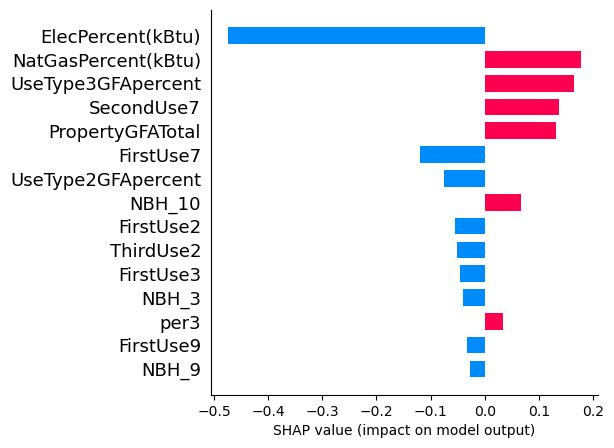

In [35]:
# gaphiquement :
feature_names = np.delete(DF.columns, 5)
import matplotlib.pyplot as plt
for i in range(4):
    plt.figure(figsize=(5,5))
    shap.bar_plot(lr_explainer1.shap_values(X_test[i+1].reshape(1,-1))[0], feature_names=feature_names, max_display=15)


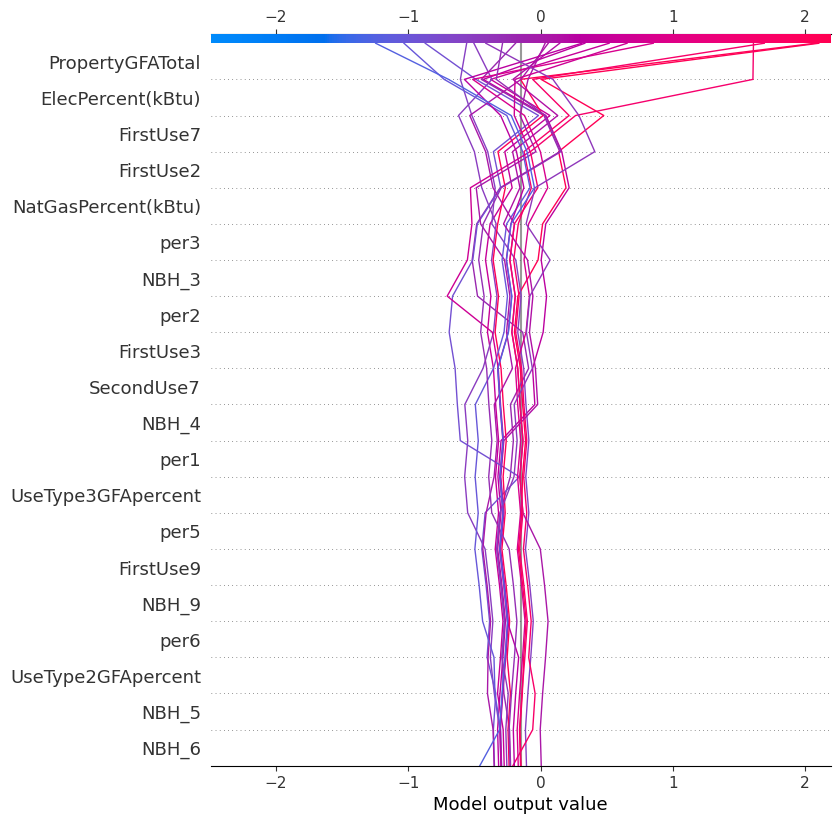

In [50]:
shap.decision_plot(lr_explainer1.expected_value, lr_explainer1.shap_values(X_test[5:25]),\
                   feature_names=list(feature_names))#, figsize=(4,5)) <- non accepté

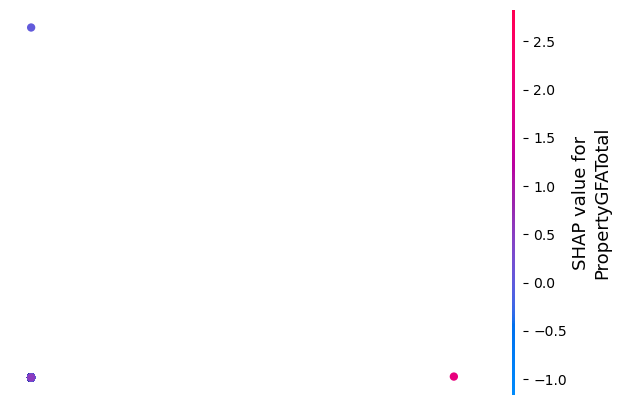

In [52]:
shap.embedding_plot("PropertyGFATotal", lr_explainer1.shap_values(X_test), feature_names=list(feature_names)) #, figsize=(3,3))

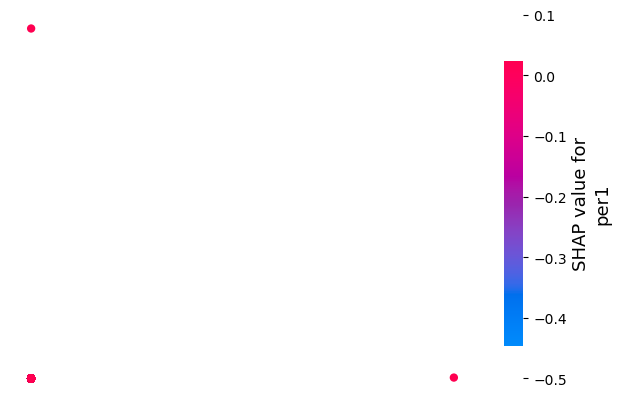

In [48]:
shap.embedding_plot("per1", lr_explainer1.shap_values(X_test), feature_names=list(feature_names))

In [57]:
shap.force_plot(lr_explainer1.expected_value,
                lr_explainer1.shap_values(X_test[5:15]),
                feature_names=list(feature_names),
                out_names="Energy use", figsize=(25,3),
                link="identity")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


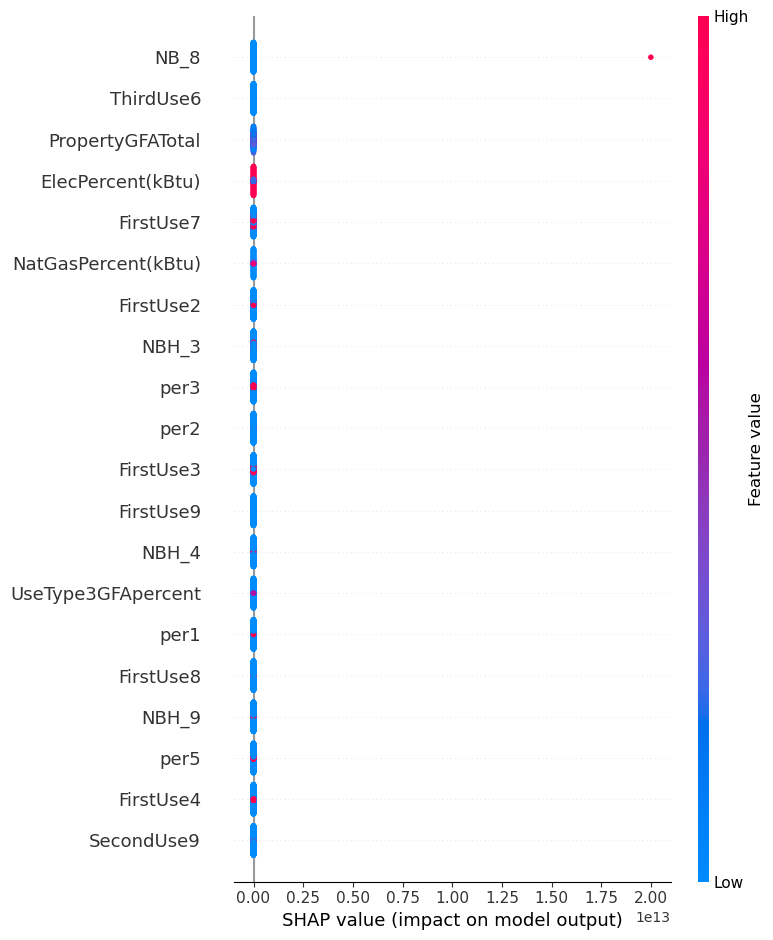

In [55]:
shap.summary_plot(lr_explainer1.shap_values(X_test), features = X_test, feature_names=list(feature_names))

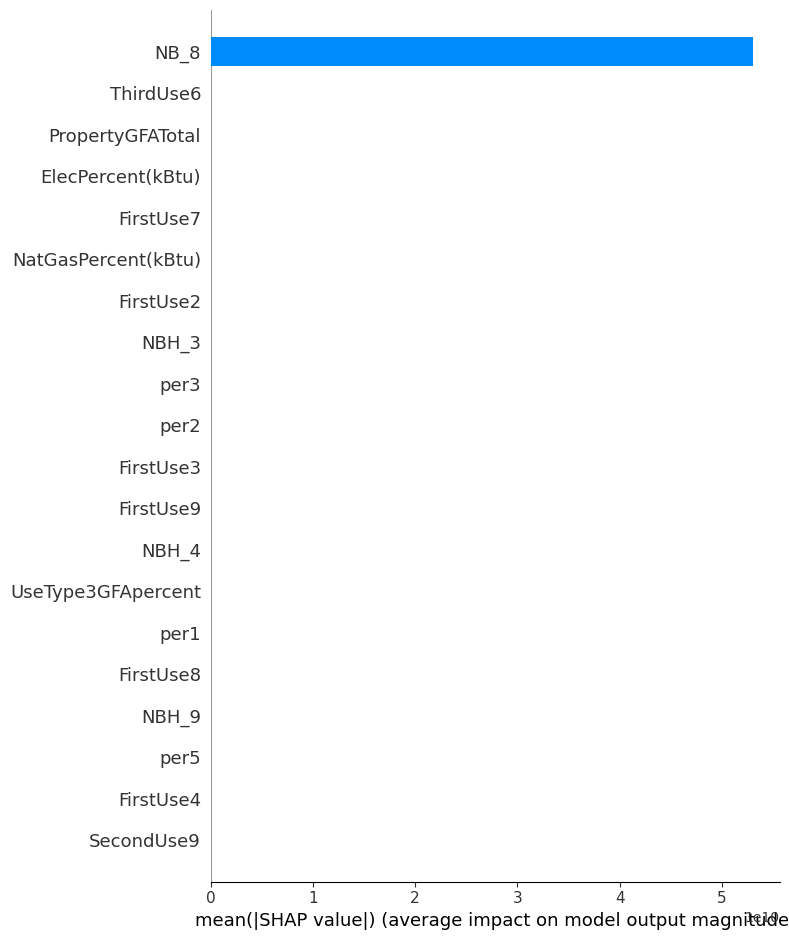

In [56]:
shap.summary_plot(lr_explainer1.shap_values(X_test), feature_names=list(feature_names), plot_type="bar")

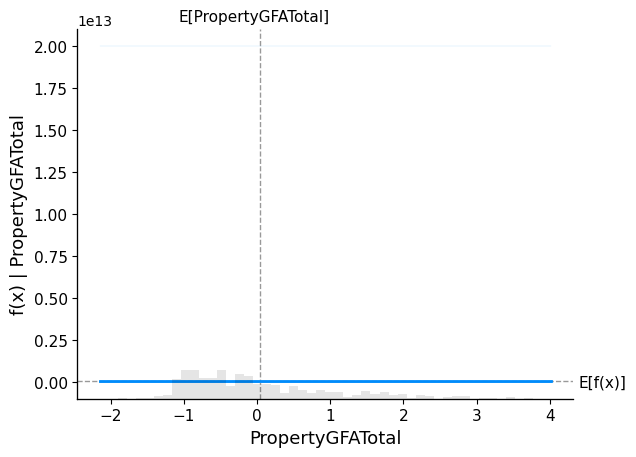

In [58]:
shap.partial_dependence_plot("PropertyGFATotal",
                             lr.predict,
                             data=X_test,
                             feature_names=list(feature_names),
                             model_expected_value=True,
                             feature_expected_value=True,
                             ice=True
                             )

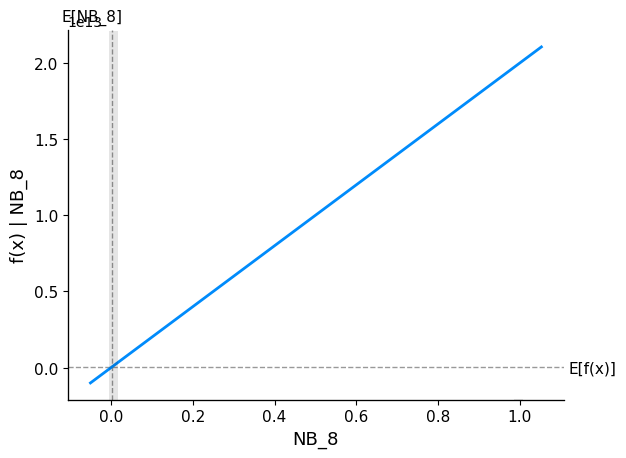

In [60]:
shap.partial_dependence_plot("NB_8",
                             lr.predict,
                             data=X_test,
                             feature_names=list(feature_names),
                             model_expected_value=True,
                             feature_expected_value=True)#,
                             #ice=True  <- ne change rien ici
                             #)

In [6]:
# après ce résultat mitigé, peut-être qu'on peut améliorer le modèle avec des régularisations ? Essayons une 'ElasticNet' :
from sklearn.linear_model import ElasticNet
alpha_range = np.logspace(-3, 2, 6)
l1_ratio_range = np.linspace(0,1,11)
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = 'r2'

grid = model_selection.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=1500, tol=1e-3, random_state=2,\
                                               selection='random'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.415e+02, tolerance: 9.125e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+02, tolerance: 9.124e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.017e+02, tolerance: 9.039e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.235e+02, tolerance: 9.125e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.01, 'l1_ratio': 0.0} with a score of 0.65


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e+02, tolerance: 1.132e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [7]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.057778      0.011720         0.000000         0.00000       0.001   
1        0.011587      0.002917         0.000000         0.00000       0.001   
2        0.009375      0.007654         0.000000         0.00000       0.001   
3        0.009375      0.007655         0.000000         0.00000       0.001   
4        0.009375      0.007654         0.000000         0.00000       0.001   
..            ...           ...              ...             ...         ...   
61       0.000000      0.000000         0.000000         0.00000       100.0   
62       0.000000      0.000000         0.000000         0.00000       100.0   
63       0.000000      0.000000         0.000000         0.00000       100.0   
64       0.000000      0.000000         0.003125         0.00625       100.0   
65       0.000000      0.000000         0.003125         0.00625       100.0   

   param_l1_ratio                                             params  \
0             0.0                  {'alpha': 0.001, 'l1_ratio': 0.0}   
1             0.1                  {'alpha': 0.001, 'l1_ratio': 0.1}   
2             0.2                  {'alpha': 0.001, 'l1_ratio': 0.2}   
3             0.3  {'alpha': 0.001, 'l1_ratio': 0.30000000000000004}   
4             0.4                  {'alpha': 0.001, 'l1_ratio': 0.4}   
..            ...                                                ...   
61            0.6   {'alpha': 100.0, 'l1_ratio': 0.6000000000000001}   
62            0.7   {'alpha': 100.0, 'l1_ratio': 0.7000000000000001}   
63            0.8                  {'alpha': 100.0, 'l1_ratio': 0.8}   
64            0.9                  {'alpha': 100.0, 'l1_ratio': 0.9}   
65            1.0                  {'alpha': 100.0, 'l1_ratio': 1.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.647505           0.651196       6.192050e-01   
1            0.647204           0.651260       6.192461e-01   
2            0.646836           0.651304       6.192326e-01   
3            0.646396           0.651227       6.192017e-01   
4            0.645870           0.651422       6.188444e-01   
..                ...                ...                ...   
61          -0.005322          -0.000054      -8.006626e-07   
62          -0.005322          -0.000054      -8.006626e-07   
63          -0.005322          -0.000054      -8.006626e-07   
64          -0.005322          -0.000054      -8.006626e-07   
65          -0.005322          -0.000054      -8.006626e-07   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.603462           0.682718         0.640817        0.027461   
1            0.605889           0.683059         0.641332        0.026901   
2            0.608222           0.683335         0.641786        0.026373   
3            0.610510           0.683511         0.642169        0.025841   
4            0.612733           0.683654         0.642505        0.025417   
..                ...                ...              ...             ...   
61          -0.000567          -0.000017        -0.001192        0.002076   
62          -0.000567          -0.000017        -0.001192        0.002076   
63          -0.000567          -0.000017        -0.001192        0.002076   
64          -0.000567          -0.000017        -0.001192        0.002076   
65          -0.000567          -0.000017        -0.001192        0.002076   

    rank_test_score  
0                15  
1                14  
2                13  
3                12  
4                11  
..              ...  
61               44  
62               44  
63               44  
64               44  
65               44  

[66 rows x 15 columns]

Je regarderai de nouveau les 'shap values' quand j'aurais trouvé le meilleur modèle parmis ceux que je vais tester, pour le moment cela n'apporte pas grand chose (en dehors d'un exercice d'étudiant). Voyons déjà le score obtenu avec les paramètres optimaux (qui correspondent en fait à une regression ridge) sur le jeu de test :

In [8]:
#lr_explainer2 = shap.LinearExplainer(lin_reg, X_train, feature_perturbation="correlation_dependent")
EN = ElasticNet(alpha=0.01, l1_ratio=0, tol=1e-3, random_state=2, selection='random')
EN.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN.score(X_train, y_train)))
EN.predict(X_test)
print('Score R² sur jeu de test: ', str(EN.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.6803934235871133
Score R² sur jeu de test:  0.6310276363630448


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+02, tolerance: 1.132e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [9]:
# selon avertissement ci-dessus, essai avec plus d'itérations :
EN2 = ElasticNet(alpha=0.01, l1_ratio=0, max_iter=2000, tol=1e-3, random_state=2, selection='random')
EN2.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN2.score(X_train, y_train)))
EN2.predict(X_test)
print('Score R² sur jeu de test: ', str(EN2.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.6803934235871134
Score R² sur jeu de test:  0.6310276363630446


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.910e+02, tolerance: 1.132e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [10]:
# cela n'a rien changé. Il serait peut être interessant par contre d'essayer d'autres valeurs pour alpha, proches de 0.01 :
alpha_range = [0.005, 0.007, 0.009, 0.011, 0.013, 0.015]
l1_ratio_range = [0]
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = 'r2'

grid = model_selection.GridSearchCV(ElasticNet(max_iter=1500, tol=1e-3, random_state=2, selection='random'),\
                                    param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+02, tolerance: 9.125e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+02, tolerance: 9.123e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.492e+02, tolerance: 9.122e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.490e+02, tolerance: 8.859e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.011, 'l1_ratio': 0} with a score of 0.65


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.583e+02, tolerance: 9.038e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+02, tolerance: 1.132e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

In [11]:
# est-ce que ce petit écart sur alpha va améliorer les prédictions ?
EN3 = ElasticNet(alpha=0.011, l1_ratio=0, max_iter=2000, tol=1e-3, random_state=2, selection='random')
EN3.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN3.score(X_train, y_train)))
EN3.predict(X_test)
print('Score R² sur jeu de test: ', str(EN3.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.6795489077976978
Score R² sur jeu de test:  0.6306610992755572


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.920e+02, tolerance: 1.132e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Non c'est même un tout petit peu moins bien. Toutefois la prédiction commence à être correcte. Est-ce qu'une regression ridge à noyau (gaussien) pourrait être plus performante ?

In [8]:
from sklearn import kernel_ridge
alpha_range = np.logspace(-3, 2, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = 'r2'
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.01} with a score of 0.64


In [9]:
# ce n'est pas mieux sur le jeu d'entrainement mais ça vaut le coup de voir sur le jeu de test :
KRR = kernel_ridge.KernelRidge(alpha=0.1, kernel='rbf', gamma=0.01)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7259522158367597
Score R² sur jeu de test:  0.6660100324948797


In [11]:
# On a mieux qu'attendu ! Affinons un peu les valeurs des hyper param. :
alpha_range = [0.05, 0.07, 0.09, 0.11, 0.13, 0.15]
gamma_range = [0.005, 0.007, 0.009, 0.011, 0.013, 0.015]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = 'r2'
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.09, 'gamma': 0.015} with a score of 0.64


In [12]:
# c'est le même score pour des valeurs un peu différentes, qu'on peut tâcher de confirmer :
KRR = kernel_ridge.KernelRidge(alpha=0.09, kernel='rbf', gamma=0.015)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7521749721033122
Score R² sur jeu de test:  0.67045126885364


In [13]:
# Affinons de nouveau sur gamma qui atteint la borne sup. de l'intervalle :
alpha_range = [0.09, 0.1, 0.11]
gamma_range = [0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = 'r2'
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.02} with a score of 0.64


In [14]:
KRR = kernel_ridge.KernelRidge(alpha=0.1, kernel='rbf', gamma=0.02)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7675179665212437
Score R² sur jeu de test:  0.671875016037315


In [15]:
# très bien, regardonc maintenant ce que donne une SVR à noyau (gaussien) :
from sklearn import svm
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'C': C_range, 'gamma': gamma_range}
score = 'r2'
grid = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'C': 10.0, 'gamma': 0.01} with a score of 0.65


In [16]:
# pas mal, essayons d'affiner :
C_range = [5, 7, 9, 11, 13, 15, 20]
gamma_range = [0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.02]
param_grid = {'C': C_range, 'gamma': gamma_range}
grid = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'C': 5, 'gamma': 0.015} with a score of 0.65


In [17]:
SVMR = svm.SVR(kernel='rbf', gamma=0.015, C=5)
SVMR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(SVMR.score(X_train, y_train)))
SVMR.predict(X_test)
print('Score R² sur jeu de test: ', str(SVMR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7281566591530482
Score R² sur jeu de test:  0.6560146279731527


In [19]:
# c'est pas mal, mais le KRR est meilleur. Essayons les modèles ensemblistes :
from sklearn.ensemble import RandomForestRegressor
nb_estimators = [10, 30, 50, 70, 90, 110]
max_features = [0.4, 0.5, 0.6, 0.7 ,0.8, 0.9]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probab

The optimal parameters are {'max_features': 0.5, 'n_estimators': 110} with a R² score of 0.66


In [20]:
# c'est bien, mais on peut peut-être avoir mieux ?
nb_estimators = [100, 110, 120, 130, 140, 150]
max_features = [0.45, 0.475, 0.5, 0.525 ,0.55]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'max_features': 0.5, 'n_estimators': 130} with a R² score of 0.66


In [21]:
RFR = RandomForestRegressor(n_estimators=130,max_features=0.5,oob_score=True)
RFR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(RFR.score(X_train, y_train)))
RFR.predict(X_test)
print('Score R² sur jeu de test: ', str(RFR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9548060526813928
Score R² sur jeu de test:  0.6625077240277875


Excellente performance sur le jeu d'entrainement, mais le KRR est légèrement meilleur sur le jeu de test. Difficile de trancher en fait. Mais nous allons peut-être avoir des résultats encore meilleurs avec un gradient boosting par exemple ?

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
learning_rate = [0.005, 0.01, 0.055, 0.1, 0.55, 1, 1.5, 2]
n_estimators = [10, 30, 50, 75, 100, 150, 200]
max_depth = [1, 2, 3, 5, 7, 9]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
score = 'r2'
grid = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'learning_rate': 0.055, 'max_depth': 5, 'n_estimators': 100} with a score of 0.66


In [23]:
# bon résultat, regardons un peu le détail :
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.016834      0.006310         0.000593        0.000485   
1         0.043835      0.004042         0.000235        0.000471   
2         0.072943      0.007384         0.000000        0.000000   
3         0.112210      0.003037         0.000592        0.000483   
4         0.149307      0.009093         0.000400        0.000490   
..             ...           ...              ...             ...   
331       0.655629      0.007109         0.000000        0.000000   
332       0.990430      0.021406         0.000400        0.000800   
333       1.317065      0.014129         0.000000        0.000000   
334       1.976035      0.026400         0.003124        0.006248   
335       2.640435      0.034536         0.003125        0.006250   

    param_learning_rate param_max_depth param_n_estimators  \
0                 0.005               1                 10   
1                 0.005               1                 30   
2                 0.005               1                 50   
3                 0.005               1                 75   
4                 0.005               1                100   
..                  ...             ...                ...   
331                   2               9                 50   
332                   2               9                 75   
333                   2               9                100   
334                   2               9                150   
335                   2               9                200   

                                                params  split0_test_score  \
0    {'learning_rate': 0.005, 'max_depth': 1, 'n_es...           0.031770   
1    {'learning_rate': 0.005, 'max_depth': 1, 'n_es...           0.092967   
2    {'learning_rate': 0.005, 'max_depth': 1, 'n_es...           0.142966   
3    {'learning_rate': 0.005, 'max_depth': 1, 'n_es...           0.196466   
4    {'learning_rate': 0.005, 'max_depth': 1, 'n_es...           0.244637   
..                                                 ...                ...   
331  {'learning_rate': 2, 'max_depth': 9, 'n_estima...         -11.843142   
332  {'learning_rate': 2, 'max_depth': 9, 'n_estima...         -13.272824   
333  {'learning_rate': 2, 'max_depth': 9, 'n_estima...         -14.640173   
334  {'learning_rate': 2, 'max_depth': 9, 'n_estima...         -17.672295   
335  {'learning_rate': 2, 'max_depth': 9, 'n_estima...         -34.018951   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.026196           0.034731           0.026413   
1             0.097432           0.104314           0.091982   
2             0.156621           0.160456           0.146893   
3             0.216488           0.217083           0.202822   
4             0.265188           0.264872           0.249855   
..                 ...                ...                ...   
331          -8.122497          -5.832566          -8.904128   
332         -21.742871          -5.458520          -6.790446   
333         -32.631782         -11.406679         -12.721033   
334        -158.415444          -8.182024         -17.459197   
335         -13.404324         -24.016059         -20.407220   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.038857         0.031593        0.004870              274  
1             0.108483         0.099036        0.006423              262  
2             0.166384         0.154664        0.008625              255  
3             0.224862         0.211544        0.010353              248  
4             0.276217         0.260154        0.011423              239  
..                 ...              ...             ...              ...  
331         -14.552639        -9.850994        3.036647              331  
332         -14.846770       -12.422286        5.893836              332  
333         -13.308845       -16.941702        7.913581       

In [24]:
# je ne vais pas affiner davantage car ces valeurs sont au milieu des intervalles choisis, et le temps de calcul fut de 20 mn
GBR = GradientBoostingRegressor(learning_rate=0.055, n_estimators=100, max_depth=5,tol=0.01)
GBR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(GBR.score(X_train, y_train)))
GBR.predict(X_test)
print('Score R² sur jeu de test: ', str(GBR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.8528036590567121
Score R² sur jeu de test:  0.6627253100186976


On a un score en test très similaire au KRR et à la Random Forest, toutefois le GBR est plus 'lourd', donc ce n'est pas le modèle que nous allons privilégier ! Un dernier essai avec un KNN :

In [26]:
from sklearn import neighbors
param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 9, 11, 13, 15]}
grid = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, scoring=('r2'))
grid.fit(X_train, y_train)
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: ", grid.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:  {'n_neighbors': 9}


In [27]:
# on peut affiner : (traitement rapide)
param_grid = {'n_neighbors':[8, 9, 10]}
grid = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, scoring=('r2'))
grid.fit(X_train, y_train)
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: ", grid.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:  {'n_neighbors': 9}


In [28]:
# 9 confirmé !
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.000601      0.000490         0.015257        0.001290   
1       0.000201      0.000401         0.012433        0.003891   
2       0.000000      0.000000         0.012500        0.006250   

  param_n_neighbors               params  split0_test_score  \
0                 8   {'n_neighbors': 8}           0.490683   
1                 9   {'n_neighbors': 9}           0.498352   
2                10  {'n_neighbors': 10}           0.491648   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.608349           0.546798           0.543638           0.426611   
1           0.598120           0.540608           0.542032           0.440062   
2           0.593018           0.534009           0.535667           0.449215   

   mean_test_score  std_test_score  rank_test_score  
0         0.523216        0.061011                2  
1         0.523835        0.052532                1  
2         0.520711        0.048136                3

Les scores sont moins bons qu'avec les autres modèles.
<br>En tout cas, certains d'entre eux nous donnent maintenant une prédiction assez réaliste, mais pour la cible standardisée.
<br>Pour retrouver la valeur prédite en kBtu, l'unité d'énergie principalement utilisée à Seattle, il faut faire l'opération inverse de la standardisation, qui consiste en un centrage et une réduction. Il faut donc multiplier la valeur prédite par l’écart-type initial, puis lui ajouter la moyenne originelle des cibles. Ces valeurs sont données par un 'describe' par exemple:

In [3]:
DF['SiteEnergyUse(kBtu)'].describe()

count    1507.000000
mean       14.839740
std         1.297616
min         9.729670
25%        14.003512
50%        14.690710
75%        15.681916
max        20.588504
Name: SiteEnergyUse(kBtu), dtype: float64

Ef fait nous avions transformé ces étiquettes logarithmiquement, il faudra donc ensuite appliquer la fonction réciproque à la valeur obtenue. Traitons un exemple, imaginons que la valeur prédite de la dépense énergétique soit 0.47258692  La valeur après 'déstandardisation' est alors :

In [7]:
(0.4725869 * 1.297616) + 14.839740

15.4529763228304

In [8]:
# la dépense énergétique prédite en kBtu sera alors :
import math
math.exp(15.4529763228304)

5142121.640706088

<a name='E5'>

Dans cette nouvelle étape, **nous allons introduire l'ENERGYSTARScore dans les données de modélisation** afin d'observer son impact sur la qualité des prédictions. Pour le reste nous allons utiliser le même dataframe que dans l'étape précedente.

In [1]:
import pandas as pd
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
data = data.drop('Unnamed: 0', axis=1)

In [2]:
data['ENERGYSTARScore'].describe()

count    965.000000
mean      66.091192
std       28.398687
min        1.000000
25%       50.000000
50%       75.000000
75%       89.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

Comme nous l'avions vu lors de l'analyse exploratoire initiale, une grande part des propriétés n'a pas d'ENERGY STAR Score (maintenant un gros tiers) et quand il est donné il n'est pas toujours sérieux, en particulier quand il vaut 100 ou des valeurs très basses. Pour compléter et corriger nos données, il serait interessant de trouver une certaine corrélation de ce score avec d'autres caractéristiques, on pense bien sûr à l'intensité de la consommation énergétique par exemple. Vérifions cette hypothèse :

In [15]:
# on associe une valeur bien reconnaissable (et quasi nulle) aux 'NaN' :
data['ENERGYSTARScore'].fillna(0.12345, inplace=True)

Text(0, 0.5, 'Score ENERGYSTAR')

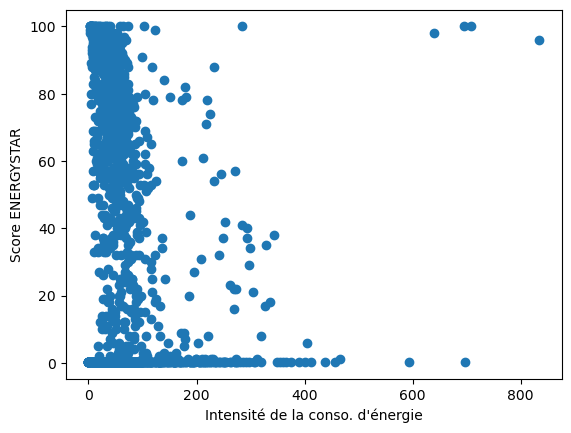

In [17]:
import matplotlib.pyplot as plt
plt.plot(data['SiteEUI(kBtu/sf)'], data['ENERGYSTARScore'], 'o')
plt.xlabel("Intensité de la conso. d'énergie")
plt.ylabel("Score ENERGYSTAR")

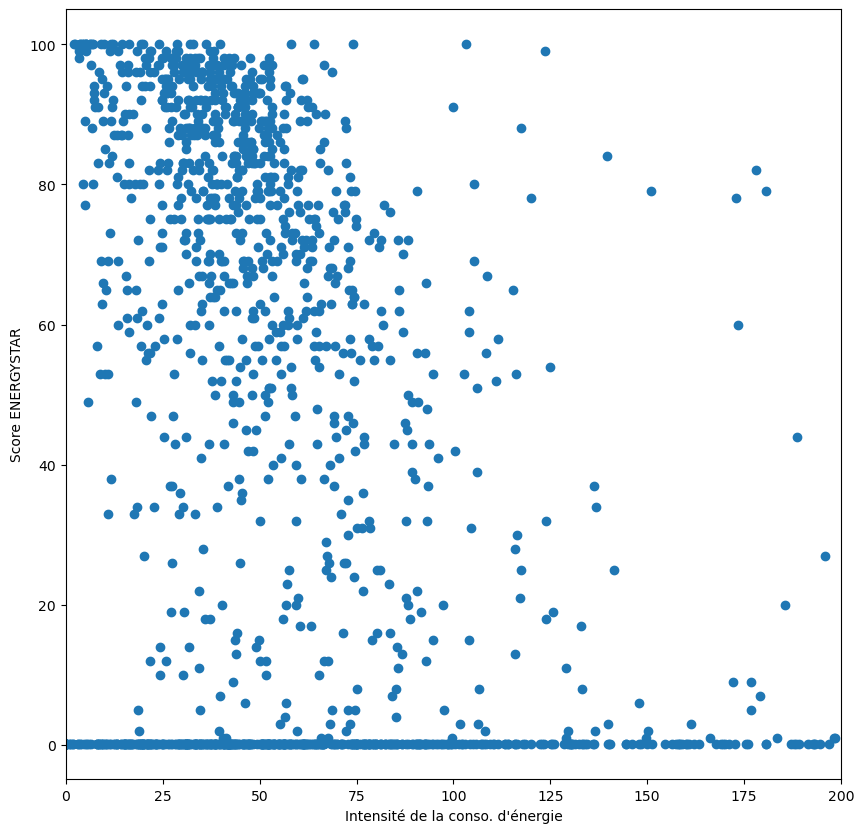

In [23]:
# il semble qu'on ait quelque chose d'interessant, voyons cela un peu mieux :
fig, axes = plt.subplots(figsize=(10,10))
axes.plot(data['SiteEUI(kBtu/sf)'], data['ENERGYSTARScore'], 'o')
axes.set_xlim(0, 200)
plt.xlabel("Intensité de la conso. d'énergie")
plt.ylabel("Score ENERGYSTAR")
plt.show()

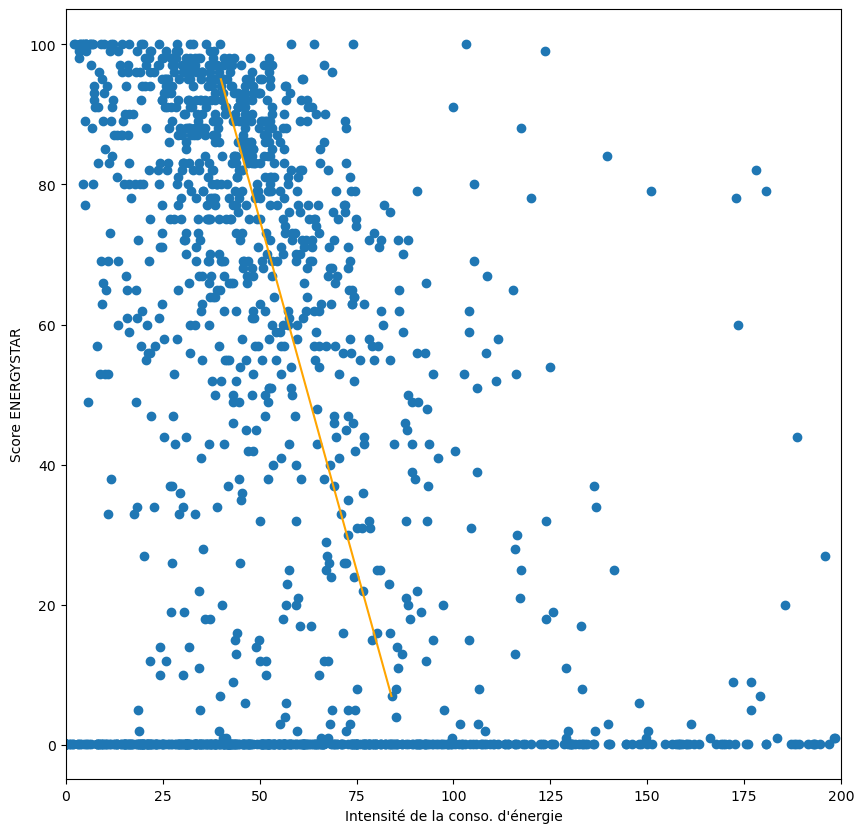

In [32]:
# si on ignore les scores à 100, et ceux très bas (deux extrèmes largement érronées) on pourrait avoir
# une loi grossièrement linéaire :
import numpy as np
fig, axes = plt.subplots(figsize=(10,10))
axes.plot(data['SiteEUI(kBtu/sf)'], data['ENERGYSTARScore'], 'o')
axes.plot(np.arange(40,85), [175-2*x for x in np.arange(40,85)], c='orange' )
axes.set_xlim(0, 200)
plt.xlabel("Intensité de la conso. d'énergie")
plt.ylabel("Score ENERGYSTAR")
plt.show()

In [36]:
# ce n'est pas la meilleure représentation, mais cela va nous suffire pour notre besoin d'imputation
data.loc[data['ENERGYSTARScore'] == 0.123450, 'ENERGYSTARScore'] = 175-2*data.loc[data['ENERGYSTARScore'] == 0.123450, \
                                                                                  'SiteEUI(kBtu/sf)']

In [37]:
# on va laisser à 100 ceux qui ont un score de 100, mais passer à 0 ceux qui ont un score < 0
data.loc[data['ENERGYSTARScore'] < 0, 'ENERGYSTARScore'] = 0

In [38]:
data['ENERGYSTARScore'].describe()

count    1507.000000
mean       64.558726
std        41.195721
min         0.000000
25%        32.000000
50%        71.000000
75%        92.000000
max       175.000000
Name: ENERGYSTARScore, dtype: float64

In [39]:
data.loc[data['ENERGYSTARScore'] > 100, 'OSEBuildingID']

8          31
10         37
12         41
20         55
22         58
        ...  
1470    49925
1479    49998
1480    50002
1484    50038
1494    50196
Name: OSEBuildingID, Length: 160, dtype: int64

In [40]:
# on va mettre ces valeurs à 100 :
data.loc[data['ENERGYSTARScore'] > 100, 'ENERGYSTARScore'] = 100

In [44]:
# ce score représente plus des catégories que des grandeurs physiques, nous allons donc le coder avec le 'TargetEncoder' :
data['ENERGYSTARScore'] = data['ENERGYSTARScore'].round(0)

In [48]:
from sklearn.preprocessing import TargetEncoder
TGenco = TargetEncoder()
tmp = pd.DataFrame(data['ENERGYSTARScore'])
tgt = data['SiteEnergyUse(kBtu)']
STARScore = TGenco.fit_transform(tmp, tgt)

In [45]:
DF = pd.read_csv('DFmodel5.csv')
DF = DF.drop('Unnamed: 0', axis=1)
DF['ESTARScore'] = STARScore

In [52]:
DF.to_csv('DFmodel6.csv')

In [2]:
# nous pouvons maintenant commencer le processus de modélisation, i.e. déjà standardiser les données non binaires :
from sklearn.preprocessing import StandardScaler
DFnum = DF[['NumberofFloors', 'PropertyGFATotal', 'PropGFABuildingPercent', 'UseType2GFApercent', 'UseType3GFApercent', \
            'SiteEnergyUse(kBtu)', 'SteamPercent(kBtu)', 'ElecPercent(kBtu)', 'NatGasPercent(kBtu)', 'ESTARScore']]
st_scaler = StandardScaler().fit(DFnum)
DFstd = st_scaler.transform(DFnum)

In [5]:
# et on complete notre DF avec les données binaires :
DFcat = DF[DF.columns[9:76]].values 
import numpy as np
DFstd = np.concatenate((DFstd ,DFcat), axis=1)

In [59]:
DFstd[0,:]

array([-0.47658103,  0.41749277, -2.34509778, -0.76881683, -0.37579613,
        1.13157964, -0.21082812, -0.37728142,  0.46125989,  1.57460994,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

Je vais cette fois exploiter divers métriques pour être en mesure de départager les modèles en cas de résultats similaires. Nous allons les tester dans le même ordre que lors de l'étape précédente :

In [7]:
from sklearn import model_selection   # la colonne 'étiquette' est la sixième du tableau (donc n°5)
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.delete(DFstd, 5, axis=1),\
                                                                    DFstd[:,5], test_size=0.25)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7525713975948127

In [7]:
# c'est mieux que sans l'E.STARScore ! Voyons le score sur le jeu de test :
lr.score(X_test, y_test)

0.6603553694251703

C'est pas mal, nous n'avons pas cette fois une énorme contradiction par rapport au résultat sur le jeu d'entrainement (ici le 'R²'). Mais comme précédemment, j'éspère obtenir mieux avec des modèles plus complexes.

In [8]:
from sklearn.linear_model import ElasticNet
alpha_range = np.logspace(-3, 2, 6)
l1_ratio_range = np.linspace(0,1,11)
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = 'r2'

grid = model_selection.GridSearchCV(ElasticNet(fit_intercept=False, max_iter=1500, tol=1e-3, random_state=2,\
                                               selection='random'), param_grid, cv=5, scoring=score)
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+02, tolerance: 9.311e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.140e+02, tolerance: 9.218e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.837e+02, tolerance: 9.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+02, tolerance: 9.253e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

The optimal parameters are {'alpha': 0.001, 'l1_ratio': 0.9} with a score of 0.72


C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.562e+02, tolerance: 9.215e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [9]:
# de nouveau c'est mieux que sans l'E.STARScore, voyons sur le jeu de test :
EN = ElasticNet(alpha=0.001, l1_ratio=0.9, tol=1e-3, random_state=2, selection='random')
EN.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN.score(X_train, y_train)))
EN.predict(X_test)
print('Score R² sur jeu de test: ', str(EN.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7476381388983775
Score R² sur jeu de test:  0.6635851598893909


In [10]:
EN1 = ElasticNet(alpha=0.01, l1_ratio=0.1, tol=1e-3, random_state=2, selection='random')
EN1.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(EN1.score(X_train, y_train)))
EN1.predict(X_test)
print('Score R² sur jeu de test: ', str(EN1.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7409786389196542
Score R² sur jeu de test:  0.6626371430865824


Ce deuxième test avec EN1 et des param. assez différents des optimums trouvés donne les mêmes résultats. Avec un premier split un peu différent (répartition aléatoire) et les param. de EN1 j'avais un score R² sur jeu de test de 0.72. Ce modèle est donc bien stable dans ses résultats, voyons cela plus en détail :

In [11]:
# on a 6 x 11 = 66 résultats dans la grille
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[0:22,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.050697      0.008376         0.000202        0.000404       0.001   
1        0.012211      0.010861         0.000400        0.000490       0.001   
2        0.009057      0.011602         0.000000        0.000000       0.001   
3        0.009375      0.007654         0.003125        0.006250       0.001   
4        0.006250      0.007655         0.000000        0.000000       0.001   
5        0.009375      0.007655         0.000000        0.000000       0.001   
6        0.006250      0.007655         0.000000        0.000000       0.001   
7        0.006256      0.007661         0.000000        0.000000       0.001   
8        0.006250      0.007655         0.000000        0.000000       0.001   
9        0.003126      0.006252         0.000000        0.000000       0.001   
10       0.003119      0.006239         0.000000        0.000000       0.001   
11       0.040625      0.007654         0.000000        0.000000        0.01   
12       0.003125      0.006250         0.000000        0.000000        0.01   
13       0.000000      0.000000         0.000000        0.000000        0.01   
14       0.000000      0.000000         0.003125        0.006250        0.01   
15       0.000000      0.000000         0.003125        0.006250        0.01   
16       0.001612      0.000487         0.000599        0.000489        0.01   
17       0.000606      0.000495         0.000400        0.000490        0.01   
18       0.000120      0.000239         0.000200        0.000401        0.01   
19       0.001199      0.000401         0.000400        0.000490        0.01   
20       0.001217      0.000392         0.000600        0.000490        0.01   
21       0.001200      0.000400         0.000400        0.000490        0.01   

   param_l1_ratio                                             params  \
0             0.0                  {'alpha': 0.001, 'l1_ratio': 0.0}   
1             0.1                  {'alpha': 0.001, 'l1_ratio': 0.1}   
2             0.2                  {'alpha': 0.001, 'l1_ratio': 0.2}   
3             0.3  {'alpha': 0.001, 'l1_ratio': 0.30000000000000004}   
4             0.4                  {'alpha': 0.001, 'l1_ratio': 0.4}   
5             0.5                  {'alpha': 0.001, 'l1_ratio': 0.5}   
6             0.6   {'alpha': 0.001, 'l1_ratio': 0.6000000000000001}   
7             0.7   {'alpha': 0.001, 'l1_ratio': 0.7000000000000001}   
8             0.8                  {'alpha': 0.001, 'l1_ratio': 0.8}   
9             0.9                  {'alpha': 0.001, 'l1_ratio': 0.9}   
10            1.0                  {'alpha': 0.001, 'l1_ratio': 1.0}   
11            0.0                   {'alpha': 0.01, 'l1_ratio': 0.0}   
12            0.1                   {'alpha': 0.01, 'l1_ratio': 0.1}   
13            0.2                   {'alpha': 0.01, 'l1_ratio': 0.2}   
14            0.3   {'alpha': 0.01, 'l1_ratio': 0.30000000000000004}   
15            0.4                   {'alpha': 0.01, 'l1_ratio': 0.4}   
16            0.5                   {'alpha': 0.01, 'l1_ratio': 0.5}   
17            0.6    {'alpha': 0.01, 'l1_ratio': 0.6000000000000001}   
18            0.7    {'alpha': 0.01, 'l1_ratio': 0.7000000000000001}   
19            0.8                   {'alpha': 0.01, 'l1_ratio': 0.8}   
20            0.9                   {'alpha': 0.01, 'l1_ratio': 0.9}   
21            1.0                   {'alpha': 0.01, 'l1_ratio': 1.0}   

    split0_test_score  split1_test_score  split2_test_score  \
0            0.723438           0.705495           0.707978   
1            0.724284           0.706733           0.707677   
2            0.725083           0.708042           0.707262   
3            0.725826           0.709298           0.706782   
4            0.726415           0.710520           0.706528   
5            0.727063           0.711454           0.706496   
6            0.727771           0.712231           0.706217   
7 

In [12]:
grid_results.iloc[22:44,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
22       0.050758      0.009061         0.000000    0.000000e+00         0.1   
23       0.002240      0.001547         0.000600    4.897075e-04         0.1   
24       0.000837      0.000425         0.000200    3.997803e-04         0.1   
25       0.002344      0.004687         0.000201    4.010201e-04         0.1   
26       0.001199      0.000400         0.000400    4.901544e-04         0.1   
27       0.001000      0.000001         0.001001    9.818678e-07         0.1   
28       0.001400      0.000490         0.000400    4.900377e-04         0.1   
29       0.000207      0.000414         0.000000    0.000000e+00         0.1   
30       0.003126      0.006252         0.000000    0.000000e+00         0.1   
31       0.000000      0.000000         0.000000    0.000000e+00         0.1   
32       0.003125      0.006250         0.000000    0.000000e+00         0.1   
33       0.046078      0.005318         0.000000    0.000000e+00         1.0   
34       0.003127      0.006253         0.000000    0.000000e+00         1.0   
35       0.000000      0.000000         0.000000    0.000000e+00         1.0   
36       0.003118      0.006235         0.000000    0.000000e+00         1.0   
37       0.000000      0.000000         0.000000    0.000000e+00         1.0   
38       0.003125      0.006250         0.000000    0.000000e+00         1.0   
39       0.000000      0.000000         0.000000    0.000000e+00         1.0   
40       0.000000      0.000000         0.003125    6.249905e-03         1.0   
41       0.000000      0.000000         0.000000    0.000000e+00         1.0   
42       0.003125      0.006250         0.000000    0.000000e+00         1.0   
43       0.000000      0.000000         0.000000    0.000000e+00         1.0   

   param_l1_ratio                                           params  \
22            0.0                  {'alpha': 0.1, 'l1_ratio': 0.0}   
23            0.1                  {'alpha': 0.1, 'l1_ratio': 0.1}   
24            0.2                  {'alpha': 0.1, 'l1_ratio': 0.2}   
25            0.3  {'alpha': 0.1, 'l1_ratio': 0.30000000000000004}   
26            0.4                  {'alpha': 0.1, 'l1_ratio': 0.4}   
27            0.5                  {'alpha': 0.1, 'l1_ratio': 0.5}   
28            0.6   {'alpha': 0.1, 'l1_ratio': 0.6000000000000001}   
29            0.7   {'alpha': 0.1, 'l1_ratio': 0.7000000000000001}   
30            0.8                  {'alpha': 0.1, 'l1_ratio': 0.8}   
31            0.9                  {'alpha': 0.1, 'l1_ratio': 0.9}   
32            1.0                  {'alpha': 0.1, 'l1_ratio': 1.0}   
33            0.0                  {'alpha': 1.0, 'l1_ratio': 0.0}   
34            0.1                  {'alpha': 1.0, 'l1_ratio': 0.1}   
35            0.2                  {'alpha': 1.0, 'l1_ratio': 0.2}   
36            0.3  {'alpha': 1.0, 'l1_ratio': 0.30000000000000004}   
37            0.4                  {'alpha': 1.0, 'l1_ratio': 0.4}   
38            0.5                  {'alpha': 1.0, 'l1_ratio': 0.5}   
39            0.6   {'alpha': 1.0, 'l1_ratio': 0.6000000000000001}   
40            0.7   {'alpha': 1.0, 'l1_ratio': 0.7000000000000001}   
41            0.8                  {'alpha': 1.0, 'l1_ratio': 0.8}   
42            0.9                  {'alpha': 1.0, 'l1_ratio': 0.9}   
43            1.0                  {'alpha': 1.0, 'l1_ratio': 1.0}   

    split0_test_score  split1_test_score  split2_test_score  \
22           0.683933           0.709955           0.690219   
23           0.683305           0.707016           0.674872   
24           0.688147           0.701636           0.664669   
25           0.692321           0.695099           0.657943   
26           0.694184           0.687160           0.651037   
27           0.691281           0.678323           0.644040   
28           0.683328           0.668763           0.636109   
29           0.678623           0.659895        

Nous pouvons en conclure que l1_ratio joue un rôle mineur en regard de alpha, et que ce dernier doit être assez petit, assurément sous 0.15 pour donner un modèle relativement performant. Quelques autres indicateurs (que j'integrerai à la 'grid' par la suite) :

In [13]:
from sklearn import metrics
print("RMSE train EN: ", str(np.sqrt(metrics.mean_squared_error(y_train, EN.predict(X_train)))))
print("RMSE train EN1: ", str(np.sqrt(metrics.mean_squared_error(y_train, EN1.predict(X_train)))))
print("RMSE test EN: ", str(np.sqrt(metrics.mean_squared_error(y_test, EN.predict(X_test)))))
print("RMSE test EN1: ", str(np.sqrt(metrics.mean_squared_error(y_test, EN1.predict(X_test)))))

RMSE train EN:  0.5084556944855829
RMSE train EN1:  0.5151207511820233
RMSE test EN:  0.5577323549279507
RMSE test EN1:  0.5585176467876967


In [14]:
print("MAE train EN: ", str(metrics.mean_absolute_error(y_train, EN.predict(X_train))))
print("MAE train EN1: ", str(metrics.mean_absolute_error(y_train, EN1.predict(X_train))))
print("MAE test EN: ", str(metrics.mean_absolute_error(y_test, EN.predict(X_test))))
print("MAE test EN1: ", str(metrics.mean_absolute_error(y_test, EN1.predict(X_test))))

MAE train EN:  0.38073167891333703
MAE train EN1:  0.38484213344480256
MAE test EN:  0.40697355651017375
MAE test EN1:  0.406927344946214


Il est donc bien clair que les 'optimal parameters' ne sont pas fermement déterminés, du fait d'une dépendance nette à la constitution des splits (dont la démonstration n'est pas présentée ici), avec des écarts de résultats très minimes. Ce qu'il faut retenir alors est que l'ElasticNet est interessant avec un rapport de corrélation supérieur à 0.72 dès lors que les paramétres sont convenablement choisis, avec toutefois une certaine élasticité (d'ou le nom du modèle peut-être ?)

In [15]:
# on peut essayer d'autres valeurs des paramètres, proches de celles données par le premier 'ratissage' pour affiner :
alpha_range = [0.0005, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0015]
l1_ratio_range = [0.85, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.95 ]
param_grid = {'alpha': alpha_range, 'l1_ratio': l1_ratio_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}

grid = model_selection.GridSearchCV(ElasticNet(max_iter=1500, tol=1e-3, random_state=2, selection='random'),\
                                    param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.001, 'l1_ratio': 0.95} with a score of 0.72


In [17]:
# on a 81 résultats
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[0:20,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008995      0.006503         0.000407        0.000499      0.0005   
1        0.007298      0.005221         0.000401        0.000491      0.0005   
2        0.006245      0.007648         0.000000        0.000000      0.0005   
3        0.009375      0.007655         0.000000        0.000000      0.0005   
4        0.006250      0.007655         0.000000        0.000000      0.0005   
5        0.009375      0.007655         0.000000        0.000000      0.0005   
6        0.009375      0.007654         0.000000        0.000000      0.0005   
7        0.006250      0.007655         0.000000        0.000000      0.0005   
8        0.003125      0.006250         0.003125        0.006250      0.0005   
9        0.003131      0.006261         0.003125        0.006250      0.0007   
10       0.006250      0.007655         0.000000        0.000000      0.0007   
11       0.006250      0.007654         0.000000        0.000000      0.0007   
12       0.003120      0.006240         0.006255        0.007661      0.0007   
13       0.006245      0.007648         0.000000        0.000000      0.0007   
14       0.003125      0.006250         0.003125        0.006250      0.0007   
15       0.009375      0.007655         0.000000        0.000000      0.0007   
16       0.003117      0.006234         0.003133        0.006266      0.0007   
17       0.006250      0.007655         0.000000        0.000000      0.0007   
18       0.006250      0.007655         0.000000        0.000000      0.0008   
19       0.006251      0.007656         0.000000        0.000000      0.0008   

   param_l1_ratio                               params  split0_test_R²  \
0            0.85  {'alpha': 0.0005, 'l1_ratio': 0.85}        0.725898   
1            0.87  {'alpha': 0.0005, 'l1_ratio': 0.87}        0.725971   
2            0.88  {'alpha': 0.0005, 'l1_ratio': 0.88}        0.726011   
3            0.89  {'alpha': 0.0005, 'l1_ratio': 0.89}        0.726063   
4             0.9   {'alpha': 0.0005, 'l1_ratio': 0.9}        0.726114   
5            0.91  {'alpha': 0.0005, 'l1_ratio': 0.91}        0.726166   
6            0.92  {'alpha': 0.0005, 'l1_ratio': 0.92}        0.726217   
7            0.93  {'alpha': 0.0005, 'l1_ratio': 0.93}        0.726269   
8            0.95  {'alpha': 0.0005, 'l1_ratio': 0.95}        0.726362   
9            0.85  {'alpha': 0.0007, 'l1_ratio': 0.85}        0.727842   
10           0.87  {'alpha': 0.0007, 'l1_ratio': 0.87}        0.727952   
11           0.88  {'alpha': 0.0007, 'l1_ratio': 0.88}        0.728004   
12           0.89  {'alpha': 0.0007, 'l1_ratio': 0.89}        0.728051   
13            0.9   {'alpha': 0.0007, 'l1_ratio': 0.9}        0.728102   
14           0.91  {'alpha': 0.0007, 'l1_ratio': 0.91}        0.728154   
15           0.92  {'alpha': 0.0007, 'l1_ratio': 0.92}        0.728208   
16           0.93  {'alpha': 0.0007, 'l1_ratio': 0.93}        0.728265   
17           0.95  {'alpha': 0.0007, 'l1_ratio': 0.95}        0.728378   
18           0.85  {'alpha': 0.0008, 'l1_ratio': 0.85}        0.728647   
19           0.87  {'alpha': 0.0008, 'l1_ratio': 0.87}        0.728769   

    split1_test_R²  split2_test_R²  ...  std_test_MAE  rank_test_MAE  \
0         0.710847        0.706953  ...      0.001640             81   
1         0.710964        0.706945  ...      0.001628             80   
2         0.711020        0.706940  ...      0.001622             79   
3         0.711077        0.706934  ...      0.001616             78   
4         0.711138        0.706928  ...      0.001611             77   
5         0.711201        0.706922  ...      0.001604             76   
6         0.711264        0.706913  ...      0.001598             75   
7         0.711327        0.706905  ...      0.001592             74   
8         0.711450        0.706891  ...      0.001582             73   
9         0.713099        0.706526  ...      0.0

In [18]:
grid_results.iloc[0:20,4:24]

param_alpha param_l1_ratio                               params  \
0       0.0005           0.85  {'alpha': 0.0005, 'l1_ratio': 0.85}   
1       0.0005           0.87  {'alpha': 0.0005, 'l1_ratio': 0.87}   
2       0.0005           0.88  {'alpha': 0.0005, 'l1_ratio': 0.88}   
3       0.0005           0.89  {'alpha': 0.0005, 'l1_ratio': 0.89}   
4       0.0005            0.9   {'alpha': 0.0005, 'l1_ratio': 0.9}   
5       0.0005           0.91  {'alpha': 0.0005, 'l1_ratio': 0.91}   
6       0.0005           0.92  {'alpha': 0.0005, 'l1_ratio': 0.92}   
7       0.0005           0.93  {'alpha': 0.0005, 'l1_ratio': 0.93}   
8       0.0005           0.95  {'alpha': 0.0005, 'l1_ratio': 0.95}   
9       0.0007           0.85  {'alpha': 0.0007, 'l1_ratio': 0.85}   
10      0.0007           0.87  {'alpha': 0.0007, 'l1_ratio': 0.87}   
11      0.0007           0.88  {'alpha': 0.0007, 'l1_ratio': 0.88}   
12      0.0007           0.89  {'alpha': 0.0007, 'l1_ratio': 0.89}   
13      0.0007            0.9   {'alpha': 0.0007, 'l1_ratio': 0.9}   
14      0.0007           0.91  {'alpha': 0.0007, 'l1_ratio': 0.91}   
15      0.0007           0.92  {'alpha': 0.0007, 'l1_ratio': 0.92}   
16      0.0007           0.93  {'alpha': 0.0007, 'l1_ratio': 0.93}   
17      0.0007           0.95  {'alpha': 0.0007, 'l1_ratio': 0.95}   
18      0.0008           0.85  {'alpha': 0.0008, 'l1_ratio': 0.85}   
19      0.0008           0.87  {'alpha': 0.0008, 'l1_ratio': 0.87}   

    split0_test_R²  split1_test_R²  split2_test_R²  split3_test_R²  \
0         0.725898        0.710847        0.706953        0.723141   
1         0.725971        0.710964        0.706945        0.723178   
2         0.726011        0.711020        0.706940        0.723198   
3         0.726063        0.711077        0.706934        0.723216   
4         0.726114        0.711138        0.706928        0.723239   
5         0.726166        0.711201        0.706922        0.723256   
6         0.726217        0.711264        0.706913        0.723272   
7         0.726269        0.711327        0.706905        0.723289   
8         0.726362        0.711450        0.706891        0.723326   
9         0.727842        0.713099        0.706526        0.723608   
10        0.727952        0.713209        0.706469        0.723645   
11        0.728004        0.713278        0.706439        0.723657   
12        0.728051        0.713347        0.706411        0.723674   
13        0.728102        0.713406        0.706378        0.723699   
14        0.728154        0.713460        0.706316        0.723710   
15        0.728208        0.713507        0.706289        0.723726   
16        0.728265        0.713554        0.706266        0.723747   
17        0.728378        0.713646        0.706200        0.723780   
18        0.728647        0.713898        0.706194        0.723581   
19        0.728769        0.714002        0.706140        0.723611   

    split4_test_R²  mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  \
0         0.726353      0.718638     0.008121            81        -0.402960   
1         0.726392      0.718690     0.008125            80        -0.402832   
2         0.726412      0.718716     0.008130            79        -0.402767   
3         0.726432      0.718744     0.008136            78        -0.402706   
4         0.726452      0.718774     0.008141            77        -0.402640   
5         0.726471      0.718803     0.008146            76        -0.402575   
6         0.726491      0.718832     0.008152            75        -0.402509   
7         0.726511      0.718860     0.008157            74        -0.402443   
8         0.726549      0.718916     0.008167            73        -0.402316   
9         0.726571      0.719529     0.008316            63        -0.400292   
10        0.726597      0.719574     0.008347            62        -0.400154   
11        0.726609      0.719597     0.008359            61        -0.400085   
12        0.726588   

In [19]:
grid_results.iloc[60:81,4:24]

param_alpha param_l1_ratio                               params  \
60      0.0012           0.92  {'alpha': 0.0012, 'l1_ratio': 0.92}   
61      0.0012           0.93  {'alpha': 0.0012, 'l1_ratio': 0.93}   
62      0.0012           0.95  {'alpha': 0.0012, 'l1_ratio': 0.95}   
63      0.0013           0.85  {'alpha': 0.0013, 'l1_ratio': 0.85}   
64      0.0013           0.87  {'alpha': 0.0013, 'l1_ratio': 0.87}   
65      0.0013           0.88  {'alpha': 0.0013, 'l1_ratio': 0.88}   
66      0.0013           0.89  {'alpha': 0.0013, 'l1_ratio': 0.89}   
67      0.0013            0.9   {'alpha': 0.0013, 'l1_ratio': 0.9}   
68      0.0013           0.91  {'alpha': 0.0013, 'l1_ratio': 0.91}   
69      0.0013           0.92  {'alpha': 0.0013, 'l1_ratio': 0.92}   
70      0.0013           0.93  {'alpha': 0.0013, 'l1_ratio': 0.93}   
71      0.0013           0.95  {'alpha': 0.0013, 'l1_ratio': 0.95}   
72      0.0015           0.85  {'alpha': 0.0015, 'l1_ratio': 0.85}   
73      0.0015           0.87  {'alpha': 0.0015, 'l1_ratio': 0.87}   
74      0.0015           0.88  {'alpha': 0.0015, 'l1_ratio': 0.88}   
75      0.0015           0.89  {'alpha': 0.0015, 'l1_ratio': 0.89}   
76      0.0015            0.9   {'alpha': 0.0015, 'l1_ratio': 0.9}   
77      0.0015           0.91  {'alpha': 0.0015, 'l1_ratio': 0.91}   
78      0.0015           0.92  {'alpha': 0.0015, 'l1_ratio': 0.92}   
79      0.0015           0.93  {'alpha': 0.0015, 'l1_ratio': 0.93}   
80      0.0015           0.95  {'alpha': 0.0015, 'l1_ratio': 0.95}   

    split0_test_R²  split1_test_R²  split2_test_R²  split3_test_R²  \
60        0.729886        0.716914        0.705459        0.722386   
61        0.729880        0.716985        0.705449        0.722338   
62        0.729864        0.717250        0.705428        0.722231   
63        0.729727        0.716938        0.705414        0.722075   
64        0.729706        0.717086        0.705391        0.721901   
65        0.729695        0.717159        0.705379        0.721856   
66        0.729682        0.717231        0.705367        0.721810   
67        0.729668        0.717302        0.705355        0.721243   
68        0.729695        0.717373        0.705343        0.721194   
69        0.729682        0.717443        0.705330        0.721145   
70        0.729665        0.717512        0.705314        0.721095   
71        0.729627        0.717649        0.705274        0.720993   
72        0.729250        0.717693        0.704696        0.720646   
73        0.729233        0.717634        0.704673        0.720525   
74        0.729218        0.717707        0.704660        0.720465   
75        0.729201        0.717780        0.704649        0.720405   
76        0.729183        0.717852        0.704638        0.720344   
77        0.729164        0.717922        0.704626        0.720282   
78        0.729143        0.717992        0.704612        0.720219   
79        0.729120        0.718061        0.704598        0.720155   
80        0.729071        0.718195        0.704568        0.720024   

    split4_test_R²  mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  \
60        0.725185      0.719966     0.008382            34        -0.395321   
61        0.725145      0.719959     0.008371            36        -0.395279   
62        0.725065      0.719968     0.008341            33        -0.395195   
63        0.725036      0.719838     0.008322            43        -0.395354   
64        0.724949      0.719807     0.008295            46        -0.395264   
65        0.724905      0.719799     0.008284            47        -0.395220   
66        0.724859      0.719790     0.008273            48        -0.395175   
67        0.724813      0.719676     0.008239            53        -0.395131   
68        0.724765      0.719674     0.008238            54        -0.395070   
69        0.724716      0.719663     0.008228            55        -0.395024   
70        0.724666      0.719650     0.00

In [20]:
grid_results.iloc[40:60,4:24]

param_alpha param_l1_ratio                               params  \
40       0.001            0.9    {'alpha': 0.001, 'l1_ratio': 0.9}   
41       0.001           0.91   {'alpha': 0.001, 'l1_ratio': 0.91}   
42       0.001           0.92   {'alpha': 0.001, 'l1_ratio': 0.92}   
43       0.001           0.93   {'alpha': 0.001, 'l1_ratio': 0.93}   
44       0.001           0.95   {'alpha': 0.001, 'l1_ratio': 0.95}   
45      0.0011           0.85  {'alpha': 0.0011, 'l1_ratio': 0.85}   
46      0.0011           0.87  {'alpha': 0.0011, 'l1_ratio': 0.87}   
47      0.0011           0.88  {'alpha': 0.0011, 'l1_ratio': 0.88}   
48      0.0011           0.89  {'alpha': 0.0011, 'l1_ratio': 0.89}   
49      0.0011            0.9   {'alpha': 0.0011, 'l1_ratio': 0.9}   
50      0.0011           0.91  {'alpha': 0.0011, 'l1_ratio': 0.91}   
51      0.0011           0.92  {'alpha': 0.0011, 'l1_ratio': 0.92}   
52      0.0011           0.93  {'alpha': 0.0011, 'l1_ratio': 0.93}   
53      0.0011           0.95  {'alpha': 0.0011, 'l1_ratio': 0.95}   
54      0.0012           0.85  {'alpha': 0.0012, 'l1_ratio': 0.85}   
55      0.0012           0.87  {'alpha': 0.0012, 'l1_ratio': 0.87}   
56      0.0012           0.88  {'alpha': 0.0012, 'l1_ratio': 0.88}   
57      0.0012           0.89  {'alpha': 0.0012, 'l1_ratio': 0.89}   
58      0.0012            0.9   {'alpha': 0.0012, 'l1_ratio': 0.9}   
59      0.0012           0.91  {'alpha': 0.0012, 'l1_ratio': 0.91}   

    split0_test_R²  split1_test_R²  split2_test_R²  split3_test_R²  \
40        0.729984        0.715606        0.705912        0.723257   
41        0.730032        0.715679        0.705908        0.723243   
42        0.730080        0.715752        0.705890        0.723231   
43        0.730113        0.715824        0.705871        0.723221   
44        0.730147        0.715968        0.705834        0.723195   
45        0.730018        0.715923        0.705775        0.723024   
46        0.730038        0.716078        0.705770        0.722988   
47        0.730039        0.716154        0.705748        0.722977   
48        0.730040        0.716230        0.705726        0.722954   
49        0.730039        0.716305        0.705703        0.722930   
50        0.730040        0.716380        0.705681        0.722910   
51        0.730039        0.716454        0.705657        0.722882   
52        0.730037        0.716527        0.705634        0.722858   
53        0.730030        0.716667        0.705586        0.722774   
54        0.729926        0.716405        0.705566        0.722683   
55        0.729915        0.716553        0.705513        0.722601   
56        0.729909        0.716627        0.705494        0.722565   
57        0.729901        0.716700        0.705486        0.722533   
58        0.729897        0.716772        0.705477        0.722468   
59        0.729892        0.716843        0.705468        0.722422   

    split4_test_R²  mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  \
40        0.725980      0.720148     0.008529             6        -0.396471   
41        0.725959      0.720164     0.008530             4        -0.396384   
42        0.725937      0.720178     0.008535             3        -0.396296   
43        0.725914      0.720189     0.008538             2        -0.396213   
44        0.725868      0.720202     0.008536             1        -0.396065   
45        0.725759      0.720100     0.008504            19        -0.396077   
46        0.725706      0.720116     0.008486            16        -0.395925   
47        0.725678      0.720119     0.008482            13        -0.395859   
48        0.725650      0.720120     0.008477            11        -0.395801   
49        0.725621      0.720120     0.008473            12        -0.395742   
50        0.725592      0.720120     0.008469            10        -0.395688   
51        0.725597      0.720126     0.008469             8        -0.395630   
52        0.725568   

Le score n'est pas vraiment meilleur et le param. alpha = 0.001 est confirmé. On voit (mieux ci-dessous) que la RMSE est très alignée avec le R², bien mieux que la MAE (la RMSE n'est toutefois pas alignée au R² sur les 81 lignes).

In [29]:
grid_results.loc[grid_results['rank_test_R²'] < 30, ['rank_test_R²','rank_test_MAE','rank_test_RMSE']]

rank_test_R²  rank_test_MAE  rank_test_RMSE
28            27             53              27
29            25             52              25
30            24             51              24
31            23             50              23
32            21             49              21
33            20             46              20
34            14             42              14
35             5             35               5
36            22             44              22
37            18             37              18
38            15             34              15
39             7             33               7
40             6             31               6
41             4             28               4
42             3             25               3
43             2             23               2
44             1             18               1
45            19             26              19
46            16             21              16
47            13             17              13
48            11             13              11
49            12             11              12
50            10              9              10
51             8              7               8
52             9              5               9
53            17              3              17
54            26             19              26
55            28             15              28
56            29             12              29

In [8]:
# maintenant une tentative avec un modèle non linéaire : une regression ridge à noyau gaussien :
from sklearn import kernel_ridge
alpha_range = np.logspace(-3, 2, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.01} with a score of 0.73


In [9]:
# voyons sur le jeu de test :
KRR = kernel_ridge.KernelRidge(alpha=0.1, kernel='rbf', gamma=0.01)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.7899354131002276
Score R² sur jeu de test:  0.7402286517433228


C'est bien mieux que l'ElasticNet (il faut dire que je pars sur un nouveau 'train_test_split', le précedent semblait assez défavorable). Détaillons un peu les résultats de l'entrainement :

In [10]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,:]

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.031250  3.124936e-02         0.006250        0.007655       0.001   
1        0.018750  6.249977e-03         0.003125        0.006250       0.001   
2        0.015625  8.609519e-07         0.006250        0.007655       0.001   
3        0.018565  4.908216e-03         0.004163        0.006073       0.001   
4        0.018751  6.243567e-03         0.006248        0.007652       0.001   
5        0.015625  6.217196e-07         0.006250        0.007654        0.01   
6        0.018750  6.250429e-03         0.003125        0.006250        0.01   
7        0.019961  6.112086e-03         0.004104        0.008208        0.01   
8        0.020032  8.801915e-03         0.006469        0.007496        0.01   
9        0.022853  8.975389e-03         0.009371        0.007651        0.01   
10       0.015619  9.427639e-06         0.009380        0.007659         0.1   
11       0.015630  6.724249e-06         0.006245        0.007648         0.1   
12       0.023440  7.322174e-03         0.000999        0.001999         0.1   
13       0.021585  6.007566e-03         0.007382        0.004821         0.1   
14       0.027316  2.642328e-03         0.004856        0.000627         0.1   
15       0.022327  1.723784e-03         0.006421        0.002235         1.0   
16       0.024715  1.891868e-03         0.005021        0.000614         1.0   
17       0.023550  1.773749e-03         0.005426        0.001948         1.0   
18       0.019887  4.507085e-03         0.006311        0.006087         1.0   
19       0.019221  6.084327e-03         0.006316        0.007736         1.0   
20       0.025000  7.654909e-03         0.000000        0.000000        10.0   
21       0.021875  7.654850e-03         0.000000        0.000000        10.0   
22       0.018749  6.250048e-03         0.009376        0.007655        10.0   
23       0.018349  5.447745e-03         0.003925        0.006051        10.0   
24       0.019141  6.115005e-03         0.003125        0.006250        10.0   
25       0.015625  6.641573e-07         0.009375        0.007654       100.0   
26       0.018751  6.249857e-03         0.003125        0.006250       100.0   
27       0.021875  7.665975e-03         0.003126        0.006251       100.0   
28       0.023006  9.205893e-03         0.001020        0.002041       100.0   
29       0.021875  7.654461e-03         0.000000        0.000000       100.0   

   param_gamma                            params  split0_test_R²  \
0        0.001  {'alpha': 0.001, 'gamma': 0.001}        0.749118   
1         0.01   {'alpha': 0.001, 'gamma': 0.01}        0.720113   
2          0.1    {'alpha': 0.001, 'gamma': 0.1}        0.507071   
3          1.0    {'alpha': 0.001, 'gamma': 1.0}        0.179833   
4         10.0   {'alpha': 0.001, 'gamma': 10.0}        0.002803   
5        0.001   {'alpha': 0.01, 'gamma': 0.001}        0.723775   
6         0.01    {'alpha': 0.01, 'gamma': 0.01}        0.756077   
7          0.1     {'alpha': 0.01, 'gamma': 0.1}        0.613982   
8          1.0     {'alpha': 0.01, 'gamma': 1.0}        0.191887   
9         10.0    {'alpha': 0.01, 'gamma': 10.0}        0.002773   
10       0.001    {'alpha': 0.1, 'gamma': 0.001}        0.694757   
11        0.01     {'alpha': 0.1, 'gamma': 0.01}        0.746413   
12         0.1      {'alpha': 0.1, 'gamma': 0.1}        0.689180   
13         1.0      {'alpha': 0.1, 'gamma': 1.0}        0.191255   
14        10.0     {'alpha': 0.1, 'gamma': 10.0}        0.002483   
15       0.001    {'alpha': 1.0, 'gamma': 0.001}        0.589271   
16        0.01     {'alpha': 1.0, 'gamma': 0.01}        0.705511   
17         0.1      {'alpha': 1.0, 'gamma': 0.1}        0.680139   
18         1.0      {'alpha': 1.0, 'gamma': 1.0}        0.140967   
19        10.0     {'alpha': 1.0, 'gamma': 10.0}        0.000637   
20       0.001   {'alpha': 10.0, 'gamma': 0.001}        0.214579   
21        0.01    {'alpha':

In [13]:
grid_results.iloc[:,4:23]

param_alpha param_gamma                            params  split0_test_R²  \
0        0.001       0.001  {'alpha': 0.001, 'gamma': 0.001}        0.749118   
1        0.001        0.01   {'alpha': 0.001, 'gamma': 0.01}        0.720113   
2        0.001         0.1    {'alpha': 0.001, 'gamma': 0.1}        0.507071   
3        0.001         1.0    {'alpha': 0.001, 'gamma': 1.0}        0.179833   
4        0.001        10.0   {'alpha': 0.001, 'gamma': 10.0}        0.002803   
5         0.01       0.001   {'alpha': 0.01, 'gamma': 0.001}        0.723775   
6         0.01        0.01    {'alpha': 0.01, 'gamma': 0.01}        0.756077   
7         0.01         0.1     {'alpha': 0.01, 'gamma': 0.1}        0.613982   
8         0.01         1.0     {'alpha': 0.01, 'gamma': 1.0}        0.191887   
9         0.01        10.0    {'alpha': 0.01, 'gamma': 10.0}        0.002773   
10         0.1       0.001    {'alpha': 0.1, 'gamma': 0.001}        0.694757   
11         0.1        0.01     {'alpha': 0.1, 'gamma': 0.01}        0.746413   
12         0.1         0.1      {'alpha': 0.1, 'gamma': 0.1}        0.689180   
13         0.1         1.0      {'alpha': 0.1, 'gamma': 1.0}        0.191255   
14         0.1        10.0     {'alpha': 0.1, 'gamma': 10.0}        0.002483   
15         1.0       0.001    {'alpha': 1.0, 'gamma': 0.001}        0.589271   
16         1.0        0.01     {'alpha': 1.0, 'gamma': 0.01}        0.705511   
17         1.0         0.1      {'alpha': 1.0, 'gamma': 0.1}        0.680139   
18         1.0         1.0      {'alpha': 1.0, 'gamma': 1.0}        0.140967   
19         1.0        10.0     {'alpha': 1.0, 'gamma': 10.0}        0.000637   
20        10.0       0.001   {'alpha': 10.0, 'gamma': 0.001}        0.214579   
21        10.0        0.01    {'alpha': 10.0, 'gamma': 0.01}        0.564903   
22        10.0         0.1     {'alpha': 10.0, 'gamma': 0.1}        0.566999   
23        10.0         1.0     {'alpha': 10.0, 'gamma': 1.0}        0.041992   
24        10.0        10.0    {'alpha': 10.0, 'gamma': 10.0}       -0.001830   
25       100.0       0.001  {'alpha': 100.0, 'gamma': 0.001}        0.026334   
26       100.0        0.01   {'alpha': 100.0, 'gamma': 0.01}        0.179125   
27       100.0         0.1    {'alpha': 100.0, 'gamma': 0.1}        0.236434   
28       100.0         1.0    {'alpha': 100.0, 'gamma': 1.0}        0.003445   
29       100.0        10.0   {'alpha': 100.0, 'gamma': 10.0}       -0.002435   

    split1_test_R²  split2_test_R²  split3_test_R²  split4_test_R²  \
0         0.678984        0.757755        0.706541        0.696891   
1         0.595028        0.684051        0.664111        0.638173   
2         0.535396        0.538042        0.536089        0.566760   
3         0.236817        0.175084        0.209545        0.153007   
4         0.013994        0.023424        0.033281        0.003056   
5         0.692309        0.746824        0.695085        0.679503   
6         0.658093        0.768975        0.725174        0.708087   
7         0.646893        0.672148        0.639283        0.629927   
8         0.237082        0.179120        0.210217        0.153121   
9         0.014016        0.023427        0.033066        0.002960   
10        0.688623        0.740127        0.682449        0.674748   
11        0.701195        0.767461        0.711477        0.699560   
12        0.687222        0.731605        0.695553        0.679356   
13        0.231875        0.179615        0.208375        0.151216   
14        0.014094        0.023157        0.031018        0.002008   
15        0.581542        0.633103        0.594989        0.585104   
16        0.696297        0.745755        0.686792        0.681819   
17        0.680404        0.723995        0.661307        0.668958   
18        0.178293        0.139204        0.173197        0.117876   
19        0.010643        0.016638        0.018314       -0.005113   
20        0.205185        0.234307        0.225067  

In [14]:
# Cette fois les trois scores sont largement accordés. Affinons un peu les valeurs des hyper param. :
alpha_range = [0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15]
gamma_range = [0.005, 0.007, 0.009, 0.01, 0.011, 0.013, 0.015]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.05, 'gamma': 0.015} with a score of 0.73


In [15]:
# c'est le même score pour des valeurs un peu différentes, qu'on peut tâcher de confirmer :
KRR = kernel_ridge.KernelRidge(alpha=0.05, kernel='rbf', gamma=0.015)
KRR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(KRR.score(X_train, y_train)))
KRR.predict(X_test)
print('Score R² sur jeu de test: ', str(KRR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.8337932733489022
Score R² sur jeu de test:  0.7433012874811936


In [16]:
# Affinons de nouveau sur gamma qui atteint la borne sup. de l'intervalle :
alpha_range = [0.08, 0.09, 0.1]
gamma_range = [0.015, 0.02, 0.025, 0.03, 0.035, 0.04]
param_grid = {'alpha': alpha_range, 'gamma': gamma_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid = model_selection.GridSearchCV(kernel_ridge.KernelRidge(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'alpha': 0.1, 'gamma': 0.025} with a score of 0.73


In [17]:
# résultats de l'entrainement :
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,4:23]

param_alpha param_gamma                           params  split0_test_R²  \
0         0.08       0.015  {'alpha': 0.08, 'gamma': 0.015}        0.752386   
1         0.08        0.02   {'alpha': 0.08, 'gamma': 0.02}        0.752943   
2         0.08       0.025  {'alpha': 0.08, 'gamma': 0.025}        0.752161   
3         0.08        0.03   {'alpha': 0.08, 'gamma': 0.03}        0.750549   
4         0.08       0.035  {'alpha': 0.08, 'gamma': 0.035}        0.748237   
5         0.08        0.04   {'alpha': 0.08, 'gamma': 0.04}        0.745283   
6         0.09       0.015  {'alpha': 0.09, 'gamma': 0.015}        0.751561   
7         0.09        0.02   {'alpha': 0.09, 'gamma': 0.02}        0.752333   
8         0.09       0.025  {'alpha': 0.09, 'gamma': 0.025}        0.751697   
9         0.09        0.03   {'alpha': 0.09, 'gamma': 0.03}        0.750219   
10        0.09       0.035  {'alpha': 0.09, 'gamma': 0.035}        0.748058   
11        0.09        0.04   {'alpha': 0.09, 'gamma': 0.04}        0.745274   
12         0.1       0.015   {'alpha': 0.1, 'gamma': 0.015}        0.750751   
13         0.1        0.02    {'alpha': 0.1, 'gamma': 0.02}        0.751712   
14         0.1       0.025   {'alpha': 0.1, 'gamma': 0.025}        0.751201   
15         0.1        0.03    {'alpha': 0.1, 'gamma': 0.03}        0.749835   
16         0.1       0.035   {'alpha': 0.1, 'gamma': 0.035}        0.747794   
17         0.1        0.04    {'alpha': 0.1, 'gamma': 0.04}        0.745147   

    split1_test_R²  split2_test_R²  split3_test_R²  split4_test_R²  \
0         0.693803        0.773880        0.720530        0.708432   
1         0.690300        0.775500        0.724814        0.712214   
2         0.688183        0.774667        0.727345        0.713977   
3         0.687175        0.772401        0.728625        0.714364   
4         0.686951        0.769435        0.728939        0.713754   
5         0.687213        0.766219        0.728472        0.712396   
6         0.695610        0.773345        0.719338        0.707524   
7         0.692269        0.775388        0.723734        0.711577   
8         0.690166        0.775067        0.726437        0.713661   
9         0.689088        0.773266        0.727911        0.714380   
10        0.688752        0.770666        0.728422        0.714096   
11        0.688892        0.767708        0.728147        0.713046   
12        0.697136        0.772816        0.718237        0.706666   
13        0.693950        0.775173        0.722697        0.710918   
14        0.691872        0.775261        0.725523        0.713255   
15        0.690742        0.773854        0.727145        0.714244   
16        0.690316        0.771577        0.727814        0.714229   
17        0.690353        0.768858        0.727697        0.713437   

    mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0       0.729806     0.029297            12        -0.386243        -0.401500   
1       0.731154     0.030031             5        -0.383227        -0.403685   
2       0.731267     0.029969             3        -0.381505        -0.406201   
3       0.730623     0.029320             9        -0.381165        -0.408023   
4       0.729463     0.028301            14        -0.381938        -0.409187   
5       0.727917     0.027080            18        -0.383226        -0.409864   
6       0.729476     0.028788            13        -0.386996        -0.400800   
7       0.731060     0.029515             6        -0.384184        -0.402712   
8       0.731406     0.029524             2        -0.382353        -0.405092   
9       0.730973     0.028977             7        -0.381670        -0.406986   
10      0.729999     0.028059            11        -0.382221        -0.408232   
11      0.728614     0.026931            17        -0.383399        -0.408907   
12      0.729121     0.028365            15        -0.387685        -0.400266   
13      0.730890     0.029069       

In [18]:
# Résultat remarquablement stable en R², mais toujours < 0 en MAE !?
grid_results.iloc[:,10:]

split3_test_R²  split4_test_R²  mean_test_R²  std_test_R²  rank_test_R²  \
0         0.720530        0.708432      0.729806     0.029297            12   
1         0.724814        0.712214      0.731154     0.030031             5   
2         0.727345        0.713977      0.731267     0.029969             3   
3         0.728625        0.714364      0.730623     0.029320             9   
4         0.728939        0.713754      0.729463     0.028301            14   
5         0.728472        0.712396      0.727917     0.027080            18   
6         0.719338        0.707524      0.729476     0.028788            13   
7         0.723734        0.711577      0.731060     0.029515             6   
8         0.726437        0.713661      0.731406     0.029524             2   
9         0.727911        0.714380      0.730973     0.028977             7   
10        0.728422        0.714096      0.729999     0.028059            11   
11        0.728147        0.713046      0.728614     0.026931            17   
12        0.718237        0.706666      0.729121     0.028365            15   
13        0.722697        0.710918      0.730890     0.029069             8   
14        0.725523        0.713255      0.731422     0.029128             1   
15        0.727145        0.714244      0.731164     0.028662             4   
16        0.727814        0.714229      0.730346     0.027831            10   
17        0.727697        0.713437      0.729098     0.026784            16   

    split0_test_MAE  split1_test_MAE  split2_test_MAE  split3_test_MAE  \
0         -0.386243        -0.401500        -0.334201        -0.388096   
1         -0.383227        -0.403685        -0.331908        -0.387285   
2         -0.381505        -0.406201        -0.332324        -0.387571   
3         -0.381165        -0.408023        -0.334228        -0.388015   
4         -0.381938        -0.409187        -0.336809        -0.388878   
5         -0.383226        -0.409864        -0.339747        -0.390327   
6         -0.386996        -0.400800        -0.335146        -0.388609   
7         -0.384184        -0.402712        -0.332251        -0.387612   
8         -0.382353        -0.405092        -0.332161        -0.387870   
9         -0.381670        -0.406986        -0.333816        -0.388366   
10        -0.382221        -0.408232        -0.336187        -0.389003   
11        -0.383399        -0.408907        -0.338690        -0.390167   
12        -0.387685        -0.400266        -0.336004        -0.389167   
13        -0.385016        -0.401908        -0.332657        -0.388067   
14        -0.383146        -0.404090        -0.332212        -0.388150   
15        -0.382252        -0.406118        -0.333545        -0.388728   
16        -0.382517        -0.407370        -0.335782        -0.389267   
17        -0.383674        -0.408259        -0.337872        -0.390050   

    split4_test_MAE  ...  std_test_MAE  rank_test_MAE  split0_test_RMSE  \
0         -0.399573  ...      0.024613             10         -0.511787   
1         -0.398693  ...      0.025621              1         -0.511211   
2         -0.397797  ...      0.025807              5         -0.512020   
3         -0.396248  ...      0.025291              9         -0.513683   
4         -0.394981  ...      0.024481             14         -0.516057   
5         -0.394111  ...      0.023532             18         -0.519076   
6         -0.399758  ...      0.024218             13         -0.512640   
7         -0.398386  ...      0.025314              4         -0.511842   
8         -0.397603  ...      0.025653              3         -0.512499   
9         -0.396227  ...      0.025248              8         -0.514021   
10        -0.394827  ...      0.024497             12         -0.516241   
11        -0.394058  ...      0.023699             17         -0.519085   
12        -0.399994  ...      0.023895             15         -0.513475   
13        -0.398177  ...      0.025041       

Depuis que j'ai ajouté la MAE et la RMSE dans le scoring de la search_grid, avec un refit sur R², ces mesures sont toujours < 0, alors qu'intrinsèquement elles sont définies positives ?!? En tout cas le R² nous indique une bonne corrélation du modèle entre les valeurs prédites et les étiquettes réelles, c'est ce dont nous avons besoin, et pour l'instant la KRR donne la meilleure performance en prediction (sur le jeu d'entrainement) avec un score > 0.83  Voyons ce que donne une SVR à noyau gaussien :

In [19]:
from sklearn import svm
C_range = np.logspace(-2, 3, 6)
gamma_range = np.logspace(-3, 1, 5)
param_grid = {'C': C_range, 'gamma': gamma_range}
score = {'R²':'r2', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
grid = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'C': 10.0, 'gamma': 0.01} with a score of 0.72


In [20]:
# bien !, essayons d'affiner :
C_range = [5, 7, 9, 10, 11, 13, 15, 20]
gamma_range = [0.005, 0.007, 0.009, 0.01, 0.011, 0.013, 0.015, 0.02]
param_grid = {'C': C_range, 'gamma': gamma_range}
grid = model_selection.GridSearchCV(svm.SVR(kernel='rbf'), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'C': 5, 'gamma': 0.02} with a score of 0.72


In [21]:
# résultats de ce dernier entrainement :
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[0:20,4:23]

param_C param_gamma                    params  split0_test_R²  \
0        5       0.005  {'C': 5, 'gamma': 0.005}        0.725550   
1        5       0.007  {'C': 5, 'gamma': 0.007}        0.733121   
2        5       0.009  {'C': 5, 'gamma': 0.009}        0.739270   
3        5        0.01   {'C': 5, 'gamma': 0.01}        0.740583   
4        5       0.011  {'C': 5, 'gamma': 0.011}        0.741160   
5        5       0.013  {'C': 5, 'gamma': 0.013}        0.745363   
6        5       0.015  {'C': 5, 'gamma': 0.015}        0.748072   
7        5        0.02   {'C': 5, 'gamma': 0.02}        0.751376   
8        7       0.005  {'C': 7, 'gamma': 0.005}        0.731028   
9        7       0.007  {'C': 7, 'gamma': 0.007}        0.739048   
10       7       0.009  {'C': 7, 'gamma': 0.009}        0.743010   
11       7        0.01   {'C': 7, 'gamma': 0.01}        0.744624   
12       7       0.011  {'C': 7, 'gamma': 0.011}        0.747456   
13       7       0.013  {'C': 7, 'gamma': 0.013}        0.750704   
14       7       0.015  {'C': 7, 'gamma': 0.015}        0.752963   
15       7        0.02   {'C': 7, 'gamma': 0.02}        0.755137   
16       9       0.005  {'C': 9, 'gamma': 0.005}        0.735478   
17       9       0.007  {'C': 9, 'gamma': 0.007}        0.742529   
18       9       0.009  {'C': 9, 'gamma': 0.009}        0.746864   
19       9        0.01   {'C': 9, 'gamma': 0.01}        0.749561   

    split1_test_R²  split2_test_R²  split3_test_R²  split4_test_R²  \
0         0.685664        0.773197        0.689713        0.681380   
1         0.683359        0.778432        0.692584        0.690231   
2         0.678842        0.780561        0.699098        0.695912   
3         0.677075        0.781686        0.702315        0.698356   
4         0.675584        0.782992        0.704075        0.698848   
5         0.672640        0.783734        0.705494        0.700980   
6         0.672115        0.783266        0.708472        0.702745   
7         0.664767        0.782457        0.716849        0.703700   
8         0.683020        0.775755        0.690922        0.685760   
9         0.678746        0.780047        0.697641        0.694444   
10        0.675340        0.782677        0.704116        0.698588   
11        0.673770        0.783552        0.705202        0.699627   
12        0.671506        0.783259        0.706915        0.700592   
13        0.670487        0.782568        0.709980        0.701900   
14        0.667292        0.783081        0.713256        0.702039   
15        0.656269        0.783806        0.721035        0.702331   
16        0.680334        0.778032        0.693713        0.688961   
17        0.676575        0.781011        0.701978        0.697746   
18        0.672993        0.783215        0.705939        0.699681   
19        0.670170        0.782647        0.708557        0.700534   

    mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0       0.711101     0.034793            64        -0.396027        -0.408005   
1       0.715546     0.035966            61        -0.389162        -0.405004   
2       0.718737     0.036721            56        -0.385274        -0.406572   
3       0.720003     0.037021            52        -0.384832        -0.406139   
4       0.720532     0.037651            48        -0.384804        -0.406009   
5       0.721642     0.038748            39        -0.381919        -0.407209   
6       0.722934     0.038655            16        -0.380677        -0.408488   
7       0.723830     0.040344             1        -0.379827        -0.414212   
8       0.713297     0.035752            63        -0.391174        -0.407022   
9       0.717985     0.036887            57        -0.384596        -0.406027   
10      0.720746     0.037843            45        -0.383611        -0.405875   
11      0.721355     0.038489            42        -0.382856        -0.406253   
12      0.721946     0.039080            36       

In [22]:
grid_results.loc[grid_results['rank_test_R²'] < 25, ['rank_test_R²','rank_test_MAE','rank_test_RMSE']]

rank_test_R²  rank_test_MAE  rank_test_RMSE
6             16              2              20
7              1             16               4
13            13              9              13
14             3             11               6
15             5             37               5
20            14             10              16
21             7             17               8
22             2             27               1
23            18             48              18
27            22              8              22
28            15             19              17
29             6             21               3
30             8             38               7
31            24             50              23
35            21             15              21
36            17             24              19
37             4             26               2
38            10             41              10
43            23             30              24
44            11             29              12
45            12             39              11
51            19             36              15
52             9             35               9
59            20             43              14

In [23]:
grid_results.iloc[0:20,12:]

mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0       0.711101     0.034793            64        -0.396027        -0.408005   
1       0.715546     0.035966            61        -0.389162        -0.405004   
2       0.718737     0.036721            56        -0.385274        -0.406572   
3       0.720003     0.037021            52        -0.384832        -0.406139   
4       0.720532     0.037651            48        -0.384804        -0.406009   
5       0.721642     0.038748            39        -0.381919        -0.407209   
6       0.722934     0.038655            16        -0.380677        -0.408488   
7       0.723830     0.040344             1        -0.379827        -0.414212   
8       0.713297     0.035752            63        -0.391174        -0.407022   
9       0.717985     0.036887            57        -0.384596        -0.406027   
10      0.720746     0.037843            45        -0.383611        -0.405875   
11      0.721355     0.038489            42        -0.382856        -0.406253   
12      0.721946     0.039080            36        -0.380880        -0.407475   
13      0.723128     0.039213            13        -0.379503        -0.409514   
14      0.723726     0.040355             3        -0.378953        -0.411795   
15      0.723716     0.043845             5        -0.377895        -0.420400   
16      0.715304     0.036674            62        -0.387346        -0.404867   
17      0.719968     0.037244            53        -0.383099        -0.406776   
18      0.721738     0.038789            37        -0.381253        -0.406605   
19      0.722294     0.039409            32        -0.379773        -0.408388   

    split2_test_MAE  split3_test_MAE  split4_test_MAE  mean_test_MAE  \
0         -0.334273        -0.402924        -0.394020      -0.387050   
1         -0.330027        -0.403064        -0.389604      -0.383372   
2         -0.327846        -0.399917        -0.388799      -0.381682   
3         -0.326986        -0.397545        -0.388125      -0.380725   
4         -0.325291        -0.396513        -0.389277      -0.380379   
5         -0.322910        -0.396200        -0.390076      -0.379663   
6         -0.322134        -0.394762        -0.390623      -0.379337   
7         -0.321956        -0.389109        -0.394012      -0.379823   
8         -0.332165        -0.403757        -0.391081      -0.385040   
9         -0.328101        -0.401044        -0.389347      -0.381823   
10        -0.325337        -0.395766        -0.389549      -0.380028   
11        -0.323542        -0.395519        -0.390345      -0.379703   
12        -0.322976        -0.394914        -0.390927      -0.379434   
13        -0.322508        -0.393198        -0.392930      -0.379531   
14        -0.321819        -0.390609        -0.394634      -0.379562   
15        -0.321663        -0.386745        -0.397949      -0.380930   
16        -0.330168        -0.403757        -0.390779      -0.383383   
17        -0.327320        -0.397793        -0.388753      -0.380748   
18        -0.323163        -0.395033        -0.390937      -0.379398   
19        -0.322898        -0.393936        -0.392081      -0.379415   

    std_test_MAE  rank_test_MAE  split0_test_RMSE  split1_test_RMSE  \
0       0.026854             64         -0.538808         -0.599306   
1       0.027473             58         -0.531324         -0.601500   
2       0.027978             44         -0.525167         -0.605774   
3       0.027886             33         -0.523843         -0.607438   
4       0.028463             28         -0.523260         -0.608839   
5       0.029552             13         -0.518995         -0.611595   
6       0.029963              2         -0.516226         -0.612086   
7       0.031044             16         -0.512830         -0.618906   
8       0.027215             63         -0.533403         -0.601821   
9       0.027949             45         -0.525391         -0.605865   
10      

In [24]:
SVMR = svm.SVR(kernel='rbf', gamma=0.02, C=5)
SVMR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(SVMR.score(X_train, y_train)))
SVMR.predict(X_test)
print('Score R² sur jeu de test: ', str(SVMR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.813088797912585
Score R² sur jeu de test:  0.7680825721380978


In [25]:
# La SVR à noyau est notre meilleur modèle sur le jeu de test, de nouveau très stable en R² (mais KRR reste meilleur lors des
# validations croisées, plus fiables). Essayons maintenant les modèles ensemblistes :
from sklearn.ensemble import RandomForestRegressor
nb_estimators = [10, 30, 50, 70, 90, 110]
max_features = [0.4, 0.5, 0.6, 0.7 ,0.8, 0.9]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid.best_params_,grid.best_score_))

C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\jlper\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probab

The optimal parameters are {'max_features': 0.6, 'n_estimators': 110} with a R² score of 0.73


In [26]:
# on est à un bon niveau pour le premier essai, peut on faire mieux ?
nb_estimators = [110, 120, 130, 140, 150]
max_features = [0.55, 0.575, 0.6, 0.625 ,0.65]
param_grid = {'n_estimators':nb_estimators,'max_features':max_features}
grid = model_selection.GridSearchCV(RandomForestRegressor(oob_score=True), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a R² score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'max_features': 0.575, 'n_estimators': 130} with a R² score of 0.73


In [27]:
RFR = RandomForestRegressor(n_estimators=130,max_features=0.575,oob_score=True)
RFR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(RFR.score(X_train, y_train)))
RFR.predict(X_test)
print('Score R² sur jeu de test: ', str(RFR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9645928556370704
Score R² sur jeu de test:  0.7331673594825721


In [28]:
# c'est très bien, mais la SVR à noyau reste meilleure sur le jeu de test. Voyons quand même les résultats à l'entrainement :
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[0:20,4:23]

param_max_features param_n_estimators  \
0                0.55                110   
1                0.55                120   
2                0.55                130   
3                0.55                140   
4                0.55                150   
5               0.575                110   
6               0.575                120   
7               0.575                130   
8               0.575                140   
9               0.575                150   
10                0.6                110   
11                0.6                120   
12                0.6                130   
13                0.6                140   
14                0.6                150   
15              0.625                110   
16              0.625                120   
17              0.625                130   
18              0.625                140   
19              0.625                150   

                                          params  split0_test_R²  \
0    {'max_features': 0.55, 'n_estimators': 110}        0.729360   
1    {'max_features': 0.55, 'n_estimators': 120}        0.729577   
2    {'max_features': 0.55, 'n_estimators': 130}        0.721426   
3    {'max_features': 0.55, 'n_estimators': 140}        0.728821   
4    {'max_features': 0.55, 'n_estimators': 150}        0.730060   
5   {'max_features': 0.575, 'n_estimators': 110}        0.729019   
6   {'max_features': 0.575, 'n_estimators': 120}        0.728383   
7   {'max_features': 0.575, 'n_estimators': 130}        0.737760   
8   {'max_features': 0.575, 'n_estimators': 140}        0.728876   
9   {'max_features': 0.575, 'n_estimators': 150}        0.733574   
10    {'max_features': 0.6, 'n_estimators': 110}        0.726260   
11    {'max_features': 0.6, 'n_estimators': 120}        0.730439   
12    {'max_features': 0.6, 'n_estimators': 130}        0.726677   
13    {'max_features': 0.6, 'n_estimators': 140}        0.733392   
14    {'max_features': 0.6, 'n_estimators': 150}        0.730287   
15  {'max_features': 0.625, 'n_estimators': 110}        0.730235   
16  {'max_features': 0.625, 'n_estimators': 120}        0.728489   
17  {'max_features': 0.625, 'n_estimators': 130}        0.732424   
18  {'max_features': 0.625, 'n_estimators': 140}        0.727828   
19  {'max_features': 0.625, 'n_estimators': 150}        0.732080   

    split1_test_R²  split2_test_R²  split3_test_R²  split4_test_R²  \
0         0.707716        0.774382        0.695728        0.745576   
1         0.712993        0.761050        0.691387        0.751384   
2         0.713969        0.768507        0.691997        0.747159   
3         0.715852        0.768756        0.693518        0.743196   
4         0.713787        0.772421        0.688684        0.744037   
5         0.710883        0.770310        0.684492        0.748287   
6         0.711688        0.764632        0.689748        0.742146   
7         0.714982        0.759747        0.692226        0.757702   
8         0.708795        0.774182        0.701685        0.748281   
9         0.714504        0.762646        0.694222        0.748790   
10        0.720808        0.764723        0.678548        0.748248   
11        0.708720        0.764177        0.694975        0.747721   
12        0.715363        0.769981        0.693104        0.743807   
13        0.716242        0.767129        0.682391        0.755555   
14        0.715059        0.765379        0.697146        0.747733   
15        0.721762        0.759097        0.687629        0.745652   
16        0.713838        0.766373        0.685906        0.750871   
17        0.715653        0.766038        0.697193        0.741294   
18        0.712398        0.766676        0.699197        0.749196   
19        0.714526        0.767309        0.686105        0.751435   

    mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0       0.730552     0.027865             9        -0.387865        -0.400612   
1       0.729278

In [29]:
grid_results.iloc[0:20,12:]

mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0       0.730552     0.027865             9        -0.387865        -0.400612   
1       0.729278     0.025295            15        -0.387070        -0.398807   
2       0.728612     0.026617            19        -0.391032        -0.402001   
3       0.730029     0.025332            12        -0.382203        -0.400602   
4       0.729798     0.028165            13        -0.379759        -0.398580   
5       0.728598     0.029621            20        -0.385197        -0.396726   
6       0.727320     0.025570            24        -0.385514        -0.396737   
7       0.732483     0.025823             1        -0.377746        -0.396177   
8       0.732364     0.026499             2        -0.381877        -0.400409   
9       0.730747     0.024286             8        -0.382143        -0.396720   
10      0.727717     0.029183            22        -0.386448        -0.392048   
11      0.729206     0.025134            16        -0.385097        -0.403938   
12      0.729786     0.025983            14        -0.383588        -0.396361   
13      0.730942     0.029982             6        -0.383547        -0.395966   
14      0.731121     0.023927             3        -0.383742        -0.397912   
15      0.728875     0.024284            18        -0.385701        -0.396478   
16      0.729095     0.028150            17        -0.383800        -0.398517   
17      0.730520     0.023294            10        -0.382350        -0.398290   
18      0.731059     0.024378             4        -0.384952        -0.398669   
19      0.730291     0.028360            11        -0.387568        -0.398055   

    split2_test_MAE  split3_test_MAE  split4_test_MAE  mean_test_MAE  \
0         -0.331336        -0.398023        -0.359178      -0.375403   
1         -0.340175        -0.399124        -0.351460      -0.375327   
2         -0.337589        -0.398356        -0.352174      -0.376230   
3         -0.336900        -0.394639        -0.362200      -0.375309   
4         -0.334871        -0.398403        -0.360458      -0.374414   
5         -0.336039        -0.402830        -0.357950      -0.375748   
6         -0.340144        -0.396089        -0.362769      -0.376250   
7         -0.343008        -0.395627        -0.352378      -0.372987   
8         -0.333572        -0.388382        -0.357410      -0.372330   
9         -0.340290        -0.394264        -0.355744      -0.373832   
10        -0.335807        -0.408818        -0.357365      -0.376097   
11        -0.336444        -0.390508        -0.354833      -0.374164   
12        -0.333230        -0.399262        -0.359960      -0.374480   
13        -0.338889        -0.405026        -0.349936      -0.374673   
14        -0.338928        -0.391397        -0.357280      -0.373852   
15        -0.346446        -0.399710        -0.357568      -0.377181   
16        -0.334063        -0.400762        -0.353659      -0.374160   
17        -0.337801        -0.393722        -0.363289      -0.375090   
18        -0.335386        -0.394196        -0.355922      -0.373825   
19        -0.337432        -0.399036        -0.354722      -0.375363   

    std_test_MAE  rank_test_MAE  split0_test_RMSE  split1_test_RMSE  \
0       0.026486             17         -0.535054         -0.577902   
1       0.024742             14         -0.534840         -0.572661   
2       0.026247             21         -0.542840         -0.571687   
3       0.023272             13         -0.535587         -0.569802   
4       0.024275              9         -0.534362         -0.571869   
5       0.025125             19         -0.535392         -0.574762   
6       0.021838             22         -0.536019         -0.573962   
7       0.021893              2         -0.526685         -0.570674   
8       0.023925              1         -0.535532         -0.576834   
9       0.022193              4         -0.530872         -0.571152   
10      

En fait, même si la performance sur le jeu de test est moins bonne ici que pour la K-SVR, en moyenne sur l'entrainement les performances du RandomForestRegressor sont légerement meilleures tout en étant très stables.
<br>Toutefois pour la K-SVR il y a moins de différence entre 'train' et test (soupçon de surapprentissage pour le RandomForestRegressor) et c'est un modèle plus léger pour les CPU / RAM. On va quand même tester le GradientBoostingRegressor, encore plus lourd en termes de calculs, mais si le gain de R² est significatif ça peut valoir le coup :

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
learning_rate = [0.005, 0.01, 0.055, 0.1, 0.55, 1, 1.5, 2]
n_estimators = [10, 30, 50, 75, 100, 150, 200]
max_depth = [1, 2, 3, 5, 7, 9]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
grid = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200} with a score of 0.75


In [31]:
# Ah le score est plus haut que jamais pour un premier 'ratissage', nous allons affiner un peu :
learning_rate = [0.08, 0.09, 0.1, 0.11, 0.12, 0.2]
n_estimators = [180, 190, 200, 210, 220, 250]
max_depth = [3, 4]
param_grid = {'learning_rate': learning_rate, 'n_estimators': n_estimators, 'max_depth': max_depth}
grid = model_selection.GridSearchCV(GradientBoostingRegressor(tol=0.02), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("The optimal parameters are {} with a score of {:.2f}".format(grid.best_params_,grid.best_score_))

The optimal parameters are {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 180} with a score of 0.75


In [34]:
# très bien, voyons les résultats d'apprentissage :
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[20:40,4:24]

param_learning_rate param_max_depth param_n_estimators  \
20                0.09               4                200   
21                0.09               4                210   
22                0.09               4                220   
23                0.09               4                250   
24                 0.1               3                180   
25                 0.1               3                190   
26                 0.1               3                200   
27                 0.1               3                210   
28                 0.1               3                220   
29                 0.1               3                250   
30                 0.1               4                180   
31                 0.1               4                190   
32                 0.1               4                200   
33                 0.1               4                210   
34                 0.1               4                220   
35                 0.1               4                250   
36                0.11               3                180   
37                0.11               3                190   
38                0.11               3                200   
39                0.11               3                210   

                                               params  split0_test_R²  \
20  {'learning_rate': 0.09, 'max_depth': 4, 'n_est...        0.747025   
21  {'learning_rate': 0.09, 'max_depth': 4, 'n_est...        0.745721   
22  {'learning_rate': 0.09, 'max_depth': 4, 'n_est...        0.746395   
23  {'learning_rate': 0.09, 'max_depth': 4, 'n_est...        0.745703   
24  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.751565   
25  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.754009   
26  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.752659   
27  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.750754   
28  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.751361   
29  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...        0.758289   
30  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.759495   
31  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.758556   
32  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.758351   
33  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.760842   
34  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.763028   
35  {'learning_rate': 0.1, 'max_depth': 4, 'n_esti...        0.761908   
36  {'learning_rate': 0.11, 'max_depth': 3, 'n_est...        0.757357   
37  {'learning_rate': 0.11, 'max_depth': 3, 'n_est...        0.757316   
38  {'learning_rate': 0.11, 'max_depth': 3, 'n_est...        0.760149   
39  {'learning_rate': 0.11, 'max_depth': 3, 'n_est...        0.758471   

    split1_test_R²  split2_test_R²  split3_test_R²  split4_test_R²  \
20        0.753102        0.774603        0.712924        0.751690   
21        0.750910        0.771326        0.713203        0.751023   
22        0.752194        0.771472        0.713967        0.752798   
23        0.751698        0.768780        0.712031        0.751191   
24        0.762636        0.778655        0.718400        0.737606   
25        0.762498        0.776477        0.718659        0.738780   
26        0.763830        0.774871        0.717856        0.739880   
27        0.765235        0.774637        0.718956        0.738610   
28        0.766272        0.776854        0.718880        0.738369   
29        0.767272        0.776129        0.719563        0.733065   
30        0.758017        0.780774        0.720831        0.749904   
31        0.756561        0.782161        0.724569        0.743839   
32        0.756951        0.777470        0.724154        0.743567   
33        0.759686        0.774641        0.723925        0.745853   
34        0.752217        0.776245        0.723532        0.746382   
35        0.753348        0.772231        0.721940        0.744151 

In [35]:
grid_results.iloc[20:40,13:]

mean_test_R²  std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
20      0.747869     0.019893            46        -0.377452        -0.380854   
21      0.746436     0.018791            63        -0.378108        -0.381936   
22      0.747365     0.018710            52        -0.377730        -0.380402   
23      0.745881     0.018613            66        -0.377262        -0.382215   
24      0.749772     0.020665            20        -0.387826        -0.373111   
25      0.750084     0.019907            18        -0.387397        -0.372590   
26      0.749819     0.019760            19        -0.387508        -0.372885   
27      0.749639     0.019660            22        -0.388805        -0.372436   
28      0.750347     0.020450            16        -0.388026        -0.371927   
29      0.750864     0.021257            11        -0.382880        -0.370915   
30      0.753804     0.019391             1        -0.370202        -0.378232   
31      0.753137     0.018900             3        -0.371262        -0.380072   
32      0.752099     0.017664             7        -0.371519        -0.379592   
33      0.752989     0.017152             4        -0.368907        -0.380651   
34      0.752281     0.017613             6        -0.368965        -0.385084   
35      0.750716     0.017124            12        -0.367858        -0.382250   
36      0.747800     0.018410            47        -0.382198        -0.381143   
37      0.748001     0.018173            43        -0.382847        -0.378389   
38      0.748772     0.018506            30        -0.380081        -0.380852   
39      0.748730     0.018654            32        -0.380299        -0.377155   

    split2_test_MAE  split3_test_MAE  split4_test_MAE  mean_test_MAE  \
20        -0.333739        -0.394309        -0.358904      -0.369052   
21        -0.336016        -0.392710        -0.357389      -0.369232   
22        -0.336663        -0.392559        -0.356180      -0.368707   
23        -0.339198        -0.391928        -0.360496      -0.370220   
24        -0.325888        -0.390241        -0.372834      -0.369980   
25        -0.328047        -0.389813        -0.372899      -0.370149   
26        -0.329119        -0.390564        -0.372601      -0.370535   
27        -0.328878        -0.390161        -0.373060      -0.370668   
28        -0.328249        -0.389899        -0.373148      -0.370250   
29        -0.327309        -0.389098        -0.377919      -0.369624   
30        -0.325425        -0.381147        -0.362031      -0.363408   
31        -0.325418        -0.378070        -0.365468      -0.364058   
32        -0.329050        -0.377293        -0.367138      -0.364918   
33        -0.328853        -0.377963        -0.365882      -0.364451   
34        -0.328716        -0.377906        -0.367018      -0.365538   
35        -0.331711        -0.380722        -0.367797      -0.366068   
36        -0.324742        -0.394253        -0.369221      -0.370312   
37        -0.324044        -0.391342        -0.372678      -0.369860   
38        -0.324201        -0.390034        -0.372653      -0.369564   
39        -0.325181        -0.392381        -0.373132      -0.369630   

    std_test_MAE  rank_test_MAE  split0_test_RMSE  split1_test_RMSE  \
20      0.020966             39         -0.517298         -0.531142   
21      0.020174             41         -0.518629         -0.533495   
22      0.019854             36         -0.517942         -0.532118   
23      0.018556             54         -0.518648         -0.532650   
24      0.023199             50         -0.512635         -0.520786   
25      0.022227             52         -0.510107         -0.520937   
26      0.021974             59         -0.511505         -0.519475   
27      0.022200             62         -0.513471         -0.517927   
28      0.022259             55         -0.512845         -0.516782   
29      0.021982             47         -0.505650         -0.515675   
30      

In [36]:
GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=180, max_depth=4, tol=0.001)
GBR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(GBR.score(X_train, y_train)))
GBR.predict(X_test)
print('Score R² sur jeu de test: ', str(GBR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9396135062397009
Score R² sur jeu de test:  0.7768443851261914


In [38]:
# Bon, le GBR est maintenant le meilleur modèle sur la validation croisée, et très stable. Essayons tout de même un KNN :
from sklearn import neighbors
param_grid = {'n_neighbors':[3, 4, 5, 6, 7, 9, 11, 13, 15]}
grid = model_selection.GridSearchCV(neighbors.KNeighborsRegressor(), param_grid, cv=5, scoring=score, refit='R²')
grid.fit(X_train, y_train)
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement: ", grid.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:  {'n_neighbors': 9}


In [39]:
grid_results = pd.DataFrame(grid.cv_results_)
grid_results.iloc[:,4:24]

param_n_neighbors               params  split0_test_R²  split1_test_R²  \
0                 3   {'n_neighbors': 3}        0.539118        0.552020   
1                 4   {'n_neighbors': 4}        0.575274        0.574205   
2                 5   {'n_neighbors': 5}        0.575800        0.566315   
3                 6   {'n_neighbors': 6}        0.591836        0.591823   
4                 7   {'n_neighbors': 7}        0.597579        0.600875   
5                 9   {'n_neighbors': 9}        0.614367        0.597410   
6                11  {'n_neighbors': 11}        0.618095        0.595610   
7                13  {'n_neighbors': 13}        0.625563        0.593333   
8                15  {'n_neighbors': 15}        0.628729        0.602389   

   split2_test_R²  split3_test_R²  split4_test_R²  mean_test_R²  std_test_R²  \
0        0.606522        0.521935        0.575343      0.558988     0.029473   
1        0.619784        0.577107        0.606543      0.590582     0.018929   
2        0.632774        0.607426        0.620771      0.600617     0.025609   
3        0.633652        0.615660        0.627179      0.612030     0.017472   
4        0.627456        0.611726        0.630916      0.613711     0.013519   
5        0.646440        0.611511        0.628249      0.619595     0.016616   
6        0.645472        0.595250        0.631980      0.617281     0.019831   
7        0.645703        0.586737        0.626552      0.615578     0.022155   
8        0.636751        0.590054        0.618951      0.615375     0.017075   

   rank_test_R²  split0_test_MAE  split1_test_MAE  split2_test_MAE  \
0             9        -0.520664        -0.542613        -0.435941   
1             8        -0.511095        -0.526379        -0.427569   
2             7        -0.507592        -0.526163        -0.426470   
3             6        -0.502240        -0.518569        -0.429559   
4             5        -0.499327        -0.508547        -0.429640   
5             1        -0.494378        -0.518836        -0.418171   
6             2        -0.493320        -0.523949        -0.421412   
7             3        -0.490870        -0.523869        -0.416960   
8             4        -0.487873        -0.520756        -0.424997   

   split3_test_MAE  split4_test_MAE  mean_test_MAE  std_test_MAE  \
0        -0.505679        -0.481968      -0.497373      0.036522   
1        -0.476923        -0.466177      -0.481629      0.034797   
2        -0.468027        -0.459301      -0.477511      0.035492   
3        -0.455952        -0.451420      -0.471548      0.033360   
4        -0.458485        -0.450770      -0.469354      0.029917   
5        -0.454185        -0.457401      -0.468594      0.034827   
6        -0.461287        -0.454652      -0.470924      0.034992   
7        -0.471969        -0.461844      -0.473103      0.035137   
8        -0.466054        -0.462492      -0.472434      0.031506   

   rank_test_MAE  split0_test_RMSE  split1_test_RMSE  
0              9         -0.698227         -0.715453  
1              8         -0.670280         -0.697512  
2              7         -0.669865         -0.703945  
3              4         -0.657082         -0.682930  
4              2         -0.652443         -0.675314  
5              1         -0.638688         -0.678239  
6              3         -0.635594         -0.679754  
7              6         -0.629349         -0.681665  
8              5         -0.626682         -0.674033

In [40]:
grid_results.iloc[:,12:]

std_test_R²  rank_test_R²  split0_test_MAE  split1_test_MAE  \
0     0.029473             9        -0.520664        -0.542613   
1     0.018929             8        -0.511095        -0.526379   
2     0.025609             7        -0.507592        -0.526163   
3     0.017472             6        -0.502240        -0.518569   
4     0.013519             5        -0.499327        -0.508547   
5     0.016616             1        -0.494378        -0.518836   
6     0.019831             2        -0.493320        -0.523949   
7     0.022155             3        -0.490870        -0.523869   
8     0.017075             4        -0.487873        -0.520756   

   split2_test_MAE  split3_test_MAE  split4_test_MAE  mean_test_MAE  \
0        -0.435941        -0.505679        -0.481968      -0.497373   
1        -0.427569        -0.476923        -0.466177      -0.481629   
2        -0.426470        -0.468027        -0.459301      -0.477511   
3        -0.429559        -0.455952        -0.451420      -0.471548   
4        -0.429640        -0.458485        -0.450770      -0.469354   
5        -0.418171        -0.454185        -0.457401      -0.468594   
6        -0.421412        -0.461287        -0.454652      -0.470924   
7        -0.416960        -0.471969        -0.461844      -0.473103   
8        -0.424997        -0.466054        -0.462492      -0.472434   

   std_test_MAE  rank_test_MAE  split0_test_RMSE  split1_test_RMSE  \
0      0.036522              9         -0.698227         -0.715453   
1      0.034797              8         -0.670280         -0.697512   
2      0.035492              7         -0.669865         -0.703945   
3      0.033360              4         -0.657082         -0.682930   
4      0.029917              2         -0.652443         -0.675314   
5      0.034827              1         -0.638688         -0.678239   
6      0.034992              3         -0.635594         -0.679754   
7      0.035137              6         -0.629349         -0.681665   
8      0.031506              5         -0.626682         -0.674033   

   split2_test_RMSE  split3_test_RMSE  split4_test_RMSE  mean_test_RMSE  \
0         -0.587350         -0.658612         -0.640722       -0.660073   
1         -0.577367         -0.619442         -0.616736       -0.636268   
2         -0.567418         -0.596825         -0.605482       -0.628707   
3         -0.566739         -0.590532         -0.600345       -0.619525   
4         -0.571512         -0.593547         -0.597328       -0.618029   
5         -0.556760         -0.593711         -0.599483       -0.613376   
6         -0.557522         -0.606010         -0.596467       -0.615069   
7         -0.557340         -0.612349         -0.600850       -0.616310   
8         -0.564337         -0.609887         -0.606933       -0.616374   

   std_test_RMSE  rank_test_RMSE  
0       0.045140               9  
1       0.042524               8  
2       0.050333               7  
3       0.043418               6  
4       0.039135               5  
5       0.041553               1  
6       0.040854               2  
7       0.040431               3  
8       0.035411               4

Les scores sur le R² sont nettement moins bons que pour les autres modèles, nous allons donc GARDER LE GRADIENT BOOSTING. Et nous pouvons conclure que l'utilisation de la caractéristique 'ENERGYSTARScore' améliore nettement la performance des modèles.
Nous allons maintenant examiner les importances relatives des divers caractéristiques avec SHAP.

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=180, max_depth=4, tol=0.001)
GBR.fit(X_train, y_train)
print('Score R² sur jeu entrainement: ', str(GBR.score(X_train, y_train)))
GBR.predict(X_test)
print('Score R² sur jeu de test: ', str(GBR.score(X_test, y_test)))

Score R² sur jeu entrainement:  0.9456056226777363
Score R² sur jeu de test:  0.7076552742292099


In [9]:
import shap
shap.initjs()
data_sample = shap.sample(X_test, nsamples=50)
explainer = shap.TreeExplainer(GBR, data_sample)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


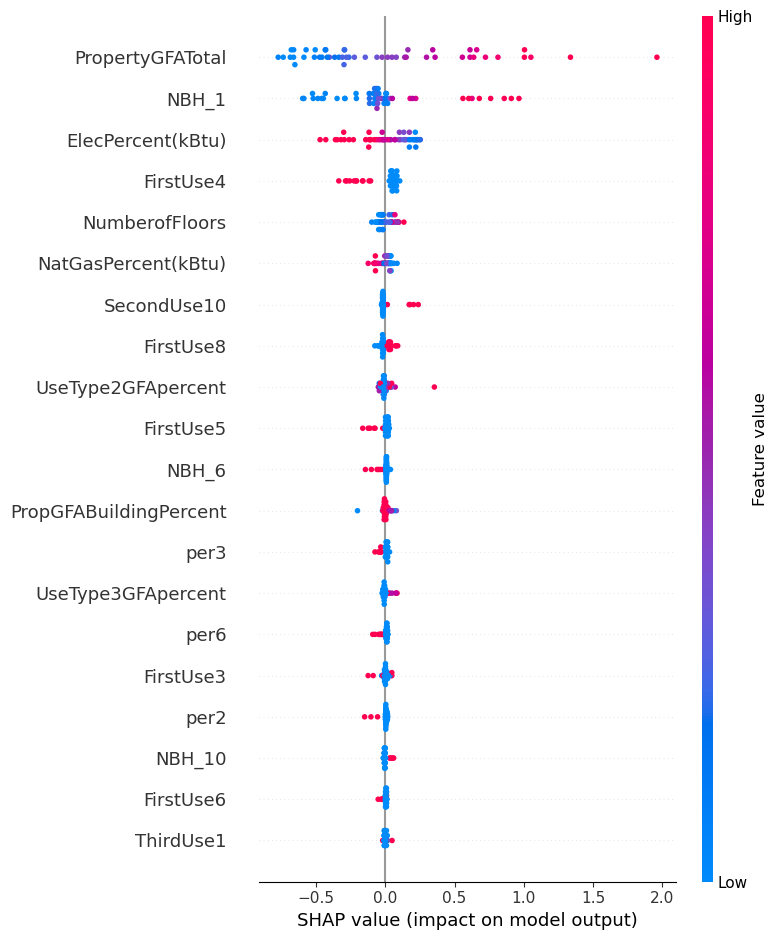

In [11]:
feature_names = np.delete(DF.columns, 5)
shap.summary_plot(explainer.shap_values(data_sample), data_sample, feature_names=list(feature_names))

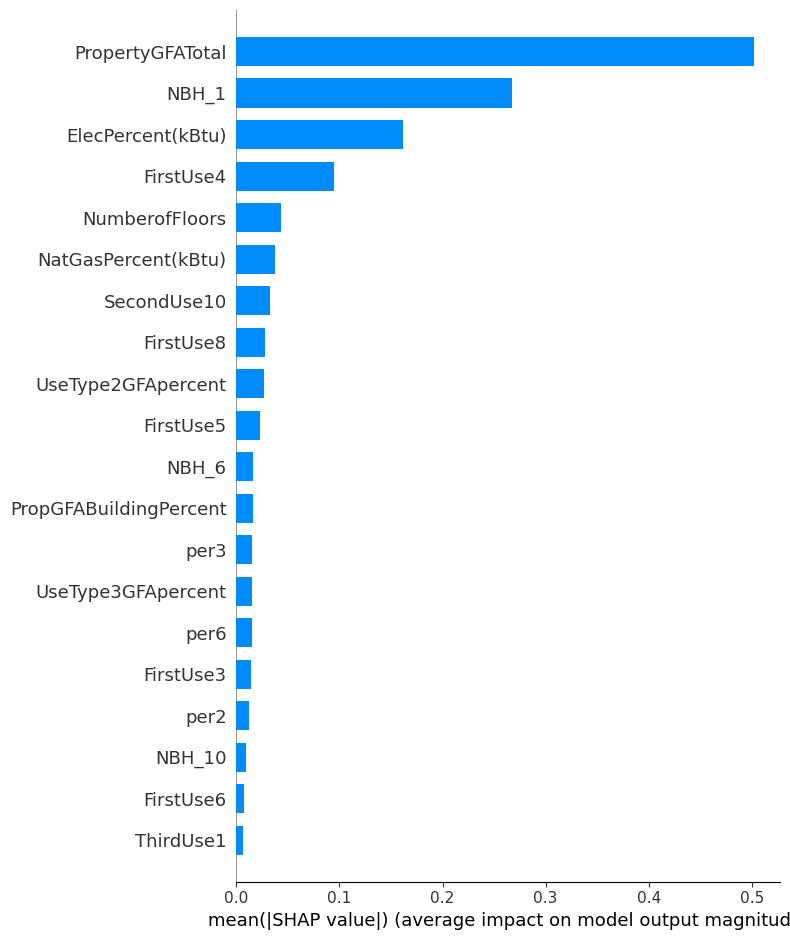

In [12]:
# mêmes données sous forme de barres dont les dimensions relatives indiquent les importances relatives dans les prédictions:
shap.summary_plot(explainer.shap_values(data_sample), data_sample, feature_names=list(feature_names), plot_type="bar")

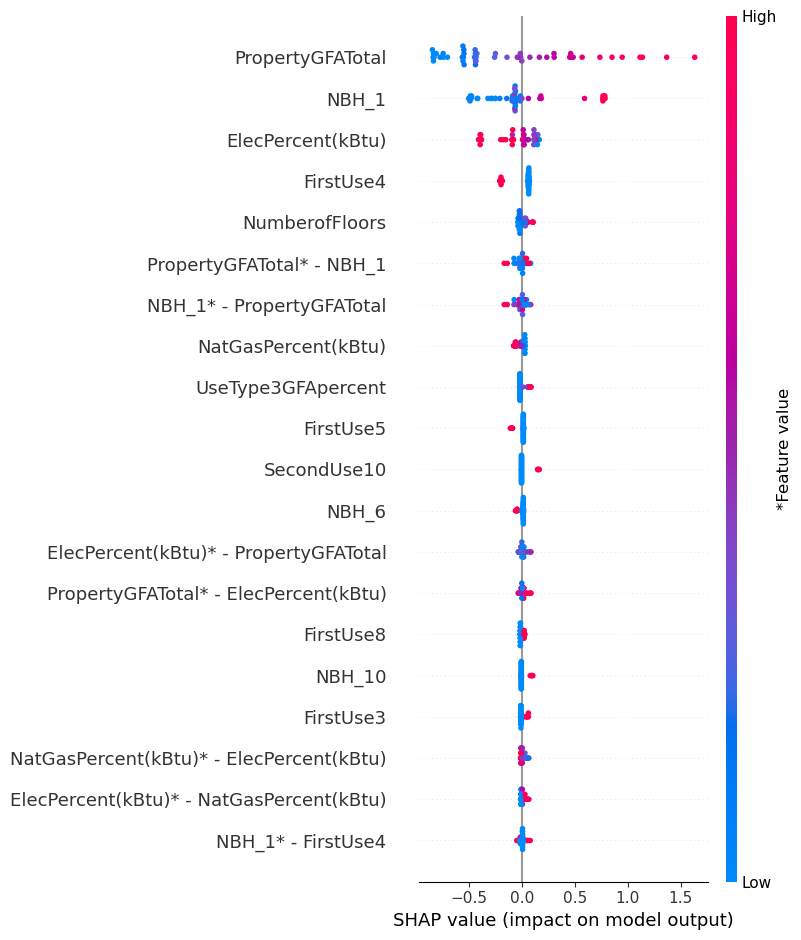

In [17]:
explainer1 = shap.TreeExplainer(GBR)
shap_interaction_values = explainer1.shap_interaction_values(data_sample)
shap.summary_plot(shap_interaction_values, data_sample, plot_type="compact_dot", feature_names=list(feature_names))

In [34]:
shap.force_plot(np.around(explainer1.expected_value, decimals=4),
                np.around(explainer1.shap_values(data_sample[0]), decimals=4),
                data_sample[0],
                feature_names = list(feature_names))

In [36]:
shap.force_plot(np.around(explainer1.expected_value, decimals=4),
                np.around(explainer1.shap_values(data_sample[1]), decimals=4),
                data_sample[1],
                feature_names = list(feature_names))

In [37]:
shap.force_plot(np.around(explainer1.expected_value, decimals=4),
                np.around(explainer1.shap_values(data_sample[2]), decimals=4),
                data_sample[2],
                feature_names = list(feature_names))

In [38]:
shap.force_plot(explainer1.expected_value, explainer1.shap_values(data_sample), data_sample, feature_names=list(feature_names))

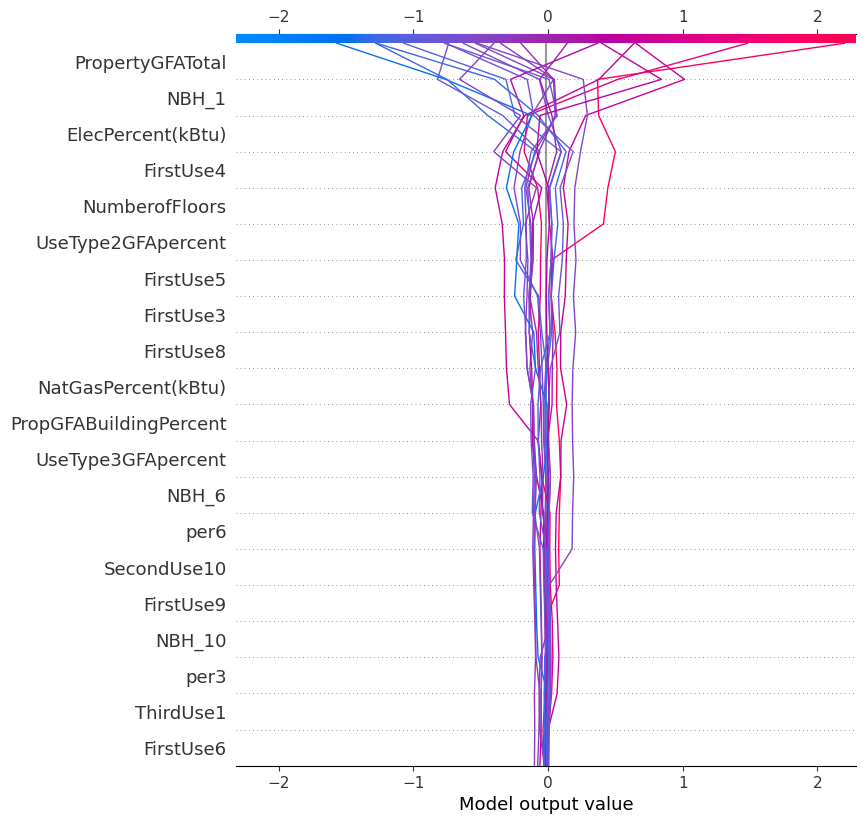

In [40]:
shap.decision_plot(explainer1.expected_value, explainer1.shap_values(data_sample[:20]), data_sample[:20],
                        feature_names=list(feature_names))

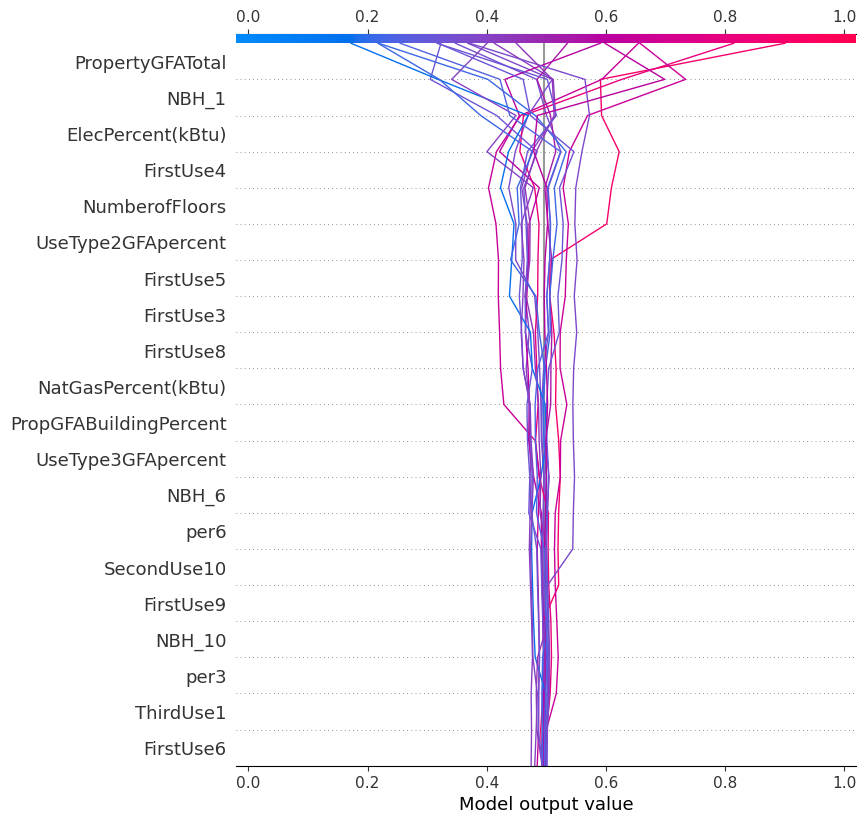

In [41]:
shap.decision_plot(explainer1.expected_value, explainer1.shap_values(data_sample[:20]), data_sample[:20],
                        feature_names=list(feature_names), link='logit')

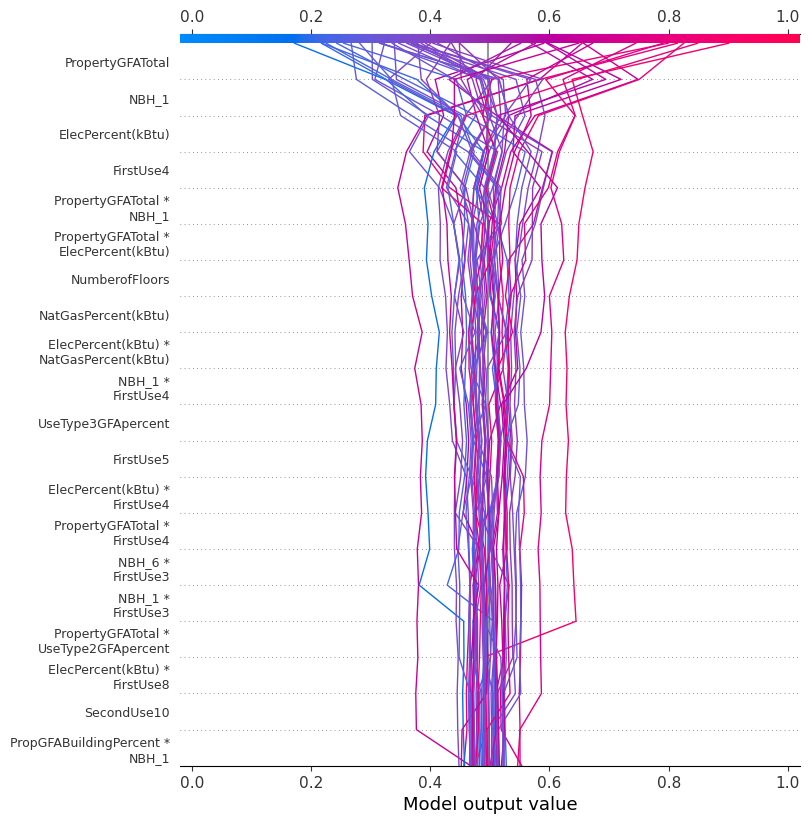

In [42]:
shap.decision_plot(explainer1.expected_value, shap_interaction_values, data_sample, link='logit',
                   feature_names=list(feature_names))

In [60]:
shap.waterfall_plot(explainer1.expected_value, explainer1.shap_values(data_sample[3]), data_sample[3],
                   feature_names=list(feature_names), show=True)
#shap.waterfall_plot(explainer1.shap_values(data_sample[3]), )

TypeError: waterfall() got an unexpected keyword argument 'feature_names'

**Les trois caractéristiques les plus représentatives dans la prédiction, sur notre échantillon, sont donc : 1/ la surface totale de la propriété, 2/ l'appartenance ou non à l'arrondissement NBH_1 ('CENTRAL'), 3/ la part d'électricité dans la consommation**

In [55]:
explainer1.shap_values(data_sample[3])[5]

-0.0006847814475099454

**Avant de passer à la modélisation des émissions de GHG, récapitulons les résultats obtenus pour les prédictions de la consommation énergétique et qui nous à conduit à retenir le GradientBoostingRegressor avec l'Energy Star score** (finalement nous resterons sur la prédiction non 'Weather Normalized', faute de temps) sur le critère **du meilleur score R² sur le jeu d'entrainement lors des validations croisées** (sauf pour la régression linéaire, pour laquelle une telle validation n'est pas utile, donc la valeur prise en compte est le score sur le jeu d'entrainement; Mais la prédiction sur le jeu de test n'était pas du tout aussi bonne que pour le Gradient Boosting notamment) :

In [3]:
result_sans_energySTAR = {
    'Modèle' : ['LinearRegression','ElasticNet','KernelRidge','SVR','RandomForestRegressor','GradientBoostingRegressor','KNN'],
    'Entrainement' : [0.686, 0.65, 0.64, 0.65, 0.66, 0.66, 0.52],
    'Test' : [np.nan, 0.6307, 0.6719, 0.6560, 0.6625, 0.6627, np.nan]
}
result_avec_energySTAR = {'Entrainement' : [0.75, 0.72, 0.73, 0.72, 0.73, 0.75, 0.62],
                          'Test' : [0.6603, 0.6626, 0.7433, 0.7681, 0.7332, 0.7768, np.nan]}

In [4]:
DF1 = pd.DataFrame(result_sans_energySTAR)
DF2 = pd.DataFrame(result_avec_energySTAR)
DF2.style.set_properties(**{'background-color': '#a2ffb3'}) # fonctionne mais non conservé par le concat ...
Result = pd.concat([DF1,DF2], axis=1)
#Result.columns = pd.MultiIndex.from_product([['Sans EnergyStar score','Avec EnergyStar score'],['Entrainement','Test']], \
 #                                           names = ['Modélisation :','Jeu :'])
Result.style.format(precision=4)

In [5]:
Result2 = Result.style.set_caption("Col. 2-3 : sans EnergyStar score, Col. 4-5 : avec EnergyStar score")\
                      .set_table_styles([{'selector': 'caption', 'props': 'caption-side: top; font-size:1.3em;' }],\
                                        overwrite=False)
Result2

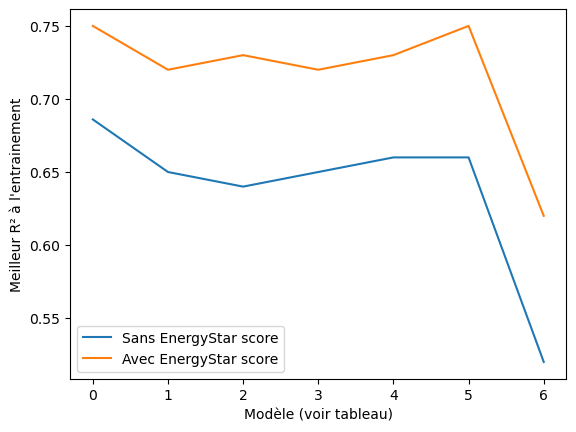

In [9]:
# graphiquement :
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(7),[0.686, 0.65, 0.64, 0.65, 0.66, 0.66, 0.52],'-',label='Sans EnergyStar score')
plt.plot(range(7),[0.75, 0.72, 0.73, 0.72, 0.73, 0.75, 0.62],'-',label='Avec EnergyStar score')
plt.xlabel('Modèle (voir tableau)')
plt.ylabel('Meilleur R² à l\'entrainement')
plt.legend()